In [1]:
%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook

In [2]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from datetime import timedelta
from datetime import datetime
from pprint import pprint

from opendrift.readers import reader_netCDF_CF_generic
from opendrift.readers import reader_global_landmask
from opendrift.readers import reader_shape

In [4]:
domain = [-49, -29, -48, -26]

In [5]:
data = reader_netCDF_CF_generic.Reader([
    '/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc',
#     '/data/global-reanalysis-phy-001-030-daily/02_3km_regrid_joined/grid_1999.nc',
#     '/data/global-reanalysis-phy-001-030-daily/02_3km_regrid_joined/grid_2000.nc',
#     '/data/global-reanalysis-phy-001-030-daily/02_3km_regrid_joined/grid_2001.nc',
#     '/data/global-reanalysis-phy-001-030-daily/02_3km_regrid_joined/grid_2002.nc'
])
reader_costao = reader_shape.Reader.from_shpfiles('/data/shapefiles/costoes/pol_diferenca_costao_terra_p14.shp')
reader_landmask = reader_global_landmask.Reader(extent=domain)  # lonmin, latmin, lonmax, latmax

In [6]:
from tubastrea import Tubastrea

In [9]:
#o = Tubastrea(loglevel=20)
o = Tubastrea(loglevel=0)
o.disable_vertical_motion()
o.priority_list['land_binary_mask'] = ['global_landmask']
o.add_reader([data, reader_costao, reader_landmask])
o.reef_shapes = ['shape']
o.factor = 0.5

14:32:03 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
14:32:03 DEBUG   opendrift.models.basemodel: Adding 2 config items from basemodel
14:32:03 DEBUG   opendrift.models.basemodel: Adding 8 config items from basemodel
14:32:03 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.6.0)
14:32:03 WARNING opendrift.models.basemodel: ##################################################################################
14:32:03 WARNING opendrift.models.basemodel: Dependencies are outdated, please update with: conda env update -f environment.yml
14:32:03 WARNING opendrift.models.basemodel: ##################################################################################
14:32:03 DEBUG   opendrift.models.basemodel: Adding 13 config items from oceandrift
14:32:03 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
14:32:03 INFO    opendrift.models.oceandrift: Setting config: drift:vertical_advection -> False
14:32:03 INFO    o

In [8]:
start = datetime(1998, 3, 1, 0, 0, 0)
end = datetime(1998, 3, 31, 0, 0, 0)

# 2014;Rancho Norte (RN);-27.277.734;-48.374.985
# GPS corrected -48.381440; -27.277070
seed_rn = [-48.381440, -27.277070]
# 2012;Engenho (EG);-27.291.957;-48.367.384
seed_eg = [-48.367384, -27.291957]
# 2014;Vidal (SV);-27.297.548;-48.360.013
seed_sv = [-48.360013, -27.297548]
# 2013;Farol (SF);-27.296.645;-48.363.786
seed_sf = [-48.363786, -27.296645]
# 2015;Galé (GI);-2.717.785;-4.840.758
seed_gi = [-48.40758, -27.17785]

# Plataforma
# seed_plataforma = [-46.767264, -26.767222]
seed_plataforma = [-46.77, -26.767222]

# o.seed_elements(lon=seed_rn[0], lat=seed_rn[1], number=1000, radius=10, time=[start, start+timedelta(hours=12)])
# o.seed_elements(lon=seed_eg[0], lat=seed_eg[1], number=100, radius=10, time=[start, start+timedelta(hours=4)])
# o.seed_elements(lon=seed_sv[0], lat=seed_sv[1], number=100, radius=10, time=[start, start+timedelta(hours=4)])
# o.seed_elements(lon=seed_sf[0], lat=seed_sf[1], number=100, radius=10, time=[start, start+timedelta(hours=4)])
# o.seed_elements(lon=seed_gi[0], lat=seed_gi[1], number=100, radius=10, time=[start, start+timedelta(hours=4)])
# o.seed_elements(lon=seed_plataforma[0], lat=seed_plataforma[1], number=770, radius=1, time=[start, end])
o.seed_elements(lon=seed_rn[0], lat=seed_rn[1], number=180, radius=5, time=[start, end])
o.seed_elements(lon=seed_eg[0], lat=seed_eg[1], number=180, radius=5, time=[start, end])
o.seed_elements(lon=seed_sv[0], lat=seed_sv[1], number=180, radius=5, time=[start, end])
o.seed_elements(lon=seed_sf[0], lat=seed_sf[1], number=180, radius=5, time=[start, end])
o.seed_elements(lon=seed_gi[0], lat=seed_gi[1], number=180, radius=5, time=[start, end])

o.set_config('general:coastline_action', 'none')
o.set_config('general:use_auto_landmask', True)
# o.run(duration=timedelta(hours=288), time_step_output=3600, outfile= '/data/coral_sol_output.nc')
# o.run(duration=timedelta(hours=72), time_step=3600, time_step_output=3600)
o.run(end_time=end, time_step=timedelta(hours=1))

14:28:44 DEBUG   opendrift.models.basemodel: 
------------------------------------------------------
Software and hardware:
  OpenDrift version 1.6.0
  Platform: Linux, 5.4.72-microsoft-standard-WSL2
  12.405986785888672 GB memory
  4 processors ()
  NumPy version 1.17.5
  SciPy version 1.6.2
  Matplotlib version 3.4.2
  NetCDF4 version 1.5.6
  Xarray version 0.18.0
  OilLibrary version 1.1.3
  Python version 3.7.10 (default, Feb 26 2021, 18:47:35) [GCC 7.3.0]
------------------------------------------------------

14:28:44 DEBUG   opendrift.models.basemodel: No output file is specified, neglecting export_buffer_length
14:28:44 DEBUG   opendrift.models.basemodel: Preparing readers for simulation coverage ([-74.67851456234155, -50.64899119815311, -22.08909789493384, -3.8263868383459148]) and time (1998-03-01 00:00:00 to 1998-03-31 00:00:00)
14:28:44 DEBUG   opendrift.models.basemodel: 	Preparing ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:44 DEB

14:28:45 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00) in space  (linearNDFast)
14:28:45 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:45 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-01 12:00:00) in space  (linearNDFast)
14:28:45 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:45 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00, weight 0.50) and
		      after (1998-03-01 12:00:00, weight 0.50) in time
14:28:45 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:45 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:45 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:28:45 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:28:45 DEBUG   opendrift.mo

14:28:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:45 DEBUG   opendrift.models.basemodel: Data needed for 5 elements
14:28:45 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:45 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-02-28 12:00:00 (before)
		1998-03-01 12:00:00 (after)
14:28:45 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00) in space  (linearNDFast)
14:28:45 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:45 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-01 12:00:00) in space  (linearNDFast)
14:28:45 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:45 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00, weight 0.46) and
		  

14:28:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:46 DEBUG   opendrift.models.basemodel: Data needed for 1 elements
14:28:46 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:46 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-02-28 12:00:00 (before)
		1998-03-01 12:00:00 (after)
14:28:46 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00) in space  (linearNDFast)
14:28:46 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:46 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-01 12:00:00) in space  (linearNDFast)
14:28:46 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:46 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00, weight 0.42) and
		  

14:28:46 DEBUG   opendrift.models.basemodel: Data needed for 1 elements
14:28:46 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:46 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-02-28 12:00:00 (before)
		1998-03-01 12:00:00 (after)
14:28:46 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00) in space  (linearNDFast)
14:28:46 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:46 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-01 12:00:00) in space  (linearNDFast)
14:28:46 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:46 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00, weight 0.38) and
		      after (1998-03-01 12:00:00, weight 0.62) in time
14:28:46 DEBUG   opendrift.reader

14:28:47 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:47 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-02-28 12:00:00 (before)
		1998-03-01 12:00:00 (after)
14:28:47 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00) in space  (linearNDFast)
14:28:47 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:47 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-01 12:00:00) in space  (linearNDFast)
14:28:47 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:47 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00, weight 0.33) and
		      after (1998-03-01 12:00:00, weight 0.67) in time
14:28:47 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vector

14:28:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:47 DEBUG   opendrift.models.basemodel: Data needed for 6 elements
14:28:47 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:47 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-02-28 12:00:00 (before)
		1998-03-01 12:00:00 (after)
14:28:47 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00) in space  (linearNDFast)
14:28:47 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:47 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-01 12:00:00) in space  (linearNDFast)
14:28:47 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:47 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00, weight 0.29) and
		  

14:28:47 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:47 DEBUG   opendrift.models.basemodel: Data needed for 2 elements
14:28:47 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:47 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-02-28 12:00:00 (before)
		1998-03-01 12:00:00 (after)
14:28:47 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00) in space  (linearNDFast)
14:28:47 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:47 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-01 12:00:00) in space  (linearNDFast)
14:28:47 DEBUG   opendrift.readers.interpolation.structured: Initialis

14:28:48 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:48 DEBUG   opendrift.models.basemodel: Data needed for 2 elements
14:28:48 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:48 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-02-28 12:00:00 (before)
		1998-03-01 12:00:00 (after)
14:28:48 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00) in space  (linearNDFast)
14:28:48 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:48 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-01 12:00:00) in space  (linearNDFast)
14:28:48 DEBUG   opendrift.readers.interpolation.structured: Initialis

14:28:48 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:48 DEBUG   opendrift.models.basemodel: Data needed for 7 elements
14:28:48 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:48 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-02-28 12:00:00 (before)
		1998-03-01 12:00:00 (after)
14:28:48 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-02-28 12:00:00) in space  (linearNDFast)
14:28:48 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:28:48 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-01 12:00:00) in space  (linearNDFast)
14:28:48 DEBUG   opendrift.readers.interpolation.structured: Initialis

14:28:48 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:48 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:28:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:48 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:48 DEBUG   opendrift.models.basemodel: Data needed for 7 elements
14:28:48 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:48 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-02-28 12:00:00 (before)
		1998-03-01 12:00:00 (after)
14:28:48 DEBUG   opendrift

14:28:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:49 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:28:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:49 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:49 DEBUG   opendrift.models.basemodel: Data needed for 3 elements
14:28:49 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:49 DEBUG   opendrift.readers.b

14:28:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:49 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:28:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:49 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:49 DEBUG   opendrift.models.basemodel: Data needed for 3 elements
14:28:49 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:49 DEBUG   opendrift.readers.b

14:28:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:49 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:28:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:49 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:49 DEBUG   opendrift.models.basemodel: Data needed for 8 elements
14:28:49 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:49 DEBUG   opendrift.readers.b

14:28:49 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:28:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:50 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:28:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:50 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:28:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:50 DEBUG   opendrift.models.basemodel: Data needed for 8 elements
14:28:50 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global

14:28:50 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:50 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:50 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:28:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:50 DEBUG   opendrift.models.basemodel: Data needed for 4 elements
14:28:50 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:28:50 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:28:50 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:28:50 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.

14:28:50 DEBUG   opendrift.models.basemodel: 880 elements scheduled.
14:28:50 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:50 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:50 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:28:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:50 DEBUG   opendrift.models.basemodel: Data needed for 4 elements
14:28:50 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:28:50 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:28:50 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:28:50 DEBUG   opendrift.readers.basereader.variab

14:28:51 DEBUG   opendrift.models.basemodel: 875 elements scheduled.
14:28:51 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:51 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:51 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:28:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:51 DEBUG   opendrift.models.basemodel: Data needed for 9 elements
14:28:51 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:28:51 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:28:51 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:28:51 DEBUG   opendrift.readers.basereader.variab

14:28:51 DEBUG   opendrift.models.basemodel: to be seeded: 875, already seeded 25
14:28:51 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:28:51 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:51 INFO    opendrift.models.basemodel: 1998-03-01 17:00:00 - step 18 of 720 - 9 active elements (16 deactivated)
14:28:51 DEBUG   opendrift.models.basemodel: 875 elements scheduled.
14:28:51 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:51 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:51 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:28:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:51 DEBU

14:28:51 DEBUG   opendrift.models.basemodel: 5 active elements (20 deactivated)
14:28:51 DEBUG   opendrift.models.basemodel: to be seeded: 875, already seeded 25
14:28:51 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:28:51 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:51 INFO    opendrift.models.basemodel: 1998-03-01 18:00:00 - step 19 of 720 - 5 active elements (20 deactivated)
14:28:51 DEBUG   opendrift.models.basemodel: 875 elements scheduled.
14:28:51 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:51 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:51 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:28:51 DEBUG   op

14:28:52 DEBUG   opendrift.models.basemodel: 5 active elements (20 deactivated)
14:28:52 DEBUG   opendrift.models.basemodel: to be seeded: 875, already seeded 25
14:28:52 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:28:52 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:52 INFO    opendrift.models.basemodel: 1998-03-01 19:00:00 - step 20 of 720 - 5 active elements (20 deactivated)
14:28:52 DEBUG   opendrift.models.basemodel: 875 elements scheduled.
14:28:52 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:52 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:52 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:28:52 DEBUG   op

14:28:52 DEBUG   opendrift.models.basemodel: 5 active elements (20 deactivated)
14:28:52 DEBUG   opendrift.models.basemodel: to be seeded: 875, already seeded 25
14:28:52 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:28:52 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:52 INFO    opendrift.models.basemodel: 1998-03-01 20:00:00 - step 21 of 720 - 10 active elements (20 deactivated)
14:28:52 DEBUG   opendrift.models.basemodel: 870 elements scheduled.
14:28:52 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:52 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:52 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:28:52 DEBUG   o

14:28:52 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:52 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:52 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:28:52 DEBUG   opendrift.models.basemodel: 10 active elements (20 deactivated)
14:28:52 DEBUG   opendrift.models.basemodel: to be seeded: 870, already seeded 30
14:28:52 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:28:52 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:52 INFO    opendrift.models.basemodel: 1998-03-01 21:00:00 - step 22 of 720 - 10 active elements (20 deactivated)
14:28:52 DEBUG   opendrift.models.basemodel: 870 elements scheduled.
14:28:52 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:52 DEBUG   opendrift.models.ba

14:28:53 DEBUG   opendrift.models.basemodel: 		-48.3550185332656 <- longitude -> -48.3188067745022
14:28:53 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:53 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:28:53 DEBUG   opendrift.models.basemodel: 6 active elements (24 deactivated)
14:28:53 DEBUG   opendrift.models.basemodel: to be seeded: 870, already seeded 30
14:28:53 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:28:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:53 INFO    opendrift.models.basemodel: 1998-03-01 22:00:00 - step 23 of 720 - 6 active elements (24 deactivated)
14:28:53 DEBUG   opendrift.models.basemodel: 870 elements scheduled.
14:28:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:53 DEBUG   opendrif

14:28:53 DEBUG   opendrift.models.basemodel: 		-48.35384994838948 <- longitude -> -48.31752347966142
14:28:53 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:53 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:28:53 DEBUG   opendrift.models.basemodel: 6 active elements (24 deactivated)
14:28:53 DEBUG   opendrift.models.basemodel: to be seeded: 870, already seeded 30
14:28:53 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:28:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:53 INFO    opendrift.models.basemodel: 1998-03-01 23:00:00 - step 24 of 720 - 6 active elements (24 deactivated)
14:28:53 DEBUG   opendrift.models.basemodel: 870 elements scheduled.
14:28:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:53 DEBUG   opendr

14:28:53 DEBUG   opendrift.models.basemodel: 		-48.352787696817245 <- longitude -> -48.316360595834354
14:28:53 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:53 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:28:53 DEBUG   opendrift.models.basemodel: 6 active elements (24 deactivated)
14:28:53 DEBUG   opendrift.models.basemodel: to be seeded: 870, already seeded 30
14:28:53 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:28:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:53 INFO    opendrift.models.basemodel: 1998-03-02 00:00:00 - step 25 of 720 - 11 active elements (24 deactivated)
14:28:53 DEBUG   opendrift.models.basemodel: 865 elements scheduled.
14:28:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:53 DEBUG   ope

14:28:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:54 DEBUG   opendrift.models.basemodel: 		11 active elements
14:28:54 DEBUG   opendrift.models.basemodel: 		-27.371318430252725 <- latitude  -> -27.18056233020199
14:28:54 DEBUG   opendrift.models.basemodel: 		-48.40586014365282 <- longitude -> -48.31531893957449
14:28:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:54 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:28:54 DEBUG   opendrift.models.basemodel: 11 active elements (24 deactivated)
14:28:54 DEBUG   opendrift.models.basemodel: to be seeded: 865, already seeded 35
14:28:54 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:28:54 DEBUG   opendrift.models.basemodel: ======================================================================
14:28:54 INFO    opendrift.models.basemodel: 1998-03-02 01:00:00 - step 26 of 7

14:28:54 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:28:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:54 DEBUG   opendrift.models.basemodel: 		7 active elements
14:28:54 DEBUG   opendrift.models.basemodel: 		-27.373780573019907 <- latitude  -> -27.29341511388503
14:28:54 DEBUG   opendrift.models.basemodel: 		-48.35590185191045 <- longitude -> -48.314399297057015
14:28:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:54 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:28:54 DEBUG   opendrift.models.basemodel: 7 active elements (28 deactivated)
14:28:54 DEBUG   opendrift.models.basemodel: to be seeded: 865, already seeded 35
14:28:54 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:28:54 DEBUG   opendrift.models.basemodel: ====================================================================

14:28:54 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:28:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:54 DEBUG   opendrift.models.basemodel: 		7 active elements
14:28:54 DEBUG   opendrift.models.basemodel: 		-27.37616922341067 <- latitude  -> -27.29617738034277
14:28:54 DEBUG   opendrift.models.basemodel: 		-48.35517747665721 <- longitude -> -48.31360251055727
14:28:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:54 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:28:54 DEBUG   opendrift.models.basemodel: 7 active elements (28 deactivated)
14:28:54 DEBUG   opendrift.models.basemodel: to be seeded: 865, already seeded 35
14:28:54 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:28:54 DEBUG   opendrift.models.basemodel: ======================================================================

14:28:54 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:28:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:54 DEBUG   opendrift.models.basemodel: 		7 active elements
14:28:55 DEBUG   opendrift.models.basemodel: 		-27.37848849555596 <- latitude  -> -27.298848376920418
14:28:55 DEBUG   opendrift.models.basemodel: 		-48.35456560389403 <- longitude -> -48.31292765380936
14:28:55 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:55 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:55 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:28:55 DEBUG   opendrift.models.basemodel: 7 active elements (28 deactivated)
14:28:55 DEBUG   opendrift.models.basemodel: to be seeded: 865, already seeded 35
14:28:55 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:28:55 DEBUG   opendrift.models.basemodel: =====================================================================

14:28:55 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:28:55 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:28:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:28:55 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:28:55 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:55 DEBUG   opendrift.models.basemodel: 		12 active elements
14:28:55 DEBUG   opendrift.models.basemodel: 		-27.380740092405308 <- latitude  -> -27.18014655735189
14:28:55 DEBUG   opendrift.models.basemodel: 		-48.406010003798315 <- longitude -> -48.31237309885777
14:28:55 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:55 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:55 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (died)
14:28:55 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:28:55 DEBUG   opend

14:28:55 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:28:55 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:55 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:55 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:28:55 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:28:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:28:55 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:28:55 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:55 DEBUG   opendrift.models.basemodel: 		8 active elements
14:28:55 DEBUG   opendrift.models.basemodel: 		-27.382924430992674 <- latitude  -> -27.292756464193143
14:28:55 DEBUG   opendrift.models.basemodel: 		-48.35678526153242 <- longitude -> -48.311939162268
14:28:55 DEBUG   ope

14:28:55 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:28:55 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:28:55 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:55 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:55 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:28:55 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:28:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:28:55 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:28:55 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:55 DEBUG   opendrift.models.basemodel: 		8 active elements
14:28:55 DEBUG   opendrift.models.basemodel: 		-27.385041671993918 <- latitude  -> -27.29519476587584
14:28:55 DEBUG   opendrift.models.basemodel

14:28:56 DEBUG   opendrift.models.basemodel: Data needed for 8 elements
14:28:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:28:56 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:28:56 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:28:56 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:56 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:56 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:28:56 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:28:56 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:28:56 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:28:56 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:56 DEBUG   opendrift.models.basemod

14:28:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:56 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:28:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:56 DEBUG   opendrift.models.basemodel: Data needed for 12 elements
14:28:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:28:56 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:28:56 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:28:56 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:56 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:56 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:28:56 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:28:56 DEBUG   opendrift.models.

14:28:56 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:56 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:56 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:28:56 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:28:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:56 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:56 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:28:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:56 DEBUG   opendrift.models.basemodel: Data needed for 8 elements
14:28:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:28:56 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:28:56 DEBUG   opendrift.readers.baser

14:28:57 DEBUG   opendrift.models.basemodel: 		7 active elements
14:28:57 DEBUG   opendrift.models.basemodel: 		-27.39283354828652 <- latitude  -> -27.31492031104216
14:28:57 DEBUG   opendrift.models.basemodel: 		-48.35341635758202 <- longitude -> -48.31159196693928
14:28:57 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:57 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:57 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:57 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:28:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:57 DEBUG   opendrift.models.basemodel: Data needed for 7 elements
14:28:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:28:57 DEBUG 

14:28:57 DEBUG   opendrift.models.basemodel: 		7 active elements
14:28:57 DEBUG   opendrift.models.basemodel: 		-27.39460831976885 <- latitude  -> -27.316847104583765
14:28:57 DEBUG   opendrift.models.basemodel: 		-48.35371546879704 <- longitude -> -48.31189001888781
14:28:57 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:57 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:57 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:57 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:28:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:57 DEBUG   opendrift.models.basemodel: Data needed for 7 elements
14:28:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:28:57 DEBUG

14:28:57 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:57 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:57 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (settled)
14:28:57 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:28:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:57 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:57 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:28:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:57 DEBUG   opendrift.models.basemodel: Data needed for 12 elements
14:28:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:28:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:28:57 DEBUG   opendrift.readers.base

14:28:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:28:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:28:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:28:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:58 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:28:58 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:28:58 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:28:58 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:28:58 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:58 DEBUG   opendrift.models.basemodel: 		8 active elements
14:28:58 DEBUG   opendrift.models.basemodel: 		-27.3980750

14:28:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:58 DEBUG   opendrift.models.basemodel: Calling reader shape
14:28:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:58 DEBUG   opendrift.models.basemodel: Data needed for 7 elements
14:28:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:28:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:28:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:28:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:58 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:28:58 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:28:58 DEBUG   opendrift.models.basemodel: ----------

14:28:58 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:58 DEBUG   opendrift.models.basemodel: Calling reader shape
14:28:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:58 DEBUG   opendrift.models.basemodel: Data needed for 7 elements
14:28:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:28:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:28:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:28:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:58 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:28:58 DEBUG   opendrift.models.basemodel: Finished proce

14:28:59 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:59 DEBUG   opendrift.models.basemodel: Calling reader shape
14:28:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:59 DEBUG   opendrift.models.basemodel: Data needed for 12 elements
14:28:59 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:28:59 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:28:59 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:28:59 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:28:59 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:28:59 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:28:59 DEBUG   opendrift.models.basemodel: Finished proc

14:28:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:59 DEBUG   opendrift.models.basemodel: Removed 4 elements.
14:28:59 DEBUG   opendrift.models.basemodel: Removed 4 values from environment.
14:28:59 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:28:59 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:28:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:59 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:59 DEBUG   opendrift.models.basemodel: Calling reader shape
14:28:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:59 DEBUG   opendrift.models.basemodel: Data needed for 8 elements
14:28:59 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:28:59 DEBUG   opendrift.readers.basereader.continuous: Fetched

14:28:59 DEBUG   opendrift.models.basemodel: 		8 active elements
14:28:59 DEBUG   opendrift.models.basemodel: 		-27.405750041933008 <- latitude  -> -27.281352415539793
14:28:59 DEBUG   opendrift.models.basemodel: 		-48.38140598258492 <- longitude -> -48.31359884149325
14:28:59 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:28:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:28:59 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:28:59 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:28:59 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:28:59 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:28:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:59 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:28:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:28:59 DEBUG   opendrift.models.basemodel: Calling

14:29:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:00 DEBUG   opendrift.models.basemodel: 		7 active elements
14:29:00 DEBUG   opendrift.models.basemodel: 		-27.407826254559556 <- latitude  -> -27.3309059182
14:29:00 DEBUG   opendrift.models.basemodel: 		-48.355238678647815 <- longitude -> -48.31369306897669
14:29:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:00 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:00 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:00 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:00 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:00 DEBUG   opendrift.models.basemodel: Callin

14:29:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:00 DEBUG   opendrift.models.basemodel: 		12 active elements
14:29:00 DEBUG   opendrift.models.basemodel: 		-27.409966405837185 <- latitude  -> -27.177860260009766
14:29:00 DEBUG   opendrift.models.basemodel: 		-48.40754318237305 <- longitude -> -48.31373346118601
14:29:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:00 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:00 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:00 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:00 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:00 DEBUG   opendrift.models.basemodel: ----

14:29:00 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.15342 (min) -0.136493 (max)
14:29:00 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.2916 (min) 26.3383 (max)
14:29:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:00 DEBUG   opendrift.models.basemodel: 		12 active elements
14:29:00 DEBUG   opendrift.models.basemodel: 		-27.412170934050447 <- latitude  -> -27.180007369024217
14:29:00 DEBUG   opendrift.models.basemodel: 		-48.40627900545664 <- longitude -> -48.313720356362865
14:29:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:00 DEBUG   opendrift.models.basemodel: Removed 3 elements.
14:29:00 DEBUG   opendrift.models.basemodel: Removed 3 values from environment.
14:29:00 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:00 DEBUG

14:29:00 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:00 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:00 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0065317 (min) 0.0218509 (max)
14:29:00 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.157405 (min) -0.140286 (max)
14:29:00 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.3023 (min) 26.3483 (max)
14:29:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:00 DEBUG   opendrift.models.basemodel: 		9 active elements
14:29:00 DEBUG   opendrift.models.basemodel: 		-27.414440256505912 <- latitude  -> -27.28185023264021
14:29:00 DEBUG   opendrift.models.basemodel: 		-48.38074048948666 <- longitude -> -48.313654141490964
14:29:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:00 DEBUG   opendrift.models.basemodel

14:29:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:01 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:01 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.00939961 (min) 0.0234142 (max)
14:29:01 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.161298 (min) -0.144207 (max)
14:29:01 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.3133 (min) 26.3579 (max)
14:29:01 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:01 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:01 DEBUG   opendrift.models.basemodel: 		8 active elements
14:29:01 DEBUG   opendrift.models.basemodel: 		-27.416774767824684 <- latitude  -> -27.29511606812722
14:29:01 DEBUG   opendrift.models.basemodel: 		-48.35680495559288 <- longitude -> -48.313535246394956
14:29:01 DEB

14:29:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:01 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:01 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0122392 (min) 0.0813657 (max)
14:29:01 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.165119 (min) -0.148303 (max)
14:29:01 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.3244 (min) 26.3927 (max)
14:29:01 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:01 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:01 DEBUG   opendrift.models.basemodel: 		13 active elements
14:29:01 DEBUG   

14:29:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:02 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-03 12:00:00) in space  (linearNDFast)
14:29:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00, weight 0.46) and
		      after (1998-03-03 12:00:00, weight 0.54) in time
14:29:02 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:02 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:02 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:02 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:02 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:02 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.01

14:29:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00) in space  (linearNDFast)
14:29:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:02 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-03 12:00:00) in space  (linearNDFast)
14:29:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00, weight 0.42) and
		      after (1998-03-03 12:00:00, weight 0.58) in time
14:29:02 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:02 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:02 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:02 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:02 DEBUG   opendrift.mo

14:29:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00) in space  (linearNDFast)
14:29:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:02 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-03 12:00:00) in space  (linearNDFast)
14:29:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00, weight 0.38) and
		      after (1998-03-03 12:00:00, weight 0.62) in time
14:29:02 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:02 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:02 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:02 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:02 DEBUG   opendrift.mo

14:29:03 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-02 12:00:00 (before)
		1998-03-03 12:00:00 (after)
14:29:03 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00) in space  (linearNDFast)
14:29:03 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:03 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-03 12:00:00) in space  (linearNDFast)
14:29:03 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:03 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00, weight 0.33) and
		      after (1998-03-03 12:00:00, weight 0.67) in time
14:29:03 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:03 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:03 DEBUG   opendrift.models.basemodel: ----------------------

14:29:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:03 DEBUG   opendrift.models.basemodel: Data needed for 12 elements
14:29:03 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:03 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-02 12:00:00 (before)
		1998-03-03 12:00:00 (after)
14:29:03 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00) in space  (linearNDFast)
14:29:03 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:03 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-03 12:00:00) in space  (linearNDFast)
14:29:03 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:03 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00, weight 0.29) and
		 

14:29:03 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:03 DEBUG   opendrift.models.basemodel: Data needed for 8 elements
14:29:03 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:03 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-02 12:00:00 (before)
		1998-03-03 12:00:00 (after)
14:29:03 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00) in space  (linearNDFast)
14:29:03 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:03 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-03 12:00:00) in space  (linearNDFast)
14:29:03 DEBUG   opendrift.readers.interpolation.structured: Initialis

14:29:04 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:04 DEBUG   opendrift.models.basemodel: Data needed for 8 elements
14:29:04 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:04 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-02 12:00:00 (before)
		1998-03-03 12:00:00 (after)
14:29:04 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00) in space  (linearNDFast)
14:29:04 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:04 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-03 12:00:00) in space  (linearNDFast)
14:29:04 DEBUG   opendrift.readers.interpolation.structured: Initialis

14:29:04 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:04 DEBUG   opendrift.models.basemodel: Data needed for 13 elements
14:29:04 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:04 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-02 12:00:00 (before)
		1998-03-03 12:00:00 (after)
14:29:04 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00) in space  (linearNDFast)
14:29:04 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:04 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-03 12:00:00) in space  (linearNDFast)
14:29:04 DEBUG   opendrift.readers.interpolation.structured: Initiali

14:29:04 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:04 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:04 DEBUG   opendrift.models.basemodel: Data needed for 13 elements
14:29:04 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:04 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-02 12:00:00 (before)
		1998-03-03 12:00:00 (after)
14:29:04 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00) in space  (linearNDFast)
14:29:04 DEBUG   opendrift.readers.interpolation.structured: I

14:29:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:05 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:05 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:05 DEBUG   opendrift.models.basemodel: Data needed for 9 elements
14:29:05 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:05 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-02 12:00:00 (before)
		1998-03-03 12:00:00 (after)
14:29:05 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-02 12:00:00) in

14:29:05 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:05 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:05 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:05 DEBUG   opendrift.models.basemodel: Data needed for 9 elements
14:29:05 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:05 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-02 12:00:00 (before)
		1998-03-03 12:00:00 (after)
14:29:05 DEBUG   opendrift

14:29:05 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:05 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:05 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:05 DEBUG   opendrift.models.basemodel: Data needed for 14 elements
14:29:05 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:05 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-03 12:00:00 (before)
		1998-03-04 12:00:00 (after)
14:29:05 DEBUG   opendrif

14:29:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:05 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:05 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:05 DEBUG   opendrift.models.basemodel: Data needed for 14 elements
14:29:05 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:05 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-03 12:00:00 (before)
		1998-03-04 12:00:00 (after)
14:29:06 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using eastward_sea_water_velocity to retr

14:29:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:06 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:06 DEBUG   opendrift.models.basemodel: Data needed for 10 elements
14:29:06 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:06 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:06 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:06 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:06 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:06 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_w

14:29:06 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:06 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:06 DEBUG   opendrift.models.basemodel: Data needed for 10 elements
14:29:06 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:06 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:06 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:06 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:06 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:06 DEBUG   opendrift.models.bas

14:29:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:06 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:06 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:06 DEBUG   opendrift.models.basemodel: Data needed for 15 elements
14:29:06 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:06 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:06 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:06 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:06 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:07 DEBUG   opendrift.models.bas

14:29:07 INFO    opendrift.models.basemodel: 1998-03-03 17:00:00 - step 66 of 720 - 15 active elements (70 deactivated)
14:29:07 DEBUG   opendrift.models.basemodel: 815 elements scheduled.
14:29:07 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:07 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:07 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:07 DEBUG   opendrift.models.basemodel: Data needed for 15 elements
14:29:07 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:07 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:07 DEBUG   opendrift.reader

14:29:07 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:07 INFO    opendrift.models.basemodel: 1998-03-03 18:00:00 - step 67 of 720 - 11 active elements (74 deactivated)
14:29:07 DEBUG   opendrift.models.basemodel: 815 elements scheduled.
14:29:07 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:07 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:07 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:07 DEBUG   opendrift.models.basemodel: Data needed for 11 elements
14:29:07 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_lan

14:29:07 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:07 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:07 INFO    opendrift.models.basemodel: 1998-03-03 19:00:00 - step 68 of 720 - 11 active elements (74 deactivated)
14:29:07 DEBUG   opendrift.models.basemodel: 815 elements scheduled.
14:29:07 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:07 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:07 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:07 DEBUG   opendrift.models.basemodel: Data needed for 11 elements
14:29:07 DEBUG   open

14:29:08 DEBUG   opendrift.models.basemodel: to be seeded: 815, already seeded 85
14:29:08 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:29:08 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:08 INFO    opendrift.models.basemodel: 1998-03-03 20:00:00 - step 69 of 720 - 16 active elements (74 deactivated)
14:29:08 DEBUG   opendrift.models.basemodel: 810 elements scheduled.
14:29:08 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:08 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:08 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:08 DEB

14:29:08 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:08 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (died)
14:29:08 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:29:08 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:08 DEBUG   opendrift.models.basemodel: 16 active elements (74 deactivated)
14:29:08 DEBUG   opendrift.models.basemodel: to be seeded: 810, already seeded 90
14:29:08 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:08 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:08 INFO    opendrift.models.basemodel: 1998-03-03 21:00:00 - step 70 of 720 - 16 active elements (74 deactivated)
14:29:08 DEBUG   opendrift.models.basemodel: 810 elements scheduled.
14:29:08 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:08 DEBUG 

14:29:08 DEBUG   opendrift.models.basemodel: 		-27.48899987975363 <- latitude  -> -27.29552858707799
14:29:08 DEBUG   opendrift.models.basemodel: 		-48.35501115603995 <- longitude -> -48.29953652303699
14:29:08 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:08 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:08 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:08 DEBUG   opendrift.models.basemodel: 12 active elements (78 deactivated)
14:29:08 DEBUG   opendrift.models.basemodel: to be seeded: 810, already seeded 90
14:29:08 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:08 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:08 INFO    opendrift.models.basemodel: 1998-03-03 22:00:00 - step 71 of 720 - 12 active elements (78 deactivated)
14:29:08 DEBUG   opendrift.models.basemodel: 810 elements scheduled.
14:29:08 DEBUG   opendrift.models.ba

14:29:08 DEBUG   opendrift.models.basemodel: 		12 active elements
14:29:08 DEBUG   opendrift.models.basemodel: 		-27.4929641224496 <- latitude  -> -27.299560280321607
14:29:08 DEBUG   opendrift.models.basemodel: 		-48.353701675920576 <- longitude -> -48.29877470518295
14:29:08 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:08 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:08 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:08 DEBUG   opendrift.models.basemodel: 12 active elements (78 deactivated)
14:29:08 DEBUG   opendrift.models.basemodel: to be seeded: 810, already seeded 90
14:29:08 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:08 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:08 INFO    opendrift.models.basemodel: 1998-03-03 23:00:00 - step 72 of 720 - 12 active elements (78 deactivated)
14:29:08 DEBUG   opendrift.models.base

14:29:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:09 DEBUG   opendrift.models.basemodel: 		12 active elements
14:29:09 DEBUG   opendrift.models.basemodel: 		-27.49700088667073 <- latitude  -> -27.303636786515955
14:29:09 DEBUG   opendrift.models.basemodel: 		-48.352414336188396 <- longitude -> -48.298025345534654
14:29:09 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:09 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:09 DEBUG   opendrift.models.basemodel: 12 active elements (78 deactivated)
14:29:09 DEBUG   opendrift.models.basemodel: to be seeded: 810, already seeded 90
14:29:09 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:29:09 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:09 INFO    opendrift.models.basemodel: 1998-03-04 00:00:00 - step 73 of

14:29:09 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:09 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:09 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:09 DEBUG   opendrift.models.basemodel: 		17 active elements
14:29:09 DEBUG   opendrift.models.basemodel: 		-27.50111105712159 <- latitude  -> -27.181927279089912
14:29:09 DEBUG   opendrift.models.basemodel: 		-48.40543526867075 <- longitude -> -48.2972903279993
14:29:09 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:09 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (died)
14:29:09 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:29:09 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:09 DEBUG   op

14:29:09 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:09 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:09 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:09 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:09 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:09 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:09 DEBUG   opendrift.models.basemodel: 		13 active elements
14:29:09 DEBUG   opendrift.models.basemodel: 		-27.505295563570296 <- latitude  -> -27.296035161788534
14:29:09 DEBUG   opendrift.models.basemodel: 		-48.35508138327891 <- longitude -> -48.296571589523
14:29:09 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:09 DEBUG   opendrift.models.basemodel: ---------------------

14:29:10 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:10 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:10 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:10 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:10 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:10 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:10 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:10 DEBUG   opendrift.models.basemodel: 		13 active elements
14:29:10 DEBUG   opendrift.models.basemodel: 		-27.50955537782713 <- latitude  -> -27.30032111936511
14:29:10 DEBUG   opendrift.models.basemodel: 		-48.35380708424014 <- longitude -> -48.29587112253828
14:29:10 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:10 DEBUG   opendrift.models.basemodel: ---------------------

14:29:10 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:10 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:10 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:10 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:10 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:10 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:10 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:10 DEBUG   opendrift.models.basemodel: 		13 active elements
14:29:10 DEBUG   opendrift.models.basemodel: 		-27.51389150873521 <- latitude  -> -27.304651649957705
14:29:10 DEBUG   opendrift.models.basemodel: 		-48.352550221949585 <- longitude -> -48.295190973809746
14:29:10 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:10 DEBUG   opendrift.models.basemodel: ------------------

14:29:10 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:10 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:10 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:10 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:10 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:10 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:10 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:10 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:10 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:10 DEBUG   opendrift.models.basemodel: 		18 active elements
14:29:10 DEBUG   opendrift.models.basemodel: 		-27.518305001159973 <- latitude  -> -27.182215237520055
14:29:10 DEBUG   opendrift.models.basemod

14:29:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:11 DEBUG   opendrift.models.basemodel: Data needed for 14 elements
14:29:11 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:11 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:11 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:11 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:11 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:11 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:11 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:11 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:11 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:11 DEBUG   opendrift.models

14:29:11 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:11 DEBUG   opendrift.models.basemodel: Data needed for 14 elements
14:29:11 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:11 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:11 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:11 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:11 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:11 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:11 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:11 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:11 DEBUG   opendrift.models.basemo

14:29:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:11 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:11 DEBUG   opendrift.models.basemodel: Data needed for 14 elements
14:29:11 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:11 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:11 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:11 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:11 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:11 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:11 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:11 DEBUG   opendrift.models.

14:29:12 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:29:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:12 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:12 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:12 DEBUG   opendrift.models.basemodel: Data needed for 19 elements
14:29:12 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:12 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:12 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:12 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:12 DEBUG   opendrift.models.basemode

14:29:12 DEBUG   opendrift.models.basemodel: 		-27.541570626569516 <- latitude  -> -27.29704858030438
14:29:12 DEBUG   opendrift.models.basemodel: 		-48.35522186982092 <- longitude -> -48.291658378618976
14:29:12 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:12 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:12 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:12 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:12 DEBUG   opendrift.models.basemodel: Data needed for 15 elements
14:29:12 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:12 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before


14:29:12 DEBUG   opendrift.models.basemodel: 		15 active elements
14:29:12 DEBUG   opendrift.models.basemodel: 		-27.546447996956324 <- latitude  -> -27.301843194051685
14:29:12 DEBUG   opendrift.models.basemodel: 		-48.35401484808734 <- longitude -> -48.29117772217732
14:29:12 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:12 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:12 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:12 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:12 DEBUG   opendrift.models.basemodel: Data needed for 15 elements
14:29:12 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:12 DE

14:29:13 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:13 DEBUG   opendrift.models.basemodel: 		15 active elements
14:29:13 DEBUG   opendrift.models.basemodel: 		-27.55138447981926 <- latitude  -> -27.306683004478632
14:29:13 DEBUG   opendrift.models.basemodel: 		-48.35281579199494 <- longitude -> -48.29072984145711
14:29:13 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:13 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:13 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:13 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:13 DEBUG   opendrift.models.basemodel: Data needed for 15 elements
14:29:13 DEBUG   opendrift.rea

14:29:13 DEBUG   opendrift.models.basemodel: 		-48.405232371460684 <- longitude -> -48.29031631801239
14:29:13 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:13 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:13 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (settled)
14:29:13 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:29:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:13 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:13 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:13 DEBUG   opendrift.models.basemodel: Data needed for 20 elements
14:29:13 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:13 DEBUG

14:29:13 DEBUG   opendrift.models.basemodel: Data needed for 16 elements
14:29:13 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:13 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:13 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:13 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:13 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:13 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:13 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:13 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:13 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:13 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:13 DEBUG   opendrift.models.basemodel: 		16 

14:29:14 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:14 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:14 DEBUG   opendrift.models.basemodel: Data needed for 15 elements
14:29:14 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:14 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:14 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:14 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:14 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:14 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:14 DEBUG   opendrift.models.basemodel: Finished proc

14:29:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:14 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:14 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:14 DEBUG   opendrift.models.basemodel: Data needed for 15 elements
14:29:14 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:14 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:14 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:14 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:14 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:14 DEBUG   opendrift.models.basemodel: ------------

14:29:14 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:14 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:14 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:14 DEBUG   opendrift.models.basemodel: Data needed for 20 elements
14:29:14 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:14 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:14 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:14 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:14 DEBUG   opendrift.models.basemodel: Obtained data 

14:29:14 DEBUG   opendrift.models.basemodel: 		-48.405180758763684 <- longitude -> -48.28871985587669
14:29:14 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:14 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:15 DEBUG   opendrift.models.basemodel: Removed 4 elements.
14:29:15 DEBUG   opendrift.models.basemodel: Removed 4 values from environment.
14:29:15 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:15 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:15 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:15 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:15 DEBUG   opendrift.models.basemodel: Data needed for 16 ele

14:29:15 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:15 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:15 DEBUG   opendrift.models.basemodel: 		16 active elements
14:29:15 DEBUG   opendrift.models.basemodel: 		-27.582193264177537 <- latitude  -> -27.298036687036173
14:29:15 DEBUG   opendrift.models.basemodel: 		-48.35514322856842 <- longitude -> -48.28833879394976
14:29:15 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:15 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:15 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:29:15 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:29:15 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:15 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:15 DEBUG   opendrift.models.basemodel: Variable gr

14:29:15 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.6371 (min) 26.8117 (max)
14:29:15 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:15 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:15 DEBUG   opendrift.models.basemodel: 		15 active elements
14:29:15 DEBUG   opendrift.models.basemodel: 		-27.58752119614127 <- latitude  -> -27.34181180381756
14:29:15 DEBUG   opendrift.models.basemodel: 		-48.34426315177592 <- longitude -> -48.28796645356192
14:29:15 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:15 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:15 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:15 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:15 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:15 DEBUG   opendrift.model

14:29:15 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.6333 (min) 26.9455 (max)
14:29:15 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:15 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:15 DEBUG   opendrift.models.basemodel: 		20 active elements
14:29:15 DEBUG   opendrift.models.basemodel: 		-27.59290340104059 <- latitude  -> -27.17787742614746
14:29:15 DEBUG   opendrift.models.basemodel: 		-48.40760040283203 <- longitude -> -48.28760360943304
14:29:15 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:15 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:15 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:15 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:15 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:16 DEBUG   opendrift.model

14:29:16 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0187329 (min) 0.137231 (max)
14:29:16 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.347335 (min) -0.322402 (max)
14:29:16 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.6294 (min) 26.946 (max)
14:29:16 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:16 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:16 DEBUG   opendrift.models.basemodel: 		20 active elements
14:29:16 DEBUG   opendrift.models.basemodel: 		-27.598339609540954 <- latitude  -> -27.183241993671164
14:29:16 DEBUG   opendrift.models.basemodel: 		-48.405049743991675 <- longitude -> -48.287251056637594
14:29:16 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:16 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:16 DEBUG   opendrift.models.basemodel: Removed 2 elements.
14:29:16 DEBUG   opendrift.models.basemodel: Removed 2 values f

14:29:16 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:16 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:16 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0180763 (min) 0.0730065 (max)
14:29:16 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.345736 (min) -0.32637 (max)
14:29:16 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.6254 (min) 26.8554 (max)
14:29:16 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:16 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:16 DEBUG   opendrift.models.basemodel: 		18 active elements
14:29:16 DEBUG   opendrift.models.basemodel: 		-27.60382454622371 <- latitude  -> -27.298520600979298
14:29:16 DEBUG   opendrift.models.basemodel: 		-48.35512397610719 <- longitude -> -48.28690949023476
14:29:16 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:16 DEBUG   opendrift.models.basemodel:

14:29:16 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:16 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:16 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:16 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0173618 (min) 0.0732666 (max)
14:29:16 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.35012 (min) -0.329776 (max)
14:29:16 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.6211 (min) 26.8506 (max)
14:29:16 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:16 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:16 DEBUG   opendrift.models.basemodel: 		18 active elements
14:29:16 DEBUG   opendrift.models.basemodel: 		-27.60935615005707 <- latitude  -> -27.30404310892316
14:29:16 DEBUG   opendrift.models.basemodel: 		-48.353811757951256 <- longitude -> -48.28657987763388
14:29:16 DEBUG

14:29:17 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:17 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:17 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:17 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:17 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0165882 (min) 0.147033 (max)
14:29:17 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.359481 (min) -0.333772 (max)
14:29:17 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.6166 (min) 26.9558 (max)
14:29:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:17 DEBUG   opendrift.models.basemodel: 		23 active elements
14:29:17 DEBUG   opendrift.models.basemodel: 		-27.614934464158633 <- latitude  -> -27.177831649780273
14:29:17 DEBUG   opendrift.models.bas

14:29:17 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:17 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:17 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:17 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:17 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:17 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0163225 (min) 0.14357 (max)
14:29:17 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.363459 (min) -0.337541 (max)
14:29:17 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.612 (min) 26.9547 (max)
14:29:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:17 DEBUG   opendrift.models.basemodel: 		23 active elements
14:29:17 DEBUG   ope

14:29:17 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:17 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:17 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:17 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:17 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:17 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0167525 (min) 0.0759518 (max)
14:29:17 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.361806 (min) -0.340808 (max)
14:29:17 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.6079 (min) 26.8547 (max)
14:29:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:17 DEBUG   opendrift.models.basemodel: 		21 active elements
14:29:17 DEBUG   

14:29:18 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:18 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:18 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:18 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:18 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:18 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0171149 (min) 0.0759743 (max)
14:29:18 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.36512 (min) -0.344995 (max)
14:29:18 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.6038 (min) 26.8507 (max)
14:29:18 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:18 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:18 DEBUG   opendrift.models.basemodel: 		21 active elements
14:29:18 DEBUG   o

14:29:18 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:18 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:18 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:18 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:18 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:18 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0174092 (min) 0.153708 (max)
14:29:18 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.375772 (min) -0.349357 (max)
14:29:18 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.5997 (min) 26.9661 (max)
14:29:18 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:18 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:18 DEBUG   opendrift.models.basemodel: 		26 active elements
14:29:18 DEBUG   o

14:29:18 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-05 12:00:00) in space  (linearNDFast)
14:29:18 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:18 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-04 12:00:00, weight 0.29) and
		      after (1998-03-05 12:00:00, weight 0.71) in time
14:29:18 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:18 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:18 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:18 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:18 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:18 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0176343 (min) 0.149959 (max)
14:29:18 DEBUG   opendrift.models.basemodel:     y_sea_water_

14:29:18 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:18 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-05 12:00:00) in space  (linearNDFast)
14:29:18 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:18 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-04 12:00:00, weight 0.25) and
		      after (1998-03-05 12:00:00, weight 0.75) in time
14:29:18 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:18 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:18 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:18 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:18 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:18 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.01

14:29:19 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:19 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-05 12:00:00) in space  (linearNDFast)
14:29:19 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:19 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-04 12:00:00, weight 0.21) and
		      after (1998-03-05 12:00:00, weight 0.79) in time
14:29:19 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:19 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:19 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:19 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:19 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:19 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.01

14:29:19 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:19 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-05 12:00:00) in space  (linearNDFast)
14:29:19 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:19 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-04 12:00:00, weight 0.17) and
		      after (1998-03-05 12:00:00, weight 0.83) in time
14:29:19 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:19 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:19 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:19 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:19 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:19 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.01

14:29:19 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:19 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-04 12:00:00 (before)
		1998-03-05 12:00:00 (after)
14:29:19 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-04 12:00:00) in space  (linearNDFast)
14:29:19 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:19 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-05 12:00:00) in space  (linearNDFast)
14:29:19 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:19 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-04 12:00:00, weight 0.12) and
		      after (1998-03-05 12:00:00, weight 0.88) in time
14:29:19 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vector

14:29:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:20 DEBUG   opendrift.models.basemodel: Data needed for 27 elements
14:29:20 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:20 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-04 12:00:00 (before)
		1998-03-05 12:00:00 (after)
14:29:20 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-04 12:00:00) in space  (linearNDFast)
14:29:20 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:20 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-05 12:00:00) in space  (linearNDFast)
14:29:20 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:20 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-04 12:00:00, weight 0.08) and
		 

14:29:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:20 DEBUG   opendrift.models.basemodel: Data needed for 27 elements
14:29:20 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:20 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-04 12:00:00 (before)
		1998-03-05 12:00:00 (after)
14:29:20 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-04 12:00:00) in space  (linearNDFast)
14:29:20 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:20 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-05 12:00:00) in space  (linearNDFast)
14:29:20 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:20 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-04 12:00:00, weight 0.04) and
		 

14:29:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:20 DEBUG   opendrift.models.basemodel: Data needed for 32 elements
14:29:20 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:20 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-05 12:00:00 (before)
		1998-03-06 12:00:00 (after)
14:29:20 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-05 12:00:00) in space  (linearNDFast)
14:29:20 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:20 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
14:29:20 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:20 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:20 DEBUG   opendrift.mode

14:29:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:21 DEBUG   opendrift.models.basemodel: Data needed for 32 elements
14:29:21 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:21 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-05 12:00:00 (before)
		1998-03-06 12:00:00 (after)
14:29:21 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
14:29:21 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
14:29:21 DEBUG   opendrift.readers.reader_netCDF_CF_generic: North is up, no rotation necessary
14:29:21 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
14:29:21 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity fo

14:29:21 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:21 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:21 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:21 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:21 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:21 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:21 DEBUG   opendrift.models.basemodel: Data needed for 30 elements
14:29:21 DEBUG   

14:29:21 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:21 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:21 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:21 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:21 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:21 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:21 DEBUG   opendrift.models.basemodel: Data needed for 30 elements
14:29:21 DEBUG   

14:29:21 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:21 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:21 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:21 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:21 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:21 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:21 DEBUG   opendrift.models.basemodel: Data needed for 35 elements
14:29:22 DEBUG   

14:29:22 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:22 DEBUG   opendrift.models.basemodel: Data needed for 35 elements
14:29:22 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:22 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:22 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:22 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:22 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:22 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:22 DEBUG   opendrift.models.basemodel: -------------------------

14:29:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:22 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:22 DEBUG   opendrift.models.basemodel: Data needed for 33 elements
14:29:22 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:22 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:22 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:22 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:22 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:22 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_w

14:29:22 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:22 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:22 DEBUG   opendrift.models.basemodel: Data needed for 33 elements
14:29:23 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:23 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:23 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:23 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:23 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:23 DEBUG   opendrift.models.bas

14:29:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:23 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:23 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:23 DEBUG   opendrift.models.basemodel: Data needed for 38 elements
14:29:23 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:23 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:23 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:23 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:23 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:23 DEBUG   opendrift.models.bas

14:29:23 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:23 INFO    opendrift.models.basemodel: 1998-03-05 21:00:00 - step 118 of 720 - 38 active elements (112 deactivated)
14:29:23 DEBUG   opendrift.models.basemodel: 750 elements scheduled.
14:29:23 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:23 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:23 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:23 DEBUG   opendrift.models.basemodel: Data needed for 38 elements
14:29:23 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_l

14:29:23 DEBUG   opendrift.models.basemodel: to be seeded: 750, already seeded 150
14:29:23 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:23 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:23 INFO    opendrift.models.basemodel: 1998-03-05 22:00:00 - step 119 of 720 - 36 active elements (114 deactivated)
14:29:23 DEBUG   opendrift.models.basemodel: 750 elements scheduled.
14:29:23 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:24 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:24 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:24 

14:29:24 DEBUG   opendrift.models.basemodel: 36 active elements (114 deactivated)
14:29:24 DEBUG   opendrift.models.basemodel: to be seeded: 750, already seeded 150
14:29:24 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:24 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:24 INFO    opendrift.models.basemodel: 1998-03-05 23:00:00 - step 120 of 720 - 36 active elements (114 deactivated)
14:29:24 DEBUG   opendrift.models.basemodel: 750 elements scheduled.
14:29:24 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:24 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:24 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:24 DEBU

14:29:24 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:24 DEBUG   opendrift.models.basemodel: 36 active elements (114 deactivated)
14:29:24 DEBUG   opendrift.models.basemodel: to be seeded: 750, already seeded 150
14:29:24 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:29:24 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:24 INFO    opendrift.models.basemodel: 1998-03-06 00:00:00 - step 121 of 720 - 41 active elements (114 deactivated)
14:29:24 DEBUG   opendrift.models.basemodel: 745 elements scheduled.
14:29:24 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:24 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:24 DEBUG   opendrift.models.basemodel: ----------------------------------------

14:29:24 DEBUG   opendrift.models.basemodel: 		-48.40432640043008 <- longitude -> -48.279374346354786
14:29:24 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:24 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:24 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:24 DEBUG   opendrift.models.basemodel: 41 active elements (114 deactivated)
14:29:24 DEBUG   opendrift.models.basemodel: to be seeded: 745, already seeded 155
14:29:24 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:24 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:24 INFO    opendrift.models.basemodel: 1998-03-06 01:00:00 - step 122 of 720 - 41 active elements (114 deactivated)
14:29:24 DEBUG   opendrift.models.basemodel: 745 elements scheduled.
14:29:24 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:24 DEBUG  

14:29:25 DEBUG   opendrift.models.basemodel: 		-27.774081930977225 <- latitude  -> -27.30174922490782
14:29:25 DEBUG   opendrift.models.basemodel: 		-48.35432487595238 <- longitude -> -48.27919656801884
14:29:25 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:25 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:25 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:25 DEBUG   opendrift.models.basemodel: 39 active elements (116 deactivated)
14:29:25 DEBUG   opendrift.models.basemodel: to be seeded: 745, already seeded 155
14:29:25 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:25 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:25 INFO    opendrift.models.basemodel: 1998-03-06 02:00:00 - step 123 of 720 - 39 active elements (116 deactivated)
14:29:25 DEBUG   opendrift.models.basemodel: 745 elements scheduled.
14:29:25 DEBUG   opendrift.mode

14:29:25 DEBUG   opendrift.models.basemodel: 		39 active elements
14:29:25 DEBUG   opendrift.models.basemodel: 		-27.78066745127352 <- latitude  -> -27.308863025814027
14:29:25 DEBUG   opendrift.models.basemodel: 		-48.352667537577815 <- longitude -> -48.27902641534814
14:29:25 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:25 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:25 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:25 DEBUG   opendrift.models.basemodel: 39 active elements (116 deactivated)
14:29:25 DEBUG   opendrift.models.basemodel: to be seeded: 745, already seeded 155
14:29:25 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:25 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:25 INFO    opendrift.models.basemodel: 1998-03-06 03:00:00 - step 124 of 720 - 39 active elements (116 deactivated)
14:29:25 DEBUG   opendrift.models

14:29:25 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:25 DEBUG   opendrift.models.basemodel: 		39 active elements
14:29:25 DEBUG   opendrift.models.basemodel: 		-27.787283470184594 <- latitude  -> -27.315989995620193
14:29:25 DEBUG   opendrift.models.basemodel: 		-48.351041772945734 <- longitude -> -48.27886328182157
14:29:25 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:25 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:25 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:25 DEBUG   opendrift.models.basemodel: 39 active elements (116 deactivated)
14:29:25 DEBUG   opendrift.models.basemodel: to be seeded: 745, already seeded 155
14:29:25 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:29:25 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:25 INFO    opendrift.models.basemodel: 1998-03-06 04:00:00 - step 125

14:29:26 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:26 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:26 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:26 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:26 DEBUG   opendrift.models.basemodel: 		44 active elements
14:29:26 DEBUG   opendrift.models.basemodel: 		-27.79392901991395 <- latitude  -> -27.185001096263683
14:29:26 DEBUG   opendrift.models.basemodel: 		-48.40432400958473 <- longitude -> -48.27870283266866
14:29:26 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:26 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:26 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (died)
14:29:26 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:29:26 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:26 DEBUG   o

14:29:26 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:26 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:26 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:26 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:26 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:26 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:26 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:26 DEBUG   opendrift.models.basemodel: 		42 active elements
14:29:26 DEBUG   opendrift.models.basemodel: 		-27.80060132687315 <- latitude  -> -27.302182470578497
14:29:26 DEBUG   opendrift.models.basemodel: 		-48.354202970259195 <- longitude -> -48.27854477623739
14:29:26 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:26 DEBUG   opendrift.models.basemodel: -------------------

14:29:26 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:26 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:26 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:26 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:26 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:26 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:26 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:26 DEBUG   opendrift.models.basemodel: 		42 active elements
14:29:26 DEBUG   opendrift.models.basemodel: 		-27.80729902694436 <- latitude  -> -27.309510871082292
14:29:26 DEBUG   opendrift.models.basemodel: 		-48.35249523345075 <- longitude -> -48.27838964249647
14:29:26 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:26 DEBUG   opendrift.models.basemodel: --------------------

14:29:26 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:26 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:26 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:26 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:26 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:26 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:26 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:27 DEBUG   opendrift.models.basemodel: 		42 active elements
14:29:27 DEBUG   opendrift.models.basemodel: 		-27.81402076666955 <- latitude  -> -27.316848710597764
14:29:27 DEBUG   opendrift.models.basemodel: 		-48.350825557006175 <- longitude -> -48.27823796850633
14:29:27 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:27 DEBUG   opendrift.models.basemodel: -------------------

14:29:27 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:27 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:27 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:27 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:27 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:27 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:27 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:27 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:27 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:27 DEBUG   opendrift.models.basemodel: 		47 active elements
14:29:27 DEBUG   opendrift.models.basemodel: 		-27.820765204907293 <- latitude  -> -27.184972133719754
14:29:27 DEBUG   opendrift.models.basemod

14:29:27 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:27 DEBUG   opendrift.models.basemodel: Data needed for 45 elements
14:29:27 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:27 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:27 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:27 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:27 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:27 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:27 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:27 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:27 DEBUG   opendrift.models.basemo

14:29:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:27 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:27 DEBUG   opendrift.models.basemodel: Data needed for 45 elements
14:29:27 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:27 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:27 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:27 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:27 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:27 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:27 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:27 DEBUG   opendrift.models.

14:29:28 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:28 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:28 DEBUG   opendrift.models.basemodel: Data needed for 45 elements
14:29:28 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:28 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:28 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:28 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:28 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:28 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:28 DEBUG   opendrift.models.base

14:29:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:28 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:28 DEBUG   opendrift.models.basemodel: Data needed for 50 elements
14:29:28 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:28 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:28 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:28 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:28 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:28 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:28 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:28 DEBUG   opendrift.models.

14:29:28 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:28 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:28 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:28 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:28 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:28 DEBUG   opendrift.models.basemodel: 		48 active elements
14:29:28 DEBUG   opendrift.models.basemodel: 		-27.854732272273417 <- latitude  -> -27.30300425204408
14:29:28 DEBUG   opendrift.models.basemodel: 		-48.35396721144593 <- longitude -> -48.277407613446364
14:29:28 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:28 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:28 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:28 DEBUG   

14:29:29 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:29 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:29 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:29 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:29 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:29 DEBUG   opendrift.models.basemodel: 		48 active elements
14:29:29 DEBUG   opendrift.models.basemodel: 		-27.8614872018495 <- latitude  -> -27.310672863032284
14:29:29 DEBUG   opendrift.models.basemodel: 		-48.35217144281524 <- longitude -> -48.277247916116174
14:29:29 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:29 DEBUG   opend

14:29:29 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:29 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:29 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:29 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:29 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:29 DEBUG   opendrift.models.basemodel: 		48 active elements
14:29:29 DEBUG   opendrift.models.basemodel: 		-27.868207782850725 <- latitude  -> -27.318300942660365
14:29:29 DEBUG   opendrift.models.basemodel: 		-48.35042815542651 <- longitude -> -48.277071178181835
14:29:29 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:29 DEBUG   ope

14:29:29 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:29 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:29 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:29 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:29 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:29 DEBUG   opendrift.models.basemodel: 		53 active elements
14:29:29 DEBUG   opendrift.models.basemodel: 		-27.874897527700323 <- latitude  -> -27.18543923512288
14:29:29 DEBUG   opendrift.models.basemodel: 		-48.40417322682966 <- longitude -> -48.276877044964166
14:29:29 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:29 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:29:29 DEBUG

14:29:30 DEBUG   opendrift.models.basemodel: Data needed for 51 elements
14:29:30 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:30 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:30 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:30 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:30 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:30 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:30 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:30 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:30 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:30 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:30 DEBUG   opendrift.models.basemodel: 		51 

14:29:30 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:30 DEBUG   opendrift.models.basemodel: Data needed for 51 elements
14:29:30 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:30 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:30 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:30 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:30 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:30 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:30 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:30 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:30 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:30 DEBUG   opendrift.models.basemodel

14:29:30 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:30 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:30 DEBUG   opendrift.models.basemodel: Data needed for 51 elements
14:29:30 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:30 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:30 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:30 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:30 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:30 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:30 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:30 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:30 DEBUG   opendrift.models.basemodel:     land_binary

14:29:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:31 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:31 DEBUG   opendrift.models.basemodel: Data needed for 56 elements
14:29:31 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:31 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:31 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:31 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:31 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:31 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:31 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:31 DEBUG   opendrift.models.basemodel: ---------

14:29:31 DEBUG   opendrift.models.basemodel: Removed 2 elements.
14:29:31 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
14:29:31 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:31 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:31 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:31 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:31 DEBUG   opendrift.models.basemodel: Data needed for 54 elements
14:29:31 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:31 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:31 DEBUG   opendrift.readers.basereader.variables: Checking 

14:29:31 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:31 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:31 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:31 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:31 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:31 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:31 DEBUG   opendrift.models.basemodel: Data needed for 54 elements
14:29:31 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:31 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:

14:29:32 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:32 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:32 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:32 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:32 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:32 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:32 DEBUG   opendrift.models.basemodel: Data needed for 54 elements
14:29:32 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:32 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:

14:29:32 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:32 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:32 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:32 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:32 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:32 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:32 DEBUG   opendrift.models.basemodel: Data needed for 59 elements
14:29:32 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:32 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:

14:29:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:32 DEBUG   opendrift.models.basemodel: 		59 active elements
14:29:32 DEBUG   opendrift.models.basemodel: 		-27.927338831819796 <- latitude  -> -27.185397934186955
14:29:32 DEBUG   opendrift.models.basemodel: 		-48.40415710788143 <- longitude -> -48.27465946245082
14:29:32 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:32 DEBUG   opendrift.models.basemodel: Removed 2 elements.
14:29:32 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
14:29:32 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:32 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:32 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:32 DEBUG   opendrift.models.basemodel: -------------

14:29:33 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:33 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:33 DEBUG   opendrift.models.basemodel: 		57 active elements
14:29:33 DEBUG   opendrift.models.basemodel: 		-27.93374996089378 <- latitude  -> -27.303229552233372
14:29:33 DEBUG   opendrift.models.basemodel: 		-48.35378682502328 <- longitude -> -48.2742949285792
14:29:33 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:33 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:33 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:33 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:33 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:33 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:33 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:33 DEBUG   opendrift.models.basemodel: ------

14:29:33 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:33 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:33 DEBUG   opendrift.models.basemodel: 		57 active elements
14:29:33 DEBUG   opendrift.models.basemodel: 		-27.940126983354297 <- latitude  -> -27.311015566215488
14:29:33 DEBUG   opendrift.models.basemodel: 		-48.35190306534405 <- longitude -> -48.27390998877492
14:29:33 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:33 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:33 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:33 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:33 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:33 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:33 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:33 DEBUG   opendrift.models.basemodel: ----

14:29:33 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:33 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:33 DEBUG   opendrift.models.basemodel: 		62 active elements
14:29:33 DEBUG   opendrift.models.basemodel: 		-27.946469271010113 <- latitude  -> -27.17789077758789
14:29:33 DEBUG   opendrift.models.basemodel: 		-48.407569885253906 <- longitude -> -48.27350432647154
14:29:33 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:33 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:33 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:33 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:33 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:33 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:33 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:33 DEBUG   opendrift.models.basemodel: ----

14:29:33 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.504982 (min) -0.386244 (max)
14:29:33 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.7921 (min) 27.3463 (max)
14:29:33 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:33 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:33 DEBUG   opendrift.models.basemodel: 		62 active elements
14:29:33 DEBUG   opendrift.models.basemodel: 		-27.95277661222991 <- latitude  -> -27.18551740183433
14:29:33 DEBUG   opendrift.models.basemodel: 		-48.404099646000084 <- longitude -> -48.27307750031769
14:29:33 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:33 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:33 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:29:33 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:29:33 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:33 DEBUG 

14:29:34 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0143779 (min) 0.179663 (max)
14:29:34 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.503155 (min) -0.384141 (max)
14:29:34 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.797 (min) 27.3468 (max)
14:29:34 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:34 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:34 DEBUG   opendrift.models.basemodel: 		61 active elements
14:29:34 DEBUG   opendrift.models.basemodel: 		-27.95905027033532 <- latitude  -> -27.193239311141056
14:29:34 DEBUG   opendrift.models.basemodel: 		-48.40073971250828 <- longitude -> -48.272628864723075
14:29:34 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:34 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:34 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:34 DEBUG   opendrift.models.basemodel: Calling Tubast

14:29:34 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:34 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0147824 (min) 0.175132 (max)
14:29:34 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.503111 (min) -0.381986 (max)
14:29:34 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.8019 (min) 27.3479 (max)
14:29:34 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:34 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:34 DEBUG   opendrift.models.basemodel: 		61 active elements
14:29:34 DEBUG   opendrift.models.basemodel: 		-27.965289762204225 <- latitude  -> -27.201061038754972
14:29:34 DEBUG   opendrift.models.basemodel: 		-48.3974756825143 <- longitude -> -48.27215815659783
14:29:34 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:34 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:34 DEBUG   opendrift.models.basemodel: No el

14:29:34 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:34 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:34 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0158258 (min) 0.192231 (max)
14:29:34 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.505742 (min) -0.379779 (max)
14:29:34 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.8068 (min) 27.3838 (max)
14:29:34 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:34 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:34 DEBUG   opendrift.models.basemodel: 		66 active elements
14:29:34 DEBUG   opendrift.models.basemodel: 		-27.971494249651872 <- latitude  -> -27.177785873413086
14:29:34 DEBUG   opendrift.models.basemodel: 		-48.40755081176758 <- longitude -> -48.27166514704561
14:29:34 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:34 DEBUG   opendrift.models.basemodel

14:29:34 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:34 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:34 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:34 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:34 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:34 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0160677 (min) 0.186175 (max)
14:29:35 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.506101 (min) -0.377521 (max)
14:29:35 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.8116 (min) 27.3835 (max)
14:29:35 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:35 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:35 DEBUG   opendrift.models.basemodel: 		66 active elements
14:29:35 DEBUG   o

14:29:35 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:35 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:35 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:35 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:35 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:35 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0167199 (min) 0.16353 (max)
14:29:35 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.50564 (min) -0.375209 (max)
14:29:35 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.8164 (min) 27.3543 (max)
14:29:35 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:35 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:35 DEBUG   opendrift.models.basemodel: 		64 active elements
14:29:35 DEBUG   ope

14:29:35 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:35 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:35 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:35 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:35 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:35 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0178262 (min) 0.156938 (max)
14:29:35 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.505882 (min) -0.372845 (max)
14:29:35 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.8212 (min) 27.3588 (max)
14:29:35 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:35 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:35 DEBUG   opendrift.models.basemodel: 		64 active elements
14:29:35 DEBUG   o

14:29:35 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:35 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:35 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:35 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0.0180297 (min) 0.193361 (max)
14:29:35 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.508445 (min) -0.370428 (max)
14:29:35 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.826 (min) 27.421 (max)
14:29:35 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:35 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:35 DEBUG   opendrift.models.basemodel: 		69 active elements
14:29:35 DEBUG   opendrift.models.basemodel: 		-27.995945227223743 <- latitude  -> -27.17783546447754
14:29:35 DEBUG   opendrift.models.basemodel: 		-48.40757369995117 <- longitude -> -48.26946536565338
14:29:35 DEBUG  

14:29:36 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 20x34x1) for time after (1998-03-08 12:00:00)
14:29:36 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-07 12:00:00) in space  (linearNDFast)
14:29:36 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:36 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-08 12:00:00) in space  (linearNDFast)
14:29:36 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:36 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-07 12:00:00, weight 0.96) and
		      after (1998-03-08 12:00:00, weight 0.04) in time
14:29:36 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:36 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:36 DEBUG   opendrift.models.basemodel: --------------------------

14:29:36 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-07 12:00:00 (before)
		1998-03-08 12:00:00 (after)
14:29:36 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-07 12:00:00) in space  (linearNDFast)
14:29:36 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:36 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-08 12:00:00) in space  (linearNDFast)
14:29:36 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:36 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-07 12:00:00, weight 0.92) and
		      after (1998-03-08 12:00:00, weight 0.08) in time
14:29:36 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:36 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:36 DEBUG   opendrift.models.basemodel: ----------------------

14:29:36 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-07 12:00:00 (before)
		1998-03-08 12:00:00 (after)
14:29:36 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-07 12:00:00) in space  (linearNDFast)
14:29:36 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:36 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-08 12:00:00) in space  (linearNDFast)
14:29:36 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:36 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-07 12:00:00, weight 0.88) and
		      after (1998-03-08 12:00:00, weight 0.12) in time
14:29:36 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:36 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:36 DEBUG   opendrift.models.basemodel: ----------------------

14:29:37 DEBUG   opendrift.models.basemodel: Data needed for 73 elements
14:29:37 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:37 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-07 12:00:00 (before)
		1998-03-08 12:00:00 (after)
14:29:37 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-07 12:00:00) in space  (linearNDFast)
14:29:37 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:37 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-08 12:00:00) in space  (linearNDFast)
14:29:37 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:37 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-07 12:00:00, weight 0.83) and
		      after (1998-03-08 12:00:00, weight 0.17) in time
14:29:37 DEBUG   opendrift.reade

14:29:37 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:37 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:37 DEBUG   opendrift.models.basemodel: Data needed for 72 elements
14:29:37 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:37 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-07 12:00:00 (before)
		1998-03-08 12:00:00 (after)
14:29:37 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-07 12:00:00) in space  (linearNDFast)
14:29:37 DEBUG   opendrift.readers.interpolation.structured: I

14:29:37 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:37 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:37 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:37 DEBUG   opendrift.models.basemodel: Data needed for 70 elements
14:29:37 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:37 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-07 12:00:00 (before)
		1998-03-08 12:00:00 (after)
14:29:37 DEBUG   opendrif

14:29:38 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:38 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:38 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:38 DEBUG   opendrift.models.basemodel: Data needed for 70 elements
14:29:38 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:38 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-07 12:00:00 (before)
		1998-03-08 12:00:00 (after)
14:29:38 DEBUG   opendrif

14:29:38 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:38 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:38 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:38 DEBUG   opendrift.models.basemodel: Data needed for 75 elements
14:29:38 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:38 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-07 12:00:00 (before)
		1998-03-08 12:00:00 (after)
14:29:38 DEBUG   opendrif

14:29:38 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:38 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:38 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:38 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:38 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:38 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:38 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:38 DEBUG   opendrift.models.basemodel: ----------------------------------

14:29:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:39 DEBUG   opendrift.models.basemodel: Data needed for 73 elements
14:29:39 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:39 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:39 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:39 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:39 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:39 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:39 DEBUG   opendrift.models.basemodel: Calling reader 

14:29:39 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:39 DEBUG   opendrift.models.basemodel: Data needed for 73 elements
14:29:39 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:39 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:39 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:39 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:39 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:39 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:39 DEBUG   opendrift.models.basemodel: -------------------------

14:29:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:39 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:39 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:39 DEBUG   opendrift.models.basemodel: Data needed for 78 elements
14:29:39 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:39 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:39 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:39 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:39 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:39 DEBUG   opendrift.models.bas

14:29:40 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:40 INFO    opendrift.models.basemodel: 1998-03-08 01:00:00 - step 170 of 720 - 77 active elements (138 deactivated)
14:29:40 DEBUG   opendrift.models.basemodel: 685 elements scheduled.
14:29:40 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:40 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:40 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:40 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:40 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:40 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:40 DEBUG   opendrift.models.basemodel: Data needed for 77 elements
14:29:40 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_l

14:29:40 DEBUG   opendrift.models.basemodel: to be seeded: 685, already seeded 215
14:29:40 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:40 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:40 INFO    opendrift.models.basemodel: 1998-03-08 02:00:00 - step 171 of 720 - 75 active elements (140 deactivated)
14:29:40 DEBUG   opendrift.models.basemodel: 685 elements scheduled.
14:29:40 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:40 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:40 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:40 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:40 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:40 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:40 

14:29:40 DEBUG   opendrift.models.basemodel: 75 active elements (140 deactivated)
14:29:40 DEBUG   opendrift.models.basemodel: to be seeded: 685, already seeded 215
14:29:40 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:40 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:40 INFO    opendrift.models.basemodel: 1998-03-08 03:00:00 - step 172 of 720 - 75 active elements (140 deactivated)
14:29:40 DEBUG   opendrift.models.basemodel: 685 elements scheduled.
14:29:40 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:40 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:40 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:40 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:40 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:40 DEBU

14:29:41 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:41 DEBUG   opendrift.models.basemodel: 75 active elements (140 deactivated)
14:29:41 DEBUG   opendrift.models.basemodel: to be seeded: 685, already seeded 215
14:29:41 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:29:41 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:41 INFO    opendrift.models.basemodel: 1998-03-08 04:00:00 - step 173 of 720 - 80 active elements (140 deactivated)
14:29:41 DEBUG   opendrift.models.basemodel: 680 elements scheduled.
14:29:41 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:41 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:41 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:41 DEBUG   opendrift.models.basemodel: ----------------------------------------

14:29:41 DEBUG   opendrift.models.basemodel: 		-48.40432324102481 <- longitude -> -48.2596075207115
14:29:41 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:41 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:41 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (died)
14:29:41 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:29:41 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:41 DEBUG   opendrift.models.basemodel: 80 active elements (140 deactivated)
14:29:41 DEBUG   opendrift.models.basemodel: to be seeded: 680, already seeded 220
14:29:41 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:41 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:41 INFO    opendrift.models.basemodel: 1998-03-08 05:00:00 - step 174 of 720 - 80 active elements (140 deactivated)
14:29:41 DEBUG   opendrift.models.basemod

14:29:41 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:41 DEBUG   opendrift.models.basemodel: 		78 active elements
14:29:41 DEBUG   opendrift.models.basemodel: 		-28.092929588553993 <- latitude  -> -27.302047718627378
14:29:41 DEBUG   opendrift.models.basemodel: 		-48.35367696919765 <- longitude -> -48.25907100947704
14:29:41 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:41 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:41 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:41 DEBUG   opendrift.models.basemodel: 78 active elements (142 deactivated)
14:29:41 DEBUG   opendrift.models.basemodel: to be seeded: 680, already seeded 220
14:29:41 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:41 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:41 INFO    opendrift.models.basemodel: 1998-03-08 06:00:00 - step 175 

14:29:42 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:42 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:42 DEBUG   opendrift.models.basemodel: 		78 active elements
14:29:42 DEBUG   opendrift.models.basemodel: 		-28.097650881094825 <- latitude  -> -27.30917088385349
14:29:42 DEBUG   opendrift.models.basemodel: 		-48.351731369661074 <- longitude -> -48.2585400220768
14:29:42 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:42 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:42 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:42 DEBUG   opendrift.models.basemodel: 78 active elements (142 deactivated)
14:29:42 DEBUG   opendrift.models.basemodel: to be seeded: 680, already seeded 220
14:29:42 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:42 DEBUG   opendrift.models.basemodel: =================================================================

14:29:42 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:42 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:42 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:42 DEBUG   opendrift.models.basemodel: 		78 active elements
14:29:42 DEBUG   opendrift.models.basemodel: 		-28.102305636752263 <- latitude  -> -27.316216614559725
14:29:42 DEBUG   opendrift.models.basemodel: 		-48.34982854851498 <- longitude -> -48.25801461279132
14:29:42 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:42 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:42 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:42 DEBUG   opendrift.models.basemodel: 78 active elements (142 deactivated)
14:29:42 DEBUG   opendrift.models.basemodel: to be seeded: 680, already seeded 220
14:29:42 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:29:42 DEBUG   opendrift.mo

14:29:42 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:42 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:42 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:42 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:42 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:42 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:42 DEBUG   opendrift.models.basemodel: 		83 active elements
14:29:42 DEBUG   opendrift.models.basemodel: 		-28.106894358728425 <- latitude  -> -27.184703798004545
14:29:42 DEBUG   opendrift.models.basemodel: 		-48.4041718114288 <- longitude -> -48.25749482782593
14:29:42 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:42 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:42 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (died)
14:29:42 DEBUG   o

14:29:42 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:42 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:42 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:42 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:42 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:42 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:42 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:42 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:42 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:42 DEBUG   opendrift.models.basemodel: 		81 active elements
14:29:42 DEBUG   opendrift.models.basemodel: 		-28.11141754487397 <- latitude  -> -27.30170896185126
14:29:42 DEBUG   opendrift.models.basemodel

14:29:43 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:43 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:43 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:43 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:43 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:43 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:43 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:43 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:43 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:43 DEBUG   opendrift.models.basemodel: 		81 active elements
14:29:43 DEBUG   opendrift.models.basemodel: 		-28.11587585001116 <- latitude  -> -27.308661094625577
14:29:43 DEBUG   opendrift.models.basemode

14:29:43 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:43 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:43 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:43 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:43 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:43 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:43 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:43 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:43 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:43 DEBUG   opendrift.models.basemodel: 		81 active elements
14:29:43 DEBUG   opendrift.models.basemodel: 		-28.120269983665974 <- latitude  -> -27.315541433760476
14:29:43 DEBUG   opendrift.models.basemod

14:29:43 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:43 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:43 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:43 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:43 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:43 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:43 DEBUG   opendrift.models.basemodel: 		81 active elements
14:29:43 DEBUG   opendrift.models.basemodel: 		-28.124600199159367 <- latitude  -> -27.32234554945822
14:29:43 DEBUG   opendrift.models.basemodel: 		-48.34798025877682 <- longitude -> -48.255466969726676
14:29:43 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:43 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:43 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:43 DEBUG   

14:29:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: Data needed for 86 elements
14:29:44 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:44 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:44 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:44 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:44 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:44 DEBUG   opendrift.models.bas

14:29:44 DEBUG   opendrift.models.basemodel: 		-48.35390501362883 <- longitude -> -48.254615435200726
14:29:44 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:44 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: Data needed for 84 elements
14:29:44 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:44 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:44 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values


14:29:44 DEBUG   opendrift.models.basemodel: 		-48.352158815882284 <- longitude -> -48.25426557714878
14:29:44 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:44 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: Data needed for 84 elements
14:29:44 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:44 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:44 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values


14:29:44 DEBUG   opendrift.models.basemodel: 		-48.35051087111983 <- longitude -> -48.25396681231823
14:29:44 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:44 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:44 DEBUG   opendrift.models.basemodel: Data needed for 84 elements
14:29:44 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:44 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:44 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
1

14:29:45 DEBUG   opendrift.models.basemodel: 		-48.404470539867916 <- longitude -> -48.25371949821691
14:29:45 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:45 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:29:45 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:29:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: Data needed for 89 elements
14:29:45 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:45 DEBUG

14:29:45 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:45 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:45 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:45 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: 		87 active elements
14:29:45 DEBUG   opendrift.models.basemodel: 		-28.148647443845103 <- latitude  -> -27.30053531544734
14:29:45 DEBUG   opendrift.models.basemodel: 		-48.35443348531912 <- longitude -> -48.25352398296345
14:29:45 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:45 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:45 DEBUG   

14:29:45 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:45 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:45 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:45 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: 		87 active elements
14:29:45 DEBUG   opendrift.models.basemodel: 		-28.15234484199701 <- latitude  -> -27.306853914611995
14:29:45 DEBUG   opendrift.models.basemodel: 		-48.35294646175625 <- longitude -> -48.25338060937567
14:29:45 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:45 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:45 DEBUG   o

14:29:45 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:45 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:45 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:45 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:45 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: 		87 active elements
14:29:45 DEBUG   opendrift.models.basemodel: 		-28.15595687967173 <- latitude  -> -27.313083232807326
14:29:45 DEBUG   opendrift.models.basemodel: 		-48.35155339215928 <- longitude -> -48.25328971556919
14:29:45 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:45 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:45 DEBUG   opend

14:29:46 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:46 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:46 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:46 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:46 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:46 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:46 DEBUG   opendrift.models.basemodel: 		92 active elements
14:29:46 DEBUG   opendrift.models.basemodel: 		-28.159484796592178 <- latitude  -> -27.183828600856614
14:29:46 DEBUG   opendrift.models.basemodel: 		-48.40473767941827 <- longitude -> -48.25325163688316
14:29:46 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:46 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:46 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:29:46 DEBUG

14:29:46 DEBUG   opendrift.models.basemodel: Data needed for 90 elements
14:29:46 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:46 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:46 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:46 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:46 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:46 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:46 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:46 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:46 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:46 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:46 DEBUG   opendrift.models.basemodel: 		90 

14:29:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:46 DEBUG   opendrift.models.basemodel: Data needed for 90 elements
14:29:46 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:46 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:46 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:46 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:46 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:46 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:46 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:46 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:46 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:46 DEBUG   opendrift.models.basemodel

14:29:46 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:46 DEBUG   opendrift.models.basemodel: Data needed for 90 elements
14:29:46 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:46 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:46 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:46 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:46 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:46 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:46 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:46 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:46 DEBUG   opendrift.models.basemodel:     land_binary

14:29:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:47 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:47 DEBUG   opendrift.models.basemodel: Data needed for 95 elements
14:29:47 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:47 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:47 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:47 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:47 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:47 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:47 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:47 DEBUG   opendrift.models.basemodel: ---------

14:29:47 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:47 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:47 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:47 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:47 DEBUG   opendrift.models.basemodel: Data needed for 93 elements
14:29:47 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:47 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:47 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:47 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is

14:29:47 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:47 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:47 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:29:47 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:29:47 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:47 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:47 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:47 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:47 DEBUG   opendrift.models.basemodel: Data needed for 92 elements
14:29:47 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:47 

14:29:48 DEBUG   opendrift.models.basemodel: 		-48.35452312731049 <- longitude -> -48.25415087330005
14:29:48 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:48 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:48 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:48 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:48 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:48 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:48 DEBUG   opendrift.models.basemodel: Data needed for 92 elements
14:29:48 DEBUG   opendrift.readers.basereader.variables: Fetching var

14:29:48 DEBUG   opendrift.models.basemodel: 		-48.407588958740234 <- longitude -> -48.25449181094251
14:29:48 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:48 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:48 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:48 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:48 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:48 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:48 DEBUG   opendrift.models.basemodel: Data needed for 97 elements
14:29:48 DEBUG   opendrift.readers.basereader.variables: Fetching va

14:29:48 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:48 DEBUG   opendrift.models.basemodel: 		97 active elements
14:29:48 DEBUG   opendrift.models.basemodel: 		-28.184826305669393 <- latitude  -> -27.183121742584685
14:29:48 DEBUG   opendrift.models.basemodel: 		-48.40527841438976 <- longitude -> -48.25488824495049
14:29:48 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:48 DEBUG   opendrift.models.basemodel: Removed 4 elements.
14:29:48 DEBUG   opendrift.models.basemodel: Removed 4 values from environment.
14:29:48 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:48 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:48 DEBUG   opendrift.models.basemodel: Variable gr

14:29:48 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0435974 (min) 0.0425504 (max)
14:29:48 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.350789 (min) -0.169525 (max)
14:29:48 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 27.4928 (min) 28.0752 (max)
14:29:48 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:48 DEBUG   opendrift.models.basemodel: 		93 active elements
14:29:48 DEBUG   opendrift.models.basemodel: 		-28.18765182934566 <- latitude  -> -27.29861922862709
14:29:48 DEBUG   opendrift.models.basemodel: 		-48.355827438510744 <- longitude -> -48.255340524307194
14:29:48 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:49 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:29:49 DEBUG   opendrift.models.basemodel: Removed 1 values 

14:29:49 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:49 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:49 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0469437 (min) 0.0301464 (max)
14:29:49 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.346596 (min) -0.16516 (max)
14:29:49 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 27.5142 (min) 28.0402 (max)
14:29:49 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:49 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:49 DEBUG   opendrift.models.basemodel: 		92 active elements
14:29:49 DEBUG   opendrift.models.basemodel: 		-28.19040528001959 <- latitude  -> -27.337269336228875
14:29:49 DEBUG   opendrift.models.basemodel: 		-48.35150911369035 <- longitude -> -48.25584900520084
14:29:49 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:49 DEBUG   opendrift.models.basemodel

14:29:49 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:49 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:49 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:49 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0503451 (min) 0.113772 (max)
14:29:49 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.342372 (min) -0.160867 (max)
14:29:49 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 27.5356 (min) 28.1785 (max)
14:29:49 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:49 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:49 DEBUG   opendrift.models.basemodel: 		97 active elements
14:29:49 DEBUG   opendrift.models.basemodel: 		-28.19308783355308 <- latitude  -> -27.177892684936523
14:29:49 DEBUG   opendrift.models.basemodel: 		-48.407630920410156 <- longitude -> -48.25641404989651
14:29:49 DEB

14:29:49 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-08 12:00:00, weight 0.08) and
		      after (1998-03-09 12:00:00, weight 0.92) in time
14:29:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:49 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:49 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:49 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:49 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0537487 (min) 0.106831 (max)
14:29:49 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.338076 (min) -0.156641 (max)
14:29:49 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 27.5569 (min) 28.1834 (max)
14:29:49 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (

14:29:49 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:49 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-09 12:00:00) in space  (linearNDFast)
14:29:49 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:49 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-08 12:00:00, weight 0.04) and
		      after (1998-03-09 12:00:00, weight 0.96) in time
14:29:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:49 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:49 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:49 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:49 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0

14:29:50 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-09 12:00:00) in space  (linearNDFast)
14:29:50 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:50 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
14:29:50 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:50 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:50 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:50 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:50 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:50 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0604198 (min) 0.0167556 (max)
14:29:50 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.329053 (min) -0.148326 (max)
14:29:50 DEBUG   opendrift

14:29:50 DEBUG   opendrift.readers.reader_netCDF_CF_generic: North is up, no rotation necessary
14:29:50 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
14:29:50 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
14:29:50 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 20x36x1) for time after (1998-03-10 12:00:00)
14:29:50 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-09 12:00:00) in space  (linearNDFast)
14:29:50 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:50 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-10 12:00:00) in space  (linearNDFast)
14:29:50 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:29:50 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-09 12:00:00, weight 0.96) and
		      after (1998

14:29:50 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:50 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:50 DEBUG   opendrift.models.basemodel: Data needed for 97 elements
14:29:50 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:50 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-09 12:00:00 (before)
		1998-03-10 12:00:00 (after)
14:29:50 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-09 12:00:00) in space  (linearNDFast)
14:29:50 DEBUG   opendrift.readers.interpolation.structured: I

14:29:51 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:51 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:51 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:51 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:51 DEBUG   opendrift.models.basemodel: Data needed for 93 elements
14:29:51 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:51 DEBUG   opendrift.readers.

14:29:51 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:51 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:51 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:51 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:51 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:51 DEBUG   opendrift.models.basemodel: Data needed for 92 elements
14:29:51 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/globa

14:29:51 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:51 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:51 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:51 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:51 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:29:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:51 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:29:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:51 DEBUG   opendrift.models.basemodel: Data needed for 97 elements
14:29:51 DEBUG   

14:29:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:51 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:51 DEBUG   opendrift.models.basemodel: Data needed for 97 elements
14:29:51 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:51 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:51 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:51 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:51 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:51 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_w

14:29:52 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:52 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:52 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:52 DEBUG   opendrift.models.basemodel: Data needed for 93 elements
14:29:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:52 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:52 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:52 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed

14:29:52 DEBUG   opendrift.models.basemodel: 635 elements scheduled.
14:29:52 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:52 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:52 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:52 DEBUG   opendrift.models.basemodel: Data needed for 92 elements
14:29:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:52 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:52 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:52 DEBUG   opendrift.readers.basereader.varia

14:29:52 DEBUG   opendrift.models.basemodel: 630 elements scheduled.
14:29:52 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:52 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:52 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:52 DEBUG   opendrift.models.basemodel: Data needed for 97 elements
14:29:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:52 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:52 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:52 DEBUG   opendrift.readers.basereader.varia

14:29:52 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:52 INFO    opendrift.models.basemodel: 1998-03-09 22:00:00 - step 215 of 720 - 97 active elements (173 deactivated)
14:29:52 DEBUG   opendrift.models.basemodel: 630 elements scheduled.
14:29:52 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:52 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:52 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:52 DEBUG   opendrift.models.basemodel: Data needed for 97 elements
14:29:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_l

14:29:53 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:53 DEBUG   opendrift.models.basemodel: 95 active elements (175 deactivated)
14:29:53 DEBUG   opendrift.models.basemodel: to be seeded: 630, already seeded 270
14:29:53 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:53 INFO    opendrift.models.basemodel: 1998-03-09 23:00:00 - step 216 of 720 - 95 active elements (175 deactivated)
14:29:53 DEBUG   opendrift.models.basemodel: 630 elements scheduled.
14:29:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:53 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:53 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:53 DEBUG   opendrift.models.basemodel: ----------------------------------------

14:29:53 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:53 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:53 DEBUG   opendrift.models.basemodel: 94 active elements (176 deactivated)
14:29:53 DEBUG   opendrift.models.basemodel: to be seeded: 630, already seeded 270
14:29:53 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:53 INFO    opendrift.models.basemodel: 1998-03-10 00:00:00 - step 217 of 720 - 94 active elements (176 deactivated)
14:29:53 DEBUG   opendrift.models.basemodel: 630 elements scheduled.
14:29:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:53 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:53 DEBUG   opendrift.model

14:29:53 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:53 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:53 DEBUG   opendrift.models.basemodel: 94 active elements (176 deactivated)
14:29:53 DEBUG   opendrift.models.basemodel: to be seeded: 630, already seeded 270
14:29:53 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:29:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:53 INFO    opendrift.models.basemodel: 1998-03-10 01:00:00 - step 218 of 720 - 99 active elements (176 deactivated)
14:29:53 DEBUG   opendrift.models.basemodel: 625 elements scheduled.
14:29:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:53 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:53 DEBUG   opendrift.model

14:29:53 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:53 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (died)
14:29:53 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:29:53 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:53 DEBUG   opendrift.models.basemodel: 99 active elements (176 deactivated)
14:29:53 DEBUG   opendrift.models.basemodel: to be seeded: 625, already seeded 275
14:29:53 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:53 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:53 INFO    opendrift.models.basemodel: 1998-03-10 02:00:00 - step 219 of 720 - 99 active elements (176 deactivated)
14:29:53 DEBUG   opendrift.models.basemodel: 625 elements scheduled.
14:29:53 DEBUG   opendrift.models.basemodel: ===========================

14:29:54 DEBUG   opendrift.models.basemodel: 		97 active elements
14:29:54 DEBUG   opendrift.models.basemodel: 		-28.24463751400672 <- latitude  -> -27.299544131665144
14:29:54 DEBUG   opendrift.models.basemodel: 		-48.354585235817574 <- longitude -> -48.26211087515756
14:29:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:54 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:54 DEBUG   opendrift.models.basemodel: 97 active elements (178 deactivated)
14:29:54 DEBUG   opendrift.models.basemodel: to be seeded: 625, already seeded 275
14:29:54 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:54 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:54 INFO    opendrift.models.basemodel: 1998-03-10 03:00:00 - step 220 of 720 - 97 active elements (178 deactivated)
14:29:54 DEBUG   opendrift.models

14:29:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:54 DEBUG   opendrift.models.basemodel: 		97 active elements
14:29:54 DEBUG   opendrift.models.basemodel: 		-28.248095195441927 <- latitude  -> -27.305609505082646
14:29:54 DEBUG   opendrift.models.basemodel: 		-48.352926587653066 <- longitude -> -48.26171257330673
14:29:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:54 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:54 DEBUG   opendrift.models.basemodel: 97 active elements (178 deactivated)
14:29:54 DEBUG   opendrift.models.basemodel: to be seeded: 625, already seeded 275
14:29:54 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:29:54 DEBUG   opendrift.models.basemodel: ======================================================================
14:29:54 INFO    opendrift.models.basemodel: 1998-03-10 04:00:00 - step 221

14:29:54 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:54 DEBUG   opendrift.models.basemodel: 		97 active elements
14:29:54 DEBUG   opendrift.models.basemodel: 		-28.251610341184854 <- latitude  -> -27.31175153304725
14:29:54 DEBUG   opendrift.models.basemodel: 		-48.35119169241821 <- longitude -> -48.26123234268988
14:29:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:54 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:29:54 DEBUG   opendrift.models.basemodel: 97 active elements (178 deactivated)
14:29:54 DEBUG   opendrift.models.basemodel: to be seeded: 625, already seeded 275
14:29:54 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:29:54 DEBUG   opendrift.models.basemodel: =================================================================

14:29:54 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:54 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:54 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:54 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:54 DEBUG   opendrift.models.basemodel: 		102 active elements
14:29:54 DEBUG   opendrift.models.basemodel: 		-28.255181438018667 <- latitude  -> -27.18359038103329
14:29:54 DEBUG   opendrift.models.basemodel: 		-48.40463458296697 <- longitude -> -48.26066989477916
14:29:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:54 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (died)
14:29:54 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:29:54 DEBUG   opend

14:29:55 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:55 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:55 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:55 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:55 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:55 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:55 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:55 DEBUG   opendrift.models.basemodel: 		100 active elements
14:29:55 DEBUG   opendrift.models.basemodel: 		-28.2588069838098 <- latitude  -> -27.300125264543148
14:29:55 DEBUG   opendrift.models.basemodel: 		-48.35390699867094 <- longitude -> -48.26002494312167
14:29:55 DEBUG   o

14:29:55 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:55 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:55 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:55 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:55 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:55 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:55 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:55 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:55 DEBUG   opendrift.models.basemodel: 		100 active elements
14:29:55 DEBUG   opendrift.models.basemodel: 		-28.262485486787515 <- latitude  -> -27.30647562642108
14:29:55 DEBUG   opendrift.models.basemod

14:29:55 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:55 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:55 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:55 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:55 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:55 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:55 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:55 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:55 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:55 DEBUG   opendrift.models.basemodel: 		100 active elements
14:29:55 DEBUG   opendrift.models.basemodel: 	

14:29:55 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:55 DEBUG   opendrift.models.basemodel: Data needed for 105 elements
14:29:55 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:55 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:55 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:55 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:55 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:55 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:55 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:55 DEBUG   opendrift.models.basem

14:29:55 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:56 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:56 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:56 DEBUG   opendrift.models.basemodel: Data needed for 103 elements
14:29:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:56 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:56 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:56 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:56 DEBUG   opendrift.models.

14:29:56 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:56 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:56 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:56 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:56 DEBUG   opendrift.models.basemodel: Data needed for 103 elements
14:29:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:56 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:56 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:56 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of ve

14:29:56 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:56 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:29:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:56 DEBUG   opendrift.models.basemodel: Data needed for 103 elements
14:29:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:29:56 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:56 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:56 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:56 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:56 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:56 DEBUG   opendrift.models.bas

14:29:56 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:56 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:29:56 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:56 DEBUG   opendrift.models.basemodel: 		108 active elements
14:29:56 DEBUG   opendrift.models.basemodel: 		-28.285252037663547 <- latitude  -> -27.183758794505913
14:29:56 DEBUG   opendrift.models.basemodel: 		-48.40447675730817 <- longitude -> -48.25340443334035
14:29:56 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:56 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:56 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:29:56 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:29:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:56 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:56 DEBUG   open

14:29:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:57 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:57 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:57 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:57 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:57 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:57 DEBUG   opendrift.models.basemodel: 		106 active elements
14:29:57 DEBUG   opendrift.models.basemodel: 		-28.288597551878404 <- latitude  -> -27.300153551867663
14:29:57 DEBUG   opendrift.models.basemodel: 		-48.35329913955917 <- longitude -> -48.25254528946919
14:29:57 DEBUG  

14:29:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:57 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:57 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:57 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:57 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:57 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:57 DEBUG   opendrift.models.basemodel: 		106 active elements
14:29:57 DEBUG   opendrift.models.basemodel: 		-28.291662069077912 <- latitude  -> -27.305944432293995
14:29:57 DEBUG   opendrift.models.basemo

14:29:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:57 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:57 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:57 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:57 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:57 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:57 DEBUG   opendrift.models.basemodel: 		106 active elements
14:29:57 DEBUG   opendrift.models.basemodel: 		-28.29444

14:29:57 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:29:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:57 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:57 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:29:57 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:29:57 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:29:57 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:57 DEBUG   opendrift.models.basemodel: 		11

14:29:58 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:58 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:58 DEBUG   opendrift.models.basemodel: Data needed for 109 elements
14:29:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:58 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:29:58 DEBUG   opendrift.models.basemodel: Finished pro

14:29:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:58 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:58 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:58 DEBUG   opendrift.models.basemodel: Data needed for 109 elements
14:29:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:29:58 DEBUG   opendrift.models.basemodel: -----------

14:29:58 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:58 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:58 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:58 DEBUG   opendrift.models.basemodel: Data needed for 109 elements
14:29:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:29:58 DEBUG   opendrift.models.basemodel: Obtained data

14:29:59 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:59 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: Data needed for 114 elements
14:29:59 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:59 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:29:59 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:29:59 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors i

14:29:59 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: Removed 4 elements.
14:29:59 DEBUG   opendrift.models.basemodel: Removed 4 values from environment.
14:29:59 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:59 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: Data needed for 110 elements
14:29:59 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:29:59

14:29:59 DEBUG   opendrift.models.basemodel: 		-48.35581599658808 <- longitude -> -48.25085588143449
14:29:59 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:29:59 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:59 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: Calling reader shape
14:29:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: Data needed for 110 elements
14:29:59 DEBUG   opendrift.readers.basereader.variables: Fetching va

14:29:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: 		110 active elements
14:29:59 DEBUG   opendrift.models.basemodel: 		-28.307895249692425 <- latitude  -> -27.29863490287204
14:29:59 DEBUG   opendrift.models.basemodel: 		-48.355145250090516 <- longitude -> -48.251297855854
14:29:59 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:29:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:29:59 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:29:59 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:29:59 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:29:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:29:59 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:29:59 DEBUG   opendrift.models.basemodel: --------------

14:30:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:00 DEBUG   opendrift.models.basemodel: 		114 active elements
14:30:00 DEBUG   opendrift.models.basemodel: 		-28.3089249102731 <- latitude  -> -27.177845001220703
14:30:00 DEBUG   opendrift.models.basemodel: 		-48.40757751464844 <- longitude -> -48.25188658434605
14:30:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:00 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:30:00 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:00 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:00 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:00 DEBUG   opendrift.models.basemodel: -----

14:30:00 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:00 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0790537 (min) 0.0480986 (max)
14:30:00 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.177121 (min) -0.0132387 (max)
14:30:00 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 27.0419 (min) 27.6591 (max)
14:30:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:00 DEBUG   opendrift.models.basemodel: 		114 active elements
14:30:00 DEBUG   opendrift.models.basemodel: 		-28.30970146893506 <- latitude  -> -27.179794018699834
14:30:00 DEBUG   opendrift.models.basemodel: 		-48.40652464533993 <- longitude -> -48.25262267528278
14:30:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:00 DEBUG   opendrift.models.basemodel: R

14:30:00 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:00 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:00 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:00 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.087277 (min) 0.00162909 (max)
14:30:00 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.159281 (min) 0.00163133 (max)
14:30:00 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 27.0144 (min) 27.622 (max)
14:30:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:00 DEBUG   opendrift.models.basemodel: 		110 active elements
14:30:00 DEBUG   opendrift.models.basemodel: 		-28.31022763570824 <- latitude  -> -27.292829731976912
14:30:00 DEBUG   opendrift.models.basemodel: 		-48.35713038204783 <- longitude -> -48.253506780229
14:30:00 DEBU

14:30:00 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:00 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:00 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:00 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:00 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0955369 (min) -0.0080657 (max)
14:30:00 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.141565 (min) 0.0163594 (max)
14:30:00 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.9872 (min) 27.5891 (max)
14:30:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:00 DEBUG   opendrift.models.basemodel: 		110 active elements
14:30:00 DEBUG   opendrift.models.basemodel: 		-28.31050598096548 <- latitude  -> -27.29496990452219
14:30:00 DEBUG   opendrift.models.b

14:30:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:01 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:01 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.103769 (min) 0.0201073 (max)
14:30:01 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.123857 (min) 0.0309528 (max)
14:30:01 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 26.9599 (min) 27.5567 (max)
14:30:01 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:01 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:01 DEBUG   opendrift.models.basemodel: 		115 active elements
14:30:01 DEBUG  

14:30:01 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:01 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-11 12:00:00) in space  (linearNDFast)
14:30:01 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:01 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-10 12:00:00, weight 0.25) and
		      after (1998-03-11 12:00:00, weight 0.75) in time
14:30:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:01 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:01 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.1

14:30:01 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-10 12:00:00) in space  (linearNDFast)
14:30:01 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:01 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-11 12:00:00) in space  (linearNDFast)
14:30:01 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:01 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-10 12:00:00, weight 0.21) and
		      after (1998-03-11 12:00:00, weight 0.79) in time
14:30:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:01 DEBUG   opendrift.mo

14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-10 12:00:00) in space  (linearNDFast)
14:30:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-11 12:00:00) in space  (linearNDFast)
14:30:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-10 12:00:00, weight 0.17) and
		      after (1998-03-11 12:00:00, weight 0.83) in time
14:30:02 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:02 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:02 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:02 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:02 DEBUG   opendrift.mo

14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-10 12:00:00) in space  (linearNDFast)
14:30:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-11 12:00:00) in space  (linearNDFast)
14:30:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-10 12:00:00, weight 0.12) and
		      after (1998-03-11 12:00:00, weight 0.88) in time
14:30:02 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:02 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:02 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:02 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:02 DEBUG   opendrift.mo

14:30:02 DEBUG   opendrift.models.basemodel: Data needed for 115 elements
14:30:02 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:02 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-10 12:00:00 (before)
		1998-03-11 12:00:00 (after)
14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-10 12:00:00) in space  (linearNDFast)
14:30:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-11 12:00:00) in space  (linearNDFast)
14:30:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-10 12:00:00, weight 0.08) and
		      after (1998-03-11 12:00:00, weight 0.92) in time
14:30:02 DEBUG   opendrift.read

14:30:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:02 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:30:02 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:02 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-10 12:00:00 (before)
		1998-03-11 12:00:00 (after)
14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-10 12:00:00) in space  (linearNDFast)
14:30:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-11 12:00:00) in space  (linearNDFast)
14:30:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-10 12:00:00, weight 0.04) and
		

14:30:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:02 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:30:02 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:02 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-11 12:00:00 (before)
		1998-03-12 12:00:00 (after)
14:30:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-11 12:00:00) in space  (linearNDFast)
14:30:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:02 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
14:30:02 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:02 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:02 DEBUG   opendrift.mod

14:30:03 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-11 12:00:00 (before)
		1998-03-12 12:00:00 (after)
14:30:03 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
14:30:03 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
14:30:03 DEBUG   opendrift.readers.reader_netCDF_CF_generic: North is up, no rotation necessary
14:30:03 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
14:30:03 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
14:30:03 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 20x37x1) for time after (1998-03-12 12:00:00)
14:30:03 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-11 12:00:00) in space  (linearNDFast)
14:30:03 DEBUG   opendrift.readers.interpolation.

14:30:03 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:03 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:03 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:03 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:03 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:03 DEBUG   opendrift.models.basemodel: Data needed for 116 elements
14:30:03 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/glob

14:30:03 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:03 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:03 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:03 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:03 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:03 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:03 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:03 DEBUG   opendrift.models.basemodel: ----------------------------------

14:30:03 DEBUG   opendrift.models.basemodel: Data needed for 112 elements
14:30:03 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:03 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:03 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:03 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:03 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:03 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:03 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30

14:30:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:04 DEBUG   opendrift.models.basemodel: Data needed for 117 elements
14:30:04 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:04 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:04 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:04 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:04 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:04 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:04 DEBUG   opendrift.models.basemodel: Calling reader

14:30:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:04 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:04 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:04 DEBUG   opendrift.models.basemodel: Data needed for 117 elements
14:30:04 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:04 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:04 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:04 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:04 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:04 DEBUG   opendrift.models.ba

14:30:04 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:04 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:04 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:04 DEBUG   opendrift.models.basemodel: Data needed for 114 elements
14:30:04 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:04 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:04 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:04 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not neede

14:30:04 DEBUG   opendrift.models.basemodel: 575 elements scheduled.
14:30:04 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:04 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:04 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:04 DEBUG   opendrift.models.basemodel: Data needed for 114 elements
14:30:04 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:04 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:04 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:04 DEBUG   opendrift.readers.basereader.vari

14:30:05 DEBUG   opendrift.models.basemodel: 570 elements scheduled.
14:30:05 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:05 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:05 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:05 DEBUG   opendrift.models.basemodel: Data needed for 119 elements
14:30:05 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:05 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:05 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:05 DEBUG   opendrift.readers.basereader.vari

14:30:05 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:05 INFO    opendrift.models.basemodel: 1998-03-11 22:00:00 - step 263 of 720 - 119 active elements (211 deactivated)
14:30:05 DEBUG   opendrift.models.basemodel: 570 elements scheduled.
14:30:05 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:05 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:05 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:05 DEBUG   opendrift.models.basemodel: Data needed for 119 elements
14:30:05 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global

14:30:05 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:05 DEBUG   opendrift.models.basemodel: 117 active elements (213 deactivated)
14:30:05 DEBUG   opendrift.models.basemodel: to be seeded: 570, already seeded 330
14:30:05 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:05 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:05 INFO    opendrift.models.basemodel: 1998-03-11 23:00:00 - step 264 of 720 - 117 active elements (213 deactivated)
14:30:05 DEBUG   opendrift.models.basemodel: 570 elements scheduled.
14:30:05 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:05 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:05 DEBUG   opendrift.models.basemodel: --------------------------------------

14:30:05 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:05 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:05 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:05 DEBUG   opendrift.models.basemodel: 116 active elements (214 deactivated)
14:30:05 DEBUG   opendrift.models.basemodel: to be seeded: 570, already seeded 330
14:30:05 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:05 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:05 INFO    opendrift.models.basemodel: 1998-03-12 00:00:00 - step 265 of 720 - 116 active elements (214 deactivated)
14:30:05 DEBUG   opendrift.models.basemodel: 570 elements scheduled.
14:30:05 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:05 DEBUG   opendrift.mod

14:30:06 DEBUG   opendrift.models.basemodel: 		-48.41974540440163 <- longitude -> -48.2888083378435
14:30:06 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:06 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:06 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:06 DEBUG   opendrift.models.basemodel: 116 active elements (214 deactivated)
14:30:06 DEBUG   opendrift.models.basemodel: to be seeded: 570, already seeded 330
14:30:06 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:30:06 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:06 INFO    opendrift.models.basemodel: 1998-03-12 01:00:00 - step 266 of 720 - 121 active elements (214 deactivated)
14:30:06 DEBUG   opendrift.models.basemodel: 565 elements scheduled.
14:30:06 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:06 DEBUG  

14:30:06 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:06 DEBUG   opendrift.models.basemodel: 		121 active elements
14:30:06 DEBUG   opendrift.models.basemodel: 		-28.27709332651077 <- latitude  -> -27.155366328194198
14:30:06 DEBUG   opendrift.models.basemodel: 		-48.42184070909025 <- longitude -> -48.28940580054762
14:30:06 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:06 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:06 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:06 DEBUG   opendrift.models.basemodel: 121 active elements (214 deactivated)
14:30:06 DEBUG   opendrift.models.basemodel: to be seeded: 565, already seeded 335
14:30:06 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:06 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:06 INFO    opendrift.models.basemodel: 1998-03-12 02:00:00 - step 267

14:30:06 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:06 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:06 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:06 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:06 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:06 DEBUG   opendrift.models.basemodel: 		119 active elements
14:30:06 DEBUG   opendrift.models.basemodel: 		-28.27485704474679 <- latitude  -> -27.152435048207682
14:30:06 DEBUG   opendrift.models.basemodel: 		-48.4241060934216 <- longitude -> -48.2898608395604
14:30:06 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:06 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:06 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:06 DEBUG   opendrift.models.basemodel: 119 active elements (216 deactivated)
14:30:06 DEBU

14:30:07 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:07 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:07 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:07 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:07 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:07 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:07 DEBUG   opendrift.models.basemodel: 		118 active elements
14:30:07 DEBUG   opendrift.models.basemodel: 		-28.272571745752888 <- latitude  -> -27.14941426241672
14:30:07 DEBUG   opendrift.models.basemodel: 		-48.426557938681036 <- longitude -> -48.290173238762556
14:30:07 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:07 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:07 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:07 DEBUG 

14:30:07 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:07 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:07 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:07 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:07 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:07 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:07 DEBUG   opendrift.models.basemodel: 		118 active elements
14:30:07 DEBUG   opendrift.models.basemodel: 		-28.270236076756927 <- latitude  -> -27.146302605640656
14:30:07 DEBUG   opendrift.models.basemodel: 		-48.429214587324104 <- longitude -> -48.290342805544064
14:30:07 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:07 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:07 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:07 DEBUG

14:30:07 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:07 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:07 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:07 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:07 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:07 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:07 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:07 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:07 DEBUG   opendrift.models.basemodel: 		123 active elements
14:30:07 DEBUG   opendrift.models.basemodel: 		-28.267848841230663 <- latitude  -> -27.1430982985442
14:30:07 DEBUG   opendrift.models.basemodel: 		-48.43209662919845 <- longitude -> -48.290369365989484
14:30:07 DEBUG   

14:30:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:07 DEBUG   opendrift.models.basemodel: Data needed for 121 elements
14:30:07 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:07 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:07 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:07 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:07 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:07 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:07 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:07 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:07 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:07 DEBUG   opendrift.model

14:30:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:08 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:08 DEBUG   opendrift.models.basemodel: Data needed for 120 elements
14:30:08 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:08 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:08 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:08 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:08 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:08 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:08 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:08 DEBUG   opendrift.models

14:30:08 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:08 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:08 DEBUG   opendrift.models.basemodel: Data needed for 120 elements
14:30:08 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:08 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:08 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:08 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:08 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:08 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:08 DEBUG   opendrift.models.bas

14:30:08 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (settled)
14:30:08 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:08 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:08 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:08 DEBUG   opendrift.models.basemodel: Data needed for 125 elements
14:30:08 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:08 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:08 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:08 DEBUG   opendrift.readers.basereader.variables: Reader projec

14:30:08 DEBUG   opendrift.models.basemodel: 		-48.44879150027101 <- longitude -> -48.288351662570136
14:30:08 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:08 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:08 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:30:08 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:09 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:09 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:09 DEBUG   opendrift.models.basemodel: Data needed for 123 elements
14:30:09 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:09 DEBU

14:30:09 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:09 DEBUG   opendrift.models.basemodel: 		122 active elements
14:30:09 DEBUG   opendrift.models.basemodel: 		-28.252395965394392 <- latitude  -> -27.121684855010884
14:30:09 DEBUG   opendrift.models.basemodel: 		-48.4524517714738 <- longitude -> -48.28751693654541
14:30:09 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:09 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:09 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:09 DEBUG   op

14:30:09 DEBUG   opendrift.models.basemodel: 		-28.249628017991785 <- latitude  -> -27.117934273529077
14:30:09 DEBUG   opendrift.models.basemodel: 		-48.45616961664542 <- longitude -> -48.28653807120014
14:30:09 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:09 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:09 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:09 DEBUG   opendrift.models.basemodel: Data needed for 122 elements
14:30:09 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:09 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before

14:30:10 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:10 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:10 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:10 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:10 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:10 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:10 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:10 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:10 DEBUG   opendrift.models.basemodel: 		127 active elements
14:30:10 DEBUG   opendrift.models.basemodel: 		-28.247068681840275 <- latitude  -> -27.114499323596803
14:30:10 DEBUG   opendrift.models.basemodel: 		-48.4596723132942 <- longitude -> -48.28559875992744
14:30:10 DEBUG   

14:30:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:10 DEBUG   opendrift.models.basemodel: Data needed for 125 elements
14:30:10 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:10 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:10 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:10 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:10 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:10 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:10 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:10 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:10 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:10 DEBUG   opendrift.models.basemode

14:30:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:10 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:10 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:10 DEBUG   opendrift.models.basemodel: Data needed for 124 elements
14:30:10 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:10 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:10 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:10 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:10 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:10 DEBUG   opendrift.models.basemodel: -----------

14:30:11 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:30:11 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:30:11 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:11 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:11 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:11 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:11 DEBUG   opendrift.models.basemodel: Data needed for 123 elements
14:30:11 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:11 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:11 DEBUG   opendrift.readers.basereader.variables: Checking

14:30:11 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:11 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:11 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:30:11 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:11 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:11 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:11 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:11 DEBUG   opendrift.models.basemodel: Data needed for 128 elements
14:30:11 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:11 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30

14:30:11 DEBUG   opendrift.models.basemodel: 		-28.238908377384 <- latitude  -> -27.103549681043322
14:30:11 DEBUG   opendrift.models.basemodel: 		-48.4717034626306 <- longitude -> -48.28221085794631
14:30:11 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:11 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:11 DEBUG   opendrift.models.basemodel: Removed 3 elements.
14:30:11 DEBUG   opendrift.models.basemodel: Removed 3 values from environment.
14:30:11 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:11 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:11 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:11 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:11 DEBUG   opendrift.models.basemodel: ----------

14:30:11 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.8649 (min) 26.6625 (max)
14:30:11 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:11 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:11 DEBUG   opendrift.models.basemodel: 		125 active elements
14:30:11 DEBUG   opendrift.models.basemodel: 		-28.2373856185149 <- latitude  -> -27.101441361288106
14:30:11 DEBUG   opendrift.models.basemodel: 		-48.47425211068089 <- longitude -> -48.28145064307945
14:30:11 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:11 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:11 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:30:11 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:30:11 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:11 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:11 DEBUG   opendrift.models.basemodel

14:30:12 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0.0612336 (min) 0.234666 (max)
14:30:12 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.8503 (min) 26.4864 (max)
14:30:12 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:12 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:12 DEBUG   opendrift.models.basemodel: 		124 active elements
14:30:12 DEBUG   opendrift.models.basemodel: 		-28.23606912954854 <- latitude  -> -27.09956450796913
14:30:12 DEBUG   opendrift.models.basemodel: 		-48.4766289244733 <- longitude -> -48.280723284721624
14:30:12 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:12 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:12 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:30:12 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:12 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:12 DEBUG 

14:30:12 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:12 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.127688 (min) 0.0707414 (max)
14:30:12 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0.0491908 (min) 0.218162 (max)
14:30:12 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.8377 (min) 26.6216 (max)
14:30:12 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:12 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:12 DEBUG   opendrift.models.basemodel: 		129 active elements
14:30:12 DEBUG   opendrift.models.basemodel: 		-28.23495863813658 <- latitude  -> -27.097911858027594
14:30:12 DEBUG   opendrift.models.basemodel: 		-48.47883871618025 <- longitude -> -48.28002804662445
14:30:12 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:12 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:12 DEBUG   opendrift.models.basemodel: Remo

14:30:12 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:12 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:12 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:12 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:12 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.118917 (min) 0.0692423 (max)
14:30:12 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0.0371655 (min) 0.203007 (max)
14:30:12 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.8252 (min) 26.6147 (max)
14:30:12 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:12 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:12 DEBUG   opendrift.models.basemodel: 		128 active elements
14:30:12 DEBUG   opendrift.models.basemodel: 		-28.234053902325666 <- latitude  -> -27.09647741478808
14:30:12 DEBUG   opendrift.models.bas

14:30:12 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:12 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:12 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:12 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:12 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:12 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.110058 (min) 0.0676922 (max)
14:30:12 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0.0246969 (min) 0.186667 (max)
14:30:12 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.8126 (min) 26.6071 (max)
14:30:12 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:12 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:12 DEBUG   opendrift.models.basemodel: 		126 active elements
14:30:12 DEBUG   

14:30:13 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:13 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-12 12:00:00, weight 0.50) and
		      after (1998-03-13 12:00:00, weight 0.50) in time
14:30:13 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:13 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:13 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:13 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:13 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:13 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.101119 (min) 0.0660335 (max)
14:30:13 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0.0121728 (min) 0.17228 (max)
14:30:13 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.7999 (min

14:30:13 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-13 12:00:00) in space  (linearNDFast)
14:30:13 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:13 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-12 12:00:00, weight 0.46) and
		      after (1998-03-13 12:00:00, weight 0.54) in time
14:30:13 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:13 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:13 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:13 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:13 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:13 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0913426 (min) 0.0638156 (max)
14:30:13 DEBUG   opendrift.models.basemodel:     y_sea_wate

14:30:13 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-12 12:00:00) in space  (linearNDFast)
14:30:13 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:13 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-13 12:00:00) in space  (linearNDFast)
14:30:13 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:13 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-12 12:00:00, weight 0.42) and
		      after (1998-03-13 12:00:00, weight 0.58) in time
14:30:13 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:13 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:13 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:13 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:13 DEBUG   opendrift.mo

14:30:13 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-12 12:00:00 (before)
		1998-03-13 12:00:00 (after)
14:30:13 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-12 12:00:00) in space  (linearNDFast)
14:30:13 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:13 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-13 12:00:00) in space  (linearNDFast)
14:30:13 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:13 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-12 12:00:00, weight 0.38) and
		      after (1998-03-13 12:00:00, weight 0.62) in time
14:30:13 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:13 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:13 DEBUG   opendrift.models.basemodel: ----------------------

14:30:14 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-12 12:00:00 (before)
		1998-03-13 12:00:00 (after)
14:30:14 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-12 12:00:00) in space  (linearNDFast)
14:30:14 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:14 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-13 12:00:00) in space  (linearNDFast)
14:30:14 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:14 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-12 12:00:00, weight 0.33) and
		      after (1998-03-13 12:00:00, weight 0.67) in time
14:30:14 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:14 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:14 DEBUG   opendrift.models.basemodel: ----------------------

14:30:14 DEBUG   opendrift.models.basemodel: Data needed for 132 elements
14:30:14 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:14 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-12 12:00:00 (before)
		1998-03-13 12:00:00 (after)
14:30:14 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-12 12:00:00) in space  (linearNDFast)
14:30:14 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:14 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-13 12:00:00) in space  (linearNDFast)
14:30:14 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:14 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-12 12:00:00, weight 0.29) and
		      after (1998-03-13 12:00:00, weight 0.71) in time
14:30:14 DEBUG   opendrift.read

14:30:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:14 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:14 DEBUG   opendrift.models.basemodel: Data needed for 131 elements
14:30:14 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:14 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-12 12:00:00 (before)
		1998-03-13 12:00:00 (after)
14:30:14 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-12 12:00:00) in space  (linearNDFast)
14:30:14 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:14 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-13 12:00:00) in spac

14:30:14 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:14 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:14 DEBUG   opendrift.models.basemodel: Data needed for 128 elements
14:30:14 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:14 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-12 12:00:00 (before)
		1998-03-13 12:00:00 (after)
14:30:14 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-12 12:00:00) in space  (linearNDFast)
14:30:14 DEBUG   opendrift.readers.interpolation.structured: 

14:30:15 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:15 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:15 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:15 DEBUG   opendrift.models.basemodel: Data needed for 128 elements
14:30:15 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:15 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-12 12:00:00 (before)
		1998-03-13 12:00:00 (after)
14:30:15 DEBUG   opendri

14:30:15 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:15 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:15 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:15 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:15 DEBUG   opendrift.models.basemodel: Data needed for 132 elements
14:30:15 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:15 DEBUG   opendrift.readers

14:30:15 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:15 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:15 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:15 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:15 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:15 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:15 DEBUG   opendrift.models.basemodel: Data needed for 132 elements
14:30:15 DEBUG  

14:30:15 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:15 DEBUG   opendrift.models.basemodel: Data needed for 129 elements
14:30:15 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:15 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:15 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:15 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:15 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:15 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:15 DEBUG   opendrift.models.basemodel: ------------------------

14:30:15 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:16 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:16 DEBUG   opendrift.models.basemodel: Data needed for 128 elements
14:30:16 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:16 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:16 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:16 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:16 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:16 DEBUG   opendrift.models.ba

14:30:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:16 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:16 DEBUG   opendrift.models.basemodel: Data needed for 133 elements
14:30:16 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:16 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:16 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:16 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:16 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:16 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_

14:30:16 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:16 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:16 DEBUG   opendrift.models.basemodel: 132 active elements (248 deactivated)
14:30:16 DEBUG   opendrift.models.basemodel: to be seeded: 520, already seeded 380
14:30:16 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:16 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:16 INFO    opendrift.models.basemodel: 1998-03-13 14:00:00 - step 303 of 720 - 132 active elements (248 deactivated)
14:30:16 DEBUG   opendrift.models.basemodel: 520 elements scheduled.
14:30:16 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:16 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:16 DE

14:30:16 DEBUG   opendrift.models.basemodel: 		129 active elements
14:30:16 DEBUG   opendrift.models.basemodel: 		-28.249395276613015 <- latitude  -> -27.102684368419343
14:30:16 DEBUG   opendrift.models.basemodel: 		-48.4927898798809 <- longitude -> -48.2727680613238
14:30:16 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:16 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:16 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:16 DEBUG   opendrift.models.basemodel: 129 active elements (251 deactivated)
14:30:16 DEBUG   opendrift.models.basemodel: to be seeded: 520, already seeded 380
14:30:16 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:16 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:16 INFO    opendrift.models.basemodel: 1998-03-13 15:00:00 - step 304 of 720 - 129 active elements (251 deactivated)
14:30:16 DEBUG   opendrift.model

14:30:16 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:16 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:16 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:17 DEBUG   opendrift.models.basemodel: 		128 active elements
14:30:17 DEBUG   opendrift.models.basemodel: 		-28.251525504120085 <- latitude  -> -27.104260006218308
14:30:17 DEBUG   opendrift.models.basemodel: 		-48.492378402297575 <- longitude -> -48.272659321157974
14:30:17 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:17 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:17 DEBUG   opendrift.models.basemodel: 128 active elements (252 deactivated)
14:30:17 DEBUG   opendrift.models.basemodel: to be seeded: 520, already seeded 380
14:30:17 D

14:30:17 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:17 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:17 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:17 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:17 DEBUG   opendrift.models.basemodel: 		127 active elements
14:30:17 DEBUG   opendrift.models.basemodel: 		-28.253642329164375 <- latitude  -> -27.105821349164792
14:30:17 DEBUG   opendrift.models.basemodel: 		-48.49190022403175 <- longitude -> -48.27258001943723
14:30:17 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:17 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:17 DEBUG  

14:30:17 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:17 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:17 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:17 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:17 DEBUG   opendrift.models.basemodel: 		132 active elements
14:30:17 DEBUG   opendrift.models.basemodel: 		-28.25574590542166 <- latitude  -> -27.10736853044338
14:30:17 DEBUG   opendrift.models.basemodel: 		-48.49135406134334 <- longitude -> -48.27253015656607
14:30:17 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:17 DEBUG   opendrift.models.basemodel: 3 elements scheduled for deactivation (died)
14:30:17 DEBUG   o

14:30:17 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:17 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:17 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:17 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:17 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:17 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:17 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:17 DEBUG   opendrift.models.basemodel: 		129 active elements
14:30:17 DEBUG   opendrift.models.basemodel: 		-28.257836388842833 <- latitude  -> -27.10890167690767
14:30:17 DEBUG   opendrift.models.basemod

14:30:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:17 DEBUG   opendrift.models.basemodel: Data needed for 129 elements
14:30:17 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:17 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:17 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:17 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:17 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:17 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:17 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:17 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:18 DEBUG   opendrift.model

14:30:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: Data needed for 128 elements
14:30:18 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:18 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:18 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:18 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:18 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:18 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:18 DEBUG   opendrift.models

14:30:18 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: Data needed for 133 elements
14:30:18 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:18 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:18 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:18 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:18 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:18 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:18 DEBUG   opendrift.models.bas

14:30:18 DEBUG   opendrift.models.basemodel: 		-48.48756205555941 <- longitude -> -48.272722506688055
14:30:18 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:18 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: Data needed for 130 elements
14:30:18 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:18 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:18 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values

14:30:18 DEBUG   opendrift.models.basemodel: 		-28.26809799916976 <- latitude  -> -27.116361207577174
14:30:18 DEBUG   opendrift.models.basemodel: 		-48.48658385135547 <- longitude -> -48.27284934269499
14:30:18 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:18 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:30:18 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:18 DEBUG   opendrift.models.basemodel: Data needed for 130 elements
14:30:18 

14:30:19 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:19 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:19 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:19 DEBUG   opendrift.models.basemodel: 		129 active elements
14:30:19 DEBUG   opendrift.models.basemodel: 		-28.270113310726945 <- latitude  -> -27.117812771400764
14:30:19 DEBUG   opendrift.models.basemodel: 		-48.485530103866225 <- longitude -> -48.273005651507184
14:30:19 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:19 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:19 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:19 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:19 DEBUG   opend

14:30:19 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:19 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:19 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:19 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:19 DEBUG   opendrift.models.basemodel: 		134 active elements
14:30:19 DEBUG   opendrift.models.basemodel: 		-28.27211668249087 <- latitude  -> -27.11925121942904
14:30:19 DEBUG   opendrift.models.basemodel: 		-48.48439994659573 <- longitude -> -48.273191444357735
14:30:19 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:19 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:19 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (settled)
14:30:19 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:19 DEBUG   o

14:30:19 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:19 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:19 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:19 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:19 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:19 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:19 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:19 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:19 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:19 DEBUG   opendrift.models.basemodel: 		130 active elements
14:30:19 DEBUG   opendrift.models.basemodel: 		-28.27410829105733 <- latitude  -> -27.120676716437913
14:30:19 DEBUG   opendrift.models.basemod

14:30:19 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:19 DEBUG   opendrift.models.basemodel: Data needed for 129 elements
14:30:19 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:19 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:19 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:19 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:19 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:19 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:19 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:19 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:19 DEBUG   opendrift.models.basemodel:     land_binar

14:30:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Data needed for 129 elements
14:30:20 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:20 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:20 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:20 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:20 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:20 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:20 DEBUG   opendrift.models.basemodel: --------

14:30:20 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Data needed for 134 elements
14:30:20 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:20 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:20 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:20 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:20 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:20 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Finished pro

14:30:20 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Removed 3 elements.
14:30:20 DEBUG   opendrift.models.basemodel: Removed 3 values from environment.
14:30:20 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:20 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Data needed for 131 elements
14:30:20 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:20 DEBUG   opendrift.readers.basereader.continuous: Fetch

14:30:20 DEBUG   opendrift.models.basemodel: 		131 active elements
14:30:20 DEBUG   opendrift.models.basemodel: 		-28.281961357244555 <- latitude  -> -27.126253101170466
14:30:20 DEBUG   opendrift.models.basemodel: 		-48.4775765358238 <- longitude -> -48.274563140182316
14:30:20 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:20 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:30:20 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:30:20 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:20 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:20 DEBUG   opendrift.models.basemodel: Calli

14:30:21 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:21 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:21 DEBUG   opendrift.models.basemodel: 		130 active elements
14:30:21 DEBUG   opendrift.models.basemodel: 		-28.28389753019805 <- latitude  -> -27.12761696265872
14:30:21 DEBUG   opendrift.models.basemodel: 		-48.47597281525766 <- longitude -> -48.274926143828516
14:30:21 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:21 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:21 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:30:21 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:21 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:21 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:21 DEBUG   opendrift.models.basemodel: ----

14:30:21 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.5441 (min) 26.5229 (max)
14:30:21 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:21 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:21 DEBUG   opendrift.models.basemodel: 		135 active elements
14:30:21 DEBUG   opendrift.models.basemodel: 		-28.285823163118746 <- latitude  -> -27.12896928534366
14:30:21 DEBUG   opendrift.models.basemodel: 		-48.47428817108067 <- longitude -> -48.27531874973494
14:30:21 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:21 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:21 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:30:21 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:21 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:21 DEBUG   opendrift.mod

14:30:21 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:21 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:21 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0268708 (min) 0.105396 (max)
14:30:21 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.117383 (min) -0.0260901 (max)
14:30:21 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.539 (min) 26.5279 (max)
14:30:21 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:21 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:21 DEBUG   opendrift.models.basemodel: 		135 active elements
14:30:21 DEBUG   opendrift.models.basemodel: 		-28.287738372842714 <- latitude  -> -27.1303103997877
14:30:21 DEBUG   opendrift.models.basemodel: 		-48.47252218258593 <- longitude -> -48.27574098211719
14:30:21 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:21 DEBUG   opendrift.models.basemodel

14:30:21 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:21 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:21 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:21 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:21 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:21 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0284548 (min) 0.110002 (max)
14:30:21 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.116762 (min) -0.0268383 (max)
14:30:21 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.5338 (min) 26.5336 (max)
14:30:21 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:21 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:21 DEBUG   opendrift.models.basemodel: 		132 active elements
14:30:21 DEBUG 

14:30:21 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:21 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:21 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:22 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:22 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0300334 (min) 0.114619 (max)
14:30:22 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.116149 (min) -0.0275591 (max)
14:30:22 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.5279 (min) 26.5399 (max)
14:30:22 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:22 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:22 DEBUG   opendrift.models.basemodel: 		131 active elements
14:30:22 DEBUG   opendrift.models.basemodel: 		-28.291538013383995 <- latitude  -> -27.132960494486415
14:30:22 DEBUG   opendrift.models.

14:30:22 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-14 12:00:00) in space  (linearNDFast)
14:30:22 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:22 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-15 12:00:00) in space  (linearNDFast)
14:30:22 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:22 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-14 12:00:00, weight 0.96) and
		      after (1998-03-15 12:00:00, weight 0.04) in time
14:30:22 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:22 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:22 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:22 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:22 DEBUG   opendrift.mo

14:30:22 DEBUG   opendrift.models.basemodel: Data needed for 136 elements
14:30:22 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:22 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-14 12:00:00 (before)
		1998-03-15 12:00:00 (after)
14:30:22 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-14 12:00:00) in space  (linearNDFast)
14:30:22 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:22 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-15 12:00:00) in space  (linearNDFast)
14:30:22 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:22 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-14 12:00:00, weight 0.92) and
		      after (1998-03-15 12:00:00, weight 0.08) in time
14:30:22 DEBUG   opendrift.read

14:30:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:22 DEBUG   opendrift.models.basemodel: Data needed for 133 elements
14:30:22 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:22 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-14 12:00:00 (before)
		1998-03-15 12:00:00 (after)
14:30:22 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-14 12:00:00) in space  (linearNDFast)
14:30:22 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:22 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-15 12:00:00) in space  (linearNDFast)
14:30:22 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:22 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-14 12:00:00, weight 0.88) and
		

14:30:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Data needed for 133 elements
14:30:23 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:23 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-14 12:00:00 (before)
		1998-03-15 12:00:00 (after)
14:30:23 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-14 12:00:00) in space  (linearNDFast)
14:30:23 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:23 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-15 12:00:00) in spac

14:30:23 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Data needed for 137 elements
14:30:23 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:23 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-14 12:00:00 (before)
		1998-03-15 12:00:00 (after)
14:30:23 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-14 12:00:00) in space  (linearNDFast)
14:30:23 DEBUG   opendrift.readers.interpolation.structured: 

14:30:23 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Data needed for 137 elements
14:30:23 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:23 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-14 12:00:00 (before)
		1998-03-15 12:00:00 (after)
14:30:23 DEBUG   opendri

14:30:23 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:23 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Data needed for 134 elements
14:30:23 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:23 DEBUG   opendrift.readers

14:30:23 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:23 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:23 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:23 DEBUG   opendrift.models.basemodel: Data needed for 134 elements
14:30:23 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/glob

14:30:24 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:24 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:24 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:24 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:24 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:24 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:24 DEBUG   opendrift.models.basemodel: Data needed for 139 elements
14:30:24 DEBUG  

14:30:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:24 DEBUG   opendrift.models.basemodel: Data needed for 139 elements
14:30:24 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:24 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:24 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:24 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:24 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:24 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:24 DEBUG   opendrift.models.basemodel: Calling reader

14:30:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:24 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:24 DEBUG   opendrift.models.basemodel: Data needed for 136 elements
14:30:24 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:24 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:24 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:24 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:24 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:24 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_

14:30:24 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:24 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:24 DEBUG   opendrift.models.basemodel: Data needed for 136 elements
14:30:24 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:24 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:24 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:24 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:24 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:24 DEBUG   opendrift.models.ba

14:30:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:25 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:25 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:25 DEBUG   opendrift.models.basemodel: Data needed for 141 elements
14:30:25 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:25 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:25 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:25 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:25 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:25 DEBUG   opendrift.models.ba

14:30:25 DEBUG   opendrift.models.basemodel: 475 elements scheduled.
14:30:25 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:25 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:25 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:25 DEBUG   opendrift.models.basemodel: Data needed for 141 elements
14:30:25 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:25 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:25 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:25 DEBUG   opendrift.readers.basereader.vari

14:30:25 INFO    opendrift.models.basemodel: 1998-03-15 03:00:00 - step 340 of 720 - 138 active elements (287 deactivated)
14:30:25 DEBUG   opendrift.models.basemodel: 475 elements scheduled.
14:30:25 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:25 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:25 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:25 DEBUG   opendrift.models.basemodel: Data needed for 138 elements
14:30:25 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:25 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:25 DEBUG   opendrift.re

14:30:25 INFO    opendrift.models.basemodel: 1998-03-15 04:00:00 - step 341 of 720 - 138 active elements (287 deactivated)
14:30:25 DEBUG   opendrift.models.basemodel: 475 elements scheduled.
14:30:25 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:25 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:25 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:25 DEBUG   opendrift.models.basemodel: Data needed for 138 elements
14:30:25 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:25 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:25 DEBUG   opendrift.re

14:30:26 INFO    opendrift.models.basemodel: 1998-03-15 05:00:00 - step 342 of 720 - 143 active elements (287 deactivated)
14:30:26 DEBUG   opendrift.models.basemodel: 470 elements scheduled.
14:30:26 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:26 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:26 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:26 DEBUG   opendrift.models.basemodel: Data needed for 143 elements
14:30:26 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:26 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:26 DEBUG   opendrift.re

14:30:26 DEBUG   opendrift.models.basemodel: to be seeded: 470, already seeded 430
14:30:26 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:26 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:26 INFO    opendrift.models.basemodel: 1998-03-15 06:00:00 - step 343 of 720 - 143 active elements (287 deactivated)
14:30:26 DEBUG   opendrift.models.basemodel: 470 elements scheduled.
14:30:26 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:26 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:26 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:26

14:30:26 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:26 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:26 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:26 DEBUG   opendrift.models.basemodel: 140 active elements (290 deactivated)
14:30:26 DEBUG   opendrift.models.basemodel: to be seeded: 470, already seeded 430
14:30:26 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:26 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:26 INFO    opendrift.models.basemodel: 1998-03-15 07:00:00 - step 344 of 720 - 140 active elements (290 deactivated)
14:30:26 DEBUG   opendrift.models.basemodel: 470 elements scheduled.
14:30:26 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:26 DEBUG   opendrift.mod

14:30:26 DEBUG   opendrift.models.basemodel: 		139 active elements
14:30:26 DEBUG   opendrift.models.basemodel: 		-28.31741313285461 <- latitude  -> -27.11844552886613
14:30:26 DEBUG   opendrift.models.basemodel: 		-48.47188059433952 <- longitude -> -48.2833567946921
14:30:26 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:26 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:26 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:26 DEBUG   opendrift.models.basemodel: 139 active elements (291 deactivated)
14:30:26 DEBUG   opendrift.models.basemodel: to be seeded: 470, already seeded 430
14:30:26 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:26 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:26 INFO    opendrift.models.basemodel: 1998-03-15 08:00:00 - step 345 of 720 - 139 active elements (291 deactivated)
14:30:26 DEBUG   opendrift.models

14:30:26 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:26 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:26 DEBUG   opendrift.models.basemodel: 		137 active elements
14:30:26 DEBUG   opendrift.models.basemodel: 		-28.31803681942163 <- latitude  -> -27.11555526636732
14:30:26 DEBUG   opendrift.models.basemodel: 		-48.474277739162474 <- longitude -> -48.28389997916546
14:30:26 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:26 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:26 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:27 DEBUG   opendrift.models.basemodel: 137 active elements (293 deactivated)
14:30:27 DEBUG   opendrift.models.basemodel: to be seeded: 470, already seeded 430
14:30:27 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:30:27 DEBUG   opendrift.models.basemodel: ===============================================================

14:30:27 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:27 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:27 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:27 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:27 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:27 DEBUG   opendrift.models.basemodel: 		142 active elements
14:30:27 DEBUG   opendrift.models.basemodel: 		-28.31859405849446 <- latitude  -> -27.112476526189965
14:30:27 DEBUG   opendrift.models.basemodel: 		-48.47684496015529 <- longitude -> -48.28451851425638
14:30:27 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:27 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:27 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:27 DEBUG   opendrift.models.basemodel: 142 active elements (293 deactivated)
14:30:27 DE

14:30:27 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:27 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:27 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:27 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:27 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:27 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:27 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:27 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:27 DEBUG   opendrift.models.basemodel: 		140 active elements
14:30:27 DEBUG   opendrift.models.basemodel: 		-28.319084366931 <- latitude  -> -27.10921260123567
14:30:27 DEBUG   opendrift.models.basemodel: 		-48.479571665001274 <- longitude -> -48.2852131925952
14:30:27 DEBUG   ope

14:30:27 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:27 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:27 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:27 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:27 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:27 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:27 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:27 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:27 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:27 DEBUG   opendrift.models.basemodel: 		139 active elements
14:30:27 DEBUG   opendrift.models.basemodel: 		-28.31950724068319 <- latitude  -> -27.105766869129358
14:30:27 DEBUG   opendrift.models.basemod

14:30:27 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:27 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:27 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:27 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:27 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:27 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:27 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:27 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:27 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:27 DEBUG   opendrift.models.basemodel: 		138 active elements
14:30:27 DEBUG   opendrift.models.basemodel: 		-28.31986215536734 <- latitude  -> -27.102142787846248
14:30:27 DEBUG   opendrift.models.basemod

14:30:28 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:28 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:28 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (settled)
14:30:28 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:28 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:28 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:28 DEBUG   opendrift.models.basemodel: Data needed for 143 elements
14:30:28 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:28 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:28 DEBUG   opendrift.readers.bas

14:30:28 DEBUG   opendrift.models.basemodel: 		141 active elements
14:30:28 DEBUG   opendrift.models.basemodel: 		-28.3207352426599 <- latitude  -> -27.09510710022795
14:30:28 DEBUG   opendrift.models.basemodel: 		-48.491190364983446 <- longitude -> -48.28849906248768
14:30:28 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:28 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:28 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:30:28 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:28 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:28 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:28 DEBUG   

14:30:28 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:28 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:28 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:28 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:28 DEBUG   opendrift.models.basemodel: 		140 active elements
14:30:28 DEBUG   opendrift.models.basemodel: 		-28.321253341968124 <- latitude  -> -27.091688073984898
14:30:28 DEBUG   opendrift.models.basemodel: 		-48.493919221905074 <- longitude -> -48.28931647762673
14:30:28 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:28 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:28 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:28 DEBUG

14:30:29 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:29 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:29 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: 		140 active elements
14:30:29 DEBUG   opendrift.models.basemodel: 		-28.321825769500503 <- latitude  -> -27.088330150096542
14:30:29 DEBUG   opendrift.models.basemodel: 		-48.4965585202194 <- longitude -> -48.29012513665029
14:30:29 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:29 DEBUG   

14:30:29 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:29 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:29 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:29 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: 		145 active elements
14:30:29 DEBUG   opendrift.models.basemodel: 		-28.322452498426586 <- latitude  -> -27.085029868785533
14:30:29 DEBUG   opendrift.models.basemodel: 		-48.499110131591124 <- longitude -> -48.29092551310809
14:30:29 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (settled)
14:30:29 DEB

14:30:29 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:29 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:29 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:29 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:29 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:29 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:29 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: 		143 active elements
14:30:29 DEBUG   opendrift.models.basemodel: 		-28.32313350536443 <- latitude  -> -27.08178386695358
14:30:29 DEBUG   opendrift.models.basemode

14:30:29 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: Data needed for 142 elements
14:30:29 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:29 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:29 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:29 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:29 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:29 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:29 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:29 DEBUG   opendrift.models.basemodel:     land_binar

14:30:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: Data needed for 142 elements
14:30:29 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:29 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:29 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:29 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:29 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:29 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:29 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:29 DEBUG   opendrift.models.basemodel: --------

14:30:30 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:30 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:30 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: Data needed for 147 elements
14:30:30 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:30 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:30 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:30 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:30 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:30 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: Finished pro

14:30:30 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
14:30:30 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:30 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:30 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:30 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:30 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: Data needed for 145 elements
14:30:30 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:30 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:30 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:30 DEBUG   opendrift.r

14:30:30 DEBUG   opendrift.models.basemodel: 		-48.51061255299127 <- longitude -> -48.29482046523734
14:30:30 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:30 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:30:30 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:30:30 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:30 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:30 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:30 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:30 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: Data needed for 144 ele

14:30:30 DEBUG   opendrift.models.basemodel: 		144 active elements
14:30:30 DEBUG   opendrift.models.basemodel: 		-28.327352082501022 <- latitude  -> -27.066256482428003
14:30:30 DEBUG   opendrift.models.basemodel: 		-48.51267282611503 <- longitude -> -48.29558167442629
14:30:30 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:30 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:30:30 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:30 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:30 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:30 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:30 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:30 DEBUG   opendrift.models.basemodel: -------------

14:30:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:31 DEBUG   opendrift.models.basemodel: 		144 active elements
14:30:31 DEBUG   opendrift.models.basemodel: 		-28.328358412213003 <- latitude  -> -27.06327036563439
14:30:31 DEBUG   opendrift.models.basemodel: 		-48.51465637686639 <- longitude -> -48.2963382061504
14:30:31 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:31 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:30:31 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:31 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:31 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:31 DEBUG   opendrift.models.basemodel: Ca

14:30:31 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:31 DEBUG   opendrift.models.basemodel: 		149 active elements
14:30:31 DEBUG   opendrift.models.basemodel: 		-28.32941892272595 <- latitude  -> -27.060317332259388
14:30:31 DEBUG   opendrift.models.basemodel: 		-48.516564535123315 <- longitude -> -48.29709061688633
14:30:31 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:31 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:30:31 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:31 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:31 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:31 DEBUG   opendrift.models.basemodel: ---

14:30:31 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.0784165 (min) 0.227 (max)
14:30:31 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.1701 (min) 25.8542 (max)
14:30:31 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:31 DEBUG   opendrift.models.basemodel: 		149 active elements
14:30:31 DEBUG   opendrift.models.basemodel: 		-28.330533604746474 <- latitude  -> -27.057383019851937
14:30:31 DEBUG   opendrift.models.basemodel: 		-48.51840971282481 <- longitude -> -48.29783947370726
14:30:31 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:31 DEBUG   opendrift.models.basemodel: Removed 3 elements.
14:30:31 DEBUG   opendrift.models.basemodel: Removed 3 values from environment.
14:30:31 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:31 DEBUG  

14:30:31 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:31 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:31 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.159623 (min) -0.00758117 (max)
14:30:31 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.0818651 (min) 0.223509 (max)
14:30:31 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.16 (min) 25.8375 (max)
14:30:31 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:31 DEBUG   opendrift.models.basemodel: 		146 active elements
14:30:31 DEBUG   opendrift.models.basemodel: 		-28.33170244988285 <- latitude  -> -27.054445978851927
14:30:31 DEBUG   opendrift.models.basemodel: 		-48.52021136101562 <- longitude -> -48.29851037209724
14:30:31 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:31 DEBUG   opendrift.models.basemode

14:30:32 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:32 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:32 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:32 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:32 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:32 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.162583 (min) -0.00604501 (max)
14:30:32 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.0853147 (min) 0.216929 (max)
14:30:32 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.15 (min) 25.8251 (max)
14:30:32 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:32 DEBUG   opendrift.models.basemodel: 		145 active elements
14:30:32 DEBUG  

14:30:32 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:32 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-15 12:00:00, weight 0.25) and
		      after (1998-03-16 12:00:00, weight 0.75) in time
14:30:32 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:32 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:32 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:32 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:32 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:32 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.15991 (min) -0.00488497 (max)
14:30:32 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.0887654 (min) 0.210525 (max)
14:30:32 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 25.1371 (

14:30:32 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:32 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-16 12:00:00) in space  (linearNDFast)
14:30:32 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:32 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-15 12:00:00, weight 0.21) and
		      after (1998-03-16 12:00:00, weight 0.79) in time
14:30:32 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:32 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:32 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:32 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:32 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:32 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.1

14:30:32 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-15 12:00:00) in space  (linearNDFast)
14:30:32 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:32 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-16 12:00:00) in space  (linearNDFast)
14:30:32 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:32 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-15 12:00:00, weight 0.17) and
		      after (1998-03-16 12:00:00, weight 0.83) in time
14:30:32 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:32 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:32 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:32 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:32 DEBUG   opendrift.mo

14:30:32 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-15 12:00:00) in space  (linearNDFast)
14:30:32 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:33 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-16 12:00:00) in space  (linearNDFast)
14:30:33 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:33 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-15 12:00:00, weight 0.12) and
		      after (1998-03-16 12:00:00, weight 0.88) in time
14:30:33 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:33 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:33 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:33 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:33 DEBUG   opendrift.mo

14:30:33 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-15 12:00:00 (before)
		1998-03-16 12:00:00 (after)
14:30:33 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-15 12:00:00) in space  (linearNDFast)
14:30:33 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:33 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-16 12:00:00) in space  (linearNDFast)
14:30:33 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:33 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-15 12:00:00, weight 0.08) and
		      after (1998-03-16 12:00:00, weight 0.92) in time
14:30:33 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:33 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:33 DEBUG   opendrift.models.basemodel: ----------------------

14:30:33 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:33 DEBUG   opendrift.models.basemodel: Data needed for 149 elements
14:30:33 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:33 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-15 12:00:00 (before)
		1998-03-16 12:00:00 (after)
14:30:33 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-15 12:00:00) in space  (linearNDFast)
14:30:33 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:33 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-16 12:00:00) in space  (linearNDFast)
14:30:33 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:33 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-15 12:00:00, weight 0.04) and
		

14:30:33 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:33 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:33 DEBUG   opendrift.models.basemodel: Data needed for 146 elements
14:30:33 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:33 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-16 12:00:00 (before)
		1998-03-17 12:00:00 (after)
14:30:33 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-16 12:00:00) in space  (linearNDFast)
14:30:33 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:33 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
14:30:33 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - ro

14:30:33 DEBUG   opendrift.models.basemodel: Data needed for 146 elements
14:30:33 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:33 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-16 12:00:00 (before)
		1998-03-17 12:00:00 (after)
14:30:34 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
14:30:34 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
14:30:34 DEBUG   opendrift.readers.reader_netCDF_CF_generic: North is up, no rotation necessary
14:30:34 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
14:30:34 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
14:30:34 DEBUG   opendrift.readers.basereader.structured: Fetched en

14:30:34 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:34 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:34 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:34 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:34 DEBUG   opendrift.models.basemodel: Data needed for 151 elements
14:30:34 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:34 DEBUG   opendrift.readers

14:30:34 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:34 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:34 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:34 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:34 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:34 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:34 DEBUG   opendrift.models.basemodel: Data needed for 151 elements
14:30:34 DEBUG  

14:30:34 DEBUG   opendrift.models.basemodel: Data needed for 148 elements
14:30:34 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:34 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:34 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:34 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:34 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:34 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:34 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30

14:30:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:34 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:34 DEBUG   opendrift.models.basemodel: Data needed for 148 elements
14:30:34 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:34 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:34 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:34 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:34 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:34 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_

14:30:35 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:35 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:35 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:35 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:35 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:35 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:35 DEBUG   opendrift.models.basemodel: Data needed for 152 elements
14:30:35 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:35 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:35 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:35 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not neede

14:30:35 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:35 INFO    opendrift.models.basemodel: 1998-03-16 19:00:00 - step 380 of 720 - 151 active elements (324 deactivated)
14:30:35 DEBUG   opendrift.models.basemodel: 425 elements scheduled.
14:30:35 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:35 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:35 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:35 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:35 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:35 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:35 DEBUG   opendrift.models.basemodel: Data needed for 151 elements
14:30:35 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global

14:30:35 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:35 DEBUG   opendrift.models.basemodel: 147 active elements (328 deactivated)
14:30:35 DEBUG   opendrift.models.basemodel: to be seeded: 425, already seeded 475
14:30:35 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:35 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:35 INFO    opendrift.models.basemodel: 1998-03-16 20:00:00 - step 381 of 720 - 147 active elements (328 deactivated)
14:30:35 DEBUG   opendrift.models.basemodel: 425 elements scheduled.
14:30:35 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:35 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:35 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:35 DEBUG   opendrift.models.basemodel: --------------------------------------

14:30:35 DEBUG   opendrift.models.basemodel: 		-28.361901510071814 <- latitude  -> -27.00747424043986
14:30:35 DEBUG   opendrift.models.basemodel: 		-48.54421300104043 <- longitude -> -48.3067375980335
14:30:35 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:35 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:35 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:35 DEBUG   opendrift.models.basemodel: 146 active elements (329 deactivated)
14:30:35 DEBUG   opendrift.models.basemodel: to be seeded: 425, already seeded 475
14:30:35 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:35 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:35 INFO    opendrift.models.basemodel: 1998-03-16 21:00:00 - step 382 of 720 - 146 active elements (329 deactivated)
14:30:35 DEBUG   opendrift.models.basemodel: 425 elements scheduled.
14:30:35 DEBUG   opendrift.mod

14:30:36 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:36 DEBUG   opendrift.models.basemodel: 		145 active elements
14:30:36 DEBUG   opendrift.models.basemodel: 		-28.364539190228815 <- latitude  -> -27.005248244508326
14:30:36 DEBUG   opendrift.models.basemodel: 		-48.545266121667446 <- longitude -> -48.307379495609574
14:30:36 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:36 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:36 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:36 DEBUG   opendrift.models.basemodel: 145 active elements (330 deactivated)
14:30:36 DEBUG   opendrift.models.basemodel: to be seeded: 425, already seeded 475
14:30:36 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:30:36 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:36 INFO    opendrift.models.basemodel: 1998-03-16 22:00:00 - step 

14:30:36 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:36 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:36 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:36 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:36 DEBUG   opendrift.models.basemodel: 		150 active elements
14:30:36 DEBUG   opendrift.models.basemodel: 		-28.367268454097545 <- latitude  -> -27.003101755364707
14:30:36 DEBUG   opendrift.models.basemodel: 		-48.546288295725574 <- longitude -> -48.308042467904386
14:30:36 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:36 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:36 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:36 DEBUG   opendrift.models.basemodel: 150 active elements (330 deactivated)
14:30:36 DEBUG   opendrift.models.basemodel: to be seeded: 420, already seeded 480
14:30:36 D

14:30:36 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:36 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:36 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:36 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:36 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:36 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:36 DEBUG   opendrift.models.basemodel: 		146 active elements
14:30:36 DEBUG   opendrift.models.basemodel: 		-28.370089341085716 <- latitude  -> -27.00103562404857
14:30:36 DEBUG   opendrift.models.basemodel: 		-48.54728110581928 <- longitude -> -48.30872578282861
14:30:36 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:36 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:36 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:36 DEBUG   

14:30:36 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:36 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:36 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:36 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:36 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:36 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:36 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:36 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:36 DEBUG   opendrift.models.basemodel: 		146 active elements
14:30:36 DEBUG   opendrift.models.basemodel: 		-28.37300191943217 <- latitude  -> -26.99905067801734
14:30:36 DEBUG   opendrift.models.basemodel: 		-48.54824607875823 <- longitude -> -48.30942874504824
14:30:36 DEBUG   o

14:30:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:37 DEBUG   opendrift.models.basemodel: Data needed for 145 elements
14:30:37 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:37 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:37 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:37 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:37 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:37 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:37 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:37 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:37 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:37 DEBUG   opendrift.model

14:30:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:37 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:37 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:37 DEBUG   opendrift.models.basemodel: Data needed for 149 elements
14:30:37 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:37 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:37 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:37 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:37 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:37 DEBUG   opendrift.models.ba

14:30:37 DEBUG   opendrift.models.basemodel: 		-28.382290955994552 <- latitude  -> -26.993590827548672
14:30:37 DEBUG   opendrift.models.basemodel: 		-48.55098840664372 <- longitude -> -48.311482798525546
14:30:37 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:37 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:37 DEBUG   opendrift.models.basemodel: 3 elements scheduled for deactivation (settled)
14:30:37 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:37 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:37 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:37 DEBUG   opendrift.models.basemodel: Data needed for 146 elements
14:30:3

14:30:38 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:38 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:38 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:38 DEBUG   opendrift.models.basemodel: 		143 active elements
14:30:38 DEBUG   opendrift.models.basemodel: 		-28.38557161298153 <- latitude  -> -26.991938357250437
14:30:38 DEBUG   opendrift.models.basemodel: 		-48.55185618262758 <- longitude -> -48.312069807088704
14:30:38 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:38 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:38 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:38 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:38 DEBUG   opendri

14:30:38 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:38 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:38 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:38 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:38 DEBUG   opendrift.models.basemodel: 		143 active elements
14:30:38 DEBUG   opendrift.models.basemodel: 		-28.38896445694912 <- latitude  -> -26.990370793688403
14:30:38 DEBUG   opendrift.models.basemodel: 		-48.55270291662815 <- longitude -> -48.31267936927378
14:30:38 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:38 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:38 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:38 DEBUG  

14:30:38 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:38 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:38 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:38 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:38 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:38 DEBUG   opendrift.models.basemodel: 		148 active elements
14:30:38 DEBUG   opendrift.models.basemodel: 		-28.392520282894026 <- latitude  -> -26.98888878914999
14:30:38 DEBUG   opendrift.models.basemodel: 		-48.55352979863014 <- longitude -> -48.31331125382106
14:30:38 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:38 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:38 DEBUG   opendrift.models.basemodel: 3 elements scheduled for deactivation (settled)
14:30:38 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:38 DEBUG   op

14:30:38 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:38 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:38 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:38 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:38 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:38 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:38 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:38 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:38 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:38 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:38 DEBUG   opendrift.models.basemodel: 		143 active elements
14:30:38 DEBUG   opendrift.models.basemodel: 		-28.39616

14:30:39 DEBUG   opendrift.models.basemodel: Data needed for 143 elements
14:30:39 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:39 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:39 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:39 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:39 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:39 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:39 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:39 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:39 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:39 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:39 DEBUG   opendrift.models.basemodel: 		14

14:30:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:39 DEBUG   opendrift.models.basemodel: Data needed for 143 elements
14:30:39 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:39 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:39 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:39 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:39 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:39 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:39 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:39 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:39 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:39 DEBUG   opendrift.models.basemode

14:30:39 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:39 DEBUG   opendrift.models.basemodel: Data needed for 148 elements
14:30:39 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:39 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:39 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:39 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:39 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:39 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:39 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:39 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:39 DEBUG   opendrift.models.basemodel:     land_binar

14:30:39 DEBUG   opendrift.models.basemodel: Removed 4 values from environment.
14:30:39 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:39 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:39 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:39 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:39 DEBUG   opendrift.models.basemodel: Data needed for 144 elements
14:30:39 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:39 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:39 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:39 DEBUG   opendrift.r

14:30:40 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:30:40 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:40 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:40 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:40 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:40 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:40 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:40 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:40 DEBUG   opendrift.models.basemodel: Data needed for 143 elements
14:30:40 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:40 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:40 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:40 DEBUG   opendrift.r

14:30:40 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.284241 (min) 0.0521732 (max)
14:30:40 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.6513 (min) 25.5515 (max)
14:30:40 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:40 DEBUG   opendrift.models.basemodel: 		143 active elements
14:30:40 DEBUG   opendrift.models.basemodel: 		-28.415806029836357 <- latitude  -> -26.981825703140746
14:30:40 DEBUG   opendrift.models.basemodel: 		-48.5581336786172 <- longitude -> -48.317556407107254
14:30:40 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:40 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:30:40 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:40 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:40 DEB

14:30:40 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:40 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.123353 (min) -0.0219569 (max)
14:30:40 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.292081 (min) 0.0454091 (max)
14:30:40 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.6238 (min) 25.6009 (max)
14:30:40 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:40 DEBUG   opendrift.models.basemodel: 		148 active elements
14:30:40 DEBUG   opendrift.models.basemodel: 		-28.42004556029364 <- latitude  -> -26.980978146686606
14:30:40 DEBUG   opendrift.models.basemodel: 		-48.55884223879738 <- longitude -> -48.31832968403923
14:30:40 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:40 DEBUG   opendrift.models.basemodel: Re

14:30:40 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:40 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:40 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:40 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:40 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:40 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.124272 (min) -0.0233861 (max)
14:30:40 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.299298 (min) 0.0386142 (max)
14:30:40 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.5964 (min) 25.5899 (max)
14:30:40 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:40 DEBUG   opendrift.models.basemodel: 		147 active elements
14:30:40 DEBUG 

14:30:41 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-17 12:00:00, weight 0.83) and
		      after (1998-03-18 12:00:00, weight 0.17) in time
14:30:41 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:41 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:41 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:41 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:41 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:41 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.125231 (min) -0.0247999 (max)
14:30:41 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.306647 (min) 0.0317915 (max)
14:30:41 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.5691 (min) 25.5196 (max)
14:30:41 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 

14:30:41 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-18 12:00:00) in space  (linearNDFast)
14:30:41 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:41 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-17 12:00:00, weight 0.79) and
		      after (1998-03-18 12:00:00, weight 0.21) in time
14:30:41 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:41 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:41 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:41 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:41 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:41 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.126233 (min) -0.0261923 (max)
14:30:41 DEBUG   opendrift.models.basemodel:     y_sea_wate

14:30:41 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:41 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-18 12:00:00) in space  (linearNDFast)
14:30:41 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:41 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-17 12:00:00, weight 0.75) and
		      after (1998-03-18 12:00:00, weight 0.25) in time
14:30:41 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:41 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:41 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:41 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:41 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:41 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.1

14:30:41 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:41 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-17 12:00:00 (before)
		1998-03-18 12:00:00 (after)
14:30:41 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-17 12:00:00) in space  (linearNDFast)
14:30:41 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:41 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-18 12:00:00) in space  (linearNDFast)
14:30:41 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:41 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-17 12:00:00, weight 0.71) and
		      after (1998-03-18 12:00:00, weight 0.29) in time
14:30:41 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vector

14:30:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:42 DEBUG   opendrift.models.basemodel: Data needed for 141 elements
14:30:42 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:42 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-17 12:00:00 (before)
		1998-03-18 12:00:00 (after)
14:30:42 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-17 12:00:00) in space  (linearNDFast)
14:30:42 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:42 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-18 12:00:00) in space  (linearNDFast)
14:30:42 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:42 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-17 12:00:00, weight 0.67) and
		

14:30:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:42 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:42 DEBUG   opendrift.models.basemodel: Data needed for 141 elements
14:30:42 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:42 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-17 12:00:00 (before)
		1998-03-18 12:00:00 (after)
14:30:42 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-17 12:00:00) in space  (linearNDFast)
14:30:42 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:42 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-18 12:00:00) in spac

14:30:42 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:42 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:42 DEBUG   opendrift.models.basemodel: Data needed for 145 elements
14:30:42 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:42 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-17 12:00:00 (before)
		1998-03-18 12:00:00 (after)
14:30:42 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-17 12:00:00) in space  (linearNDFast)
14:30:42 DEBUG   opendrift.readers.interpolation.structured: 

14:30:42 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:42 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:42 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:42 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:42 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:42 DEBUG   opendrift.models.basemodel: Data needed for 145 elements
14:30:42 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/glob

14:30:43 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:43 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:43 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:43 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:43 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------

14:30:43 DEBUG   opendrift.models.basemodel: Data needed for 140 elements
14:30:43 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:43 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:43 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:43 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:43 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30

14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Data needed for 145 elements
14:30:43 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:43 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:43 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:43 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:43 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Calling reader

14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Data needed for 145 elements
14:30:43 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:43 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:43 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:43 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:43 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:43 DEBUG   opendrift.models.ba

14:30:43 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:43 DEBUG   opendrift.models.basemodel: Data needed for 141 elements
14:30:43 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:43 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:43 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:43 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not neede

14:30:44 INFO    opendrift.models.basemodel: 1998-03-18 05:00:00 - step 414 of 720 - 141 active elements (374 deactivated)
14:30:44 DEBUG   opendrift.models.basemodel: 385 elements scheduled.
14:30:44 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:44 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:44 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:44 DEBUG   opendrift.models.basemodel: Data needed for 141 elements
14:30:44 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:44 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:44 DEBUG   opendrift.re

14:30:44 DEBUG   opendrift.models.basemodel: to be seeded: 385, already seeded 515
14:30:44 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:30:44 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:44 INFO    opendrift.models.basemodel: 1998-03-18 06:00:00 - step 415 of 720 - 144 active elements (376 deactivated)
14:30:44 DEBUG   opendrift.models.basemodel: 380 elements scheduled.
14:30:44 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:44 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:44 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:44

14:30:44 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:44 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:44 DEBUG   opendrift.models.basemodel: 3 elements scheduled for deactivation (died)
14:30:44 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:44 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:44 DEBUG   opendrift.models.basemodel: 142 active elements (378 deactivated)
14:30:44 DEBUG   opendrift.models.basemodel: to be seeded: 380, already seeded 520
14:30:44 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:44 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:44 INFO    opendrift.models.basemodel: 1998-03-18 07:00:00 - step 416 of 720 - 142 active elements (378 deactivated)
14:30:44 DEBUG   opendrift.models.basemodel: 380 elements scheduled.
14:30:44 DEBUG   opendrift.models.basemodel: =========================

14:30:44 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:44 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:44 DEBUG   opendrift.models.basemodel: 		138 active elements
14:30:44 DEBUG   opendrift.models.basemodel: 		-28.51960802797171 <- latitude  -> -26.98479146228138
14:30:44 DEBUG   opendrift.models.basemodel: 		-48.56857501477822 <- longitude -> -48.3347921984757
14:30:44 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:44 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:44 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:44 DEBUG   opendrift.models.basemodel: 138 active elements (382 deactivated)
14:30:44 DEBUG   opendrift.models.basemodel: to be seeded: 380, already seeded 520
14:30:44 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:44 DEBUG   opendrift.models.basemodel: =================================================================

14:30:45 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:45 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:45 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:45 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:45 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:45 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:45 DEBUG   opendrift.models.basemodel: 		135 active elements
14:30:45 DEBUG   opendrift.models.basemodel: 		-28.526543498205452 <- latitude  -> -26.986064203405004
14:30:45 DEBUG   opendrift.models.basemodel: 		-48.56895201897802 <- longitude -> -48.33589315395666
14:30:45 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:45 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:45 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:45 DEBUG  

14:30:45 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:45 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:45 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:45 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:45 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:45 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:45 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:45 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:45 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:45 DEBUG   opendrift.models.basemodel: 		134 active elements
14:30:45 DEBUG   opendrift.models.basemodel: 		-28.53363248819576 <- latitude  -> -26.98744676523703
14:30:45 DEBUG   opendrift.models.basemode

14:30:45 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:45 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:45 DEBUG   opendrift.models.basemodel: Data needed for 137 elements
14:30:45 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:45 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:45 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:45 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:45 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:45 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:45 DEBUG   opendrift.models.bas

14:30:45 DEBUG   opendrift.models.basemodel: 		-48.56996241488147 <- longitude -> -48.33910877854552
14:30:45 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:45 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:45 DEBUG   opendrift.models.basemodel: 3 elements scheduled for deactivation (settled)
14:30:45 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:46 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:46 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:46 DEBUG   opendrift.models.basemodel: Data needed for 130 elements
14:30:46 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:46 DEBUG

14:30:46 DEBUG   opendrift.models.basemodel: 		125 active elements
14:30:46 DEBUG   opendrift.models.basemodel: 		-28.555759748569383 <- latitude  -> -26.992247175031636
14:30:46 DEBUG   opendrift.models.basemodel: 		-48.57025609660822 <- longitude -> -48.34020556712274
14:30:46 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:46 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:46 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:30:46 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:46 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:46 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:46 DEBUG 

14:30:46 DEBUG   opendrift.models.basemodel: Data needed for 124 elements
14:30:46 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:46 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:46 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:46 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:46 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:46 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:46 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:46 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:46 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:46 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:46 DEBUG   opendrift.models.basemodel: 		12

14:30:46 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:46 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:46 DEBUG   opendrift.models.basemodel: Data needed for 127 elements
14:30:46 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:46 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:46 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:46 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:46 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:46 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:46 DEBUG   opendrift.models.basemodel: Finished pro

14:30:46 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Removed 7 elements.
14:30:47 DEBUG   opendrift.models.basemodel: Removed 7 values from environment.
14:30:47 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:47 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Data needed for 120 elements
14:30:47 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:47 DEBUG   opendrift.readers.basereader.continuous: Fetch

14:30:47 DEBUG   opendrift.models.basemodel: 		-48.57068427440618 <- longitude -> -48.34322738123836
14:30:47 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:47 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:30:47 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:47 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Data needed for 120 elements
14:30:47 DEBUG   opendrift.readers.basereader.variables: Fetching va

14:30:47 DEBUG   opendrift.models.basemodel: 		-48.57067479859721 <- longitude -> -48.34415753711958
14:30:47 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:47 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:30:47 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:47 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Data needed for 120 elements
14:30:47 DEBUG   opendrift.readers.basereader.variables: Fetching va

14:30:47 DEBUG   opendrift.models.basemodel: 		-28.594335365379887 <- latitude  -> -27.002279024933838
14:30:47 DEBUG   opendrift.models.basemodel: 		-48.57058844288722 <- longitude -> -48.345056132983174
14:30:47 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:47 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:30:47 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:47 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:47 DEBUG   opendrift.models.base

14:30:47 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.0394 (min) 25.5082 (max)
14:30:47 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:47 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: 		125 active elements
14:30:47 DEBUG   opendrift.models.basemodel: 		-28.60237318806208 <- latitude  -> -27.00457587366486
14:30:47 DEBUG   opendrift.models.basemodel: 		-48.57042465199291 <- longitude -> -48.34592782913707
14:30:47 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:47 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:47 DEBUG   opendrift.models.basemodel: Removed 5 elements.
14:30:47 DEBUG   opendrift.models.basemodel: Removed 5 values from environment.
14:30:47 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:47 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:47 DEBUG   opendrift.models.basemodel

14:30:48 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:48 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.150581 (min) 0.0589112 (max)
14:30:48 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.503675 (min) -0.147643 (max)
14:30:48 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.036 (min) 25.3978 (max)
14:30:48 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:48 DEBUG   opendrift.models.basemodel: 		120 active elements
14:30:48 DEBUG   opendrift.models.basemodel: 		-28.610485243324884 <- latitude  -> -27.006966953649343
14:30:48 DEBUG   opendrift.models.basemodel: 		-48.570182814220594 <- longitude -> -48.3467775953
14:30:48 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:48 DEBUG   opendrift.models.basemodel: Remove

14:30:48 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:48 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:48 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:48 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:48 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.151007 (min) 0.0682939 (max)
14:30:48 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.507041 (min) -0.153113 (max)
14:30:48 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.0326 (min) 25.3358 (max)
14:30:48 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:48 DEBUG   opendrift.models.basemodel: 		119 active elements
14:30:48 DEBUG   opendrift.models.basemodel: 		-28.61866547890359 <- latitude  -> -27.00945115772575
14:30:48 DEBUG   opendrift.models.bas

14:30:48 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:48 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:48 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:48 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:48 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:48 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.151593 (min) 0.078154 (max)
14:30:48 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.509649 (min) -0.158554 (max)
14:30:48 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.0287 (min) 25.5214 (max)
14:30:48 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:48 DEBUG   opendrift.models.basemodel: 		123 active elements
14:30:48 DEBUG   

14:30:48 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-19 12:00:00) in space  (linearNDFast)
14:30:48 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:48 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-18 12:00:00, weight 0.54) and
		      after (1998-03-19 12:00:00, weight 0.46) in time
14:30:48 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:48 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:48 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:48 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:48 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:48 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.152344 (min) 0.0885329 (max)
14:30:48 DEBUG   opendrift.models.basemodel:     y_sea_water

14:30:49 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-18 12:00:00) in space  (linearNDFast)
14:30:49 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:49 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-19 12:00:00) in space  (linearNDFast)
14:30:49 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:49 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-18 12:00:00, weight 0.50) and
		      after (1998-03-19 12:00:00, weight 0.50) in time
14:30:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:49 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:49 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:49 DEBUG   opendrift.mo

14:30:49 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:49 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-18 12:00:00 (before)
		1998-03-19 12:00:00 (after)
14:30:49 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-18 12:00:00) in space  (linearNDFast)
14:30:49 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:49 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-19 12:00:00) in space  (linearNDFast)
14:30:49 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:49 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-18 12:00:00, weight 0.46) and
		      after (1998-03-19 12:00:00, weight 0.54) in time
14:30:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vector

14:30:49 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:49 DEBUG   opendrift.models.basemodel: Data needed for 120 elements
14:30:49 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:49 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-18 12:00:00 (before)
		1998-03-19 12:00:00 (after)
14:30:49 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-18 12:00:00) in space  (linearNDFast)
14:30:49 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:49 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-19 12:00:00) in space  (linearNDFast)
14:30:49 DEBUG   opendrift.readers.interpolation.structured: Initial

14:30:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:49 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:49 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:49 DEBUG   opendrift.models.basemodel: Data needed for 119 elements
14:30:49 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:49 DEBUG   opendrift.readers

14:30:50 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:50 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:50 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:50 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:50 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:50 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:50 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:50 DEBUG   opendrift.models.basemodel: ----------------------------------

14:30:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:50 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:50 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:50 DEBUG   opendrift.models.basemodel: Data needed for 115 elements
14:30:50 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:50 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:50 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:50 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:50 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:50 DEBUG   opendrift.models.ba

14:30:50 INFO    opendrift.models.basemodel: 1998-03-19 06:00:00 - step 439 of 720 - 118 active elements (432 deactivated)
14:30:50 DEBUG   opendrift.models.basemodel: 350 elements scheduled.
14:30:50 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:50 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:50 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:50 DEBUG   opendrift.models.basemodel: Data needed for 118 elements
14:30:50 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:50 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:50 DEBUG   opendrift.re

14:30:50 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:50 DEBUG   opendrift.models.basemodel: 117 active elements (433 deactivated)
14:30:50 DEBUG   opendrift.models.basemodel: to be seeded: 350, already seeded 550
14:30:50 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:50 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:50 INFO    opendrift.models.basemodel: 1998-03-19 07:00:00 - step 440 of 720 - 117 active elements (433 deactivated)
14:30:50 DEBUG   opendrift.models.basemodel: 350 elements scheduled.
14:30:50 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:50 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:50 DEBUG   opendrift.models.basemodel: --------------------------------------

14:30:51 DEBUG   opendrift.models.basemodel: 		-28.711597634881606 <- latitude  -> -27.05098918551026
14:30:51 DEBUG   opendrift.models.basemodel: 		-48.55787445880255 <- longitude -> -48.35159995868423
14:30:51 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:51 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:51 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (died)
14:30:51 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:51 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:51 DEBUG   opendrift.models.basemodel: 114 active elements (436 deactivated)
14:30:51 DEBUG   opendrift.models.basemodel: to be seeded: 350, already seeded 550
14:30:51 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:51 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:51 INFO    opendrift.models.basemodel: 1998-03-19 08:

14:30:51 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:51 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:51 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:51 DEBUG   opendrift.models.basemodel: 		112 active elements
14:30:51 DEBUG   opendrift.models.basemodel: 		-28.720305421183266 <- latitude  -> -27.054492519714
14:30:51 DEBUG   opendrift.models.basemodel: 		-48.55651281403956 <- longitude -> -48.35026194998105
14:30:51 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:51 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:51 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:51 DEBUG   opendrift.models.basemodel: 112 active elements (438 deactivated)
14:30:51 DEBUG   opendrift.models.basemodel: to be seeded: 350, already seeded 550
14:30:51 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:51 DEBUG   opendrift.mod

14:30:51 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:51 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:51 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:51 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:51 DEBUG   opendrift.models.basemodel: 		112 active elements
14:30:51 DEBUG   opendrift.models.basemodel: 		-28.729058795328534 <- latitude  -> -27.05807991083976
14:30:51 DEBUG   opendrift.models.basemodel: 		-48.55506082567016 <- longitude -> -48.34884561338558
14:30:51 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:51 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:51 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (died)
14:30:51 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:51 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:51 DEBUG   

14:30:51 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:51 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:51 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:51 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:51 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:51 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:51 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:51 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:51 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:51 DEBUG   opendrift.models.basemodel: 		116 active elements
14:30:51 DEBUG   opendrift.models.basemodel: 		-28.737857863696593 <- latitude  -> -27.061751415459394
14:30:51 DEBUG   opendrift.models.basemo

14:30:52 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:52 DEBUG   opendrift.models.basemodel: Data needed for 112 elements
14:30:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:52 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:52 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:52 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:52 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:52 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:52 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:52 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:52 DEBUG   opendrift.models.basem

14:30:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:52 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:52 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:52 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:52 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:52 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:52 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:52 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:52 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:52 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:52 DEBUG   opendrift.models.basemodel: 		112 active elements
14:30:52 DEBUG   opendrift.models.basemodel: 	

14:30:52 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:52 DEBUG   opendrift.models.basemodel: 		111 active elements
14:30:52 DEBUG   opendrift.models.basemodel: 		-28.764313685568954 <- latitude  -> -27.07322255266018
14:30:52 DEBUG   opendrift.models.basemodel: 		-48.54812765978993 <- longitude -> -48.34264243763224
14:30:52 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:52 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:52 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:52 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:52 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:30:52 DEBUG   opendrift.r

14:30:53 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:53 DEBUG   opendrift.models.basemodel: 		116 active elements
14:30:53 DEBUG   opendrift.models.basemodel: 		-28.772864405258726 <- latitude  -> -27.076984708485476
14:30:53 DEBUG   opendrift.models.basemodel: 		-48.54615910514154 <- longitude -> -48.34117658526873
14:30:53 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:53 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:30:53 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:30:53 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:53 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:53 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:53 DEBUG 

14:30:53 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:53 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:53 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:53 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:53 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:53 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:53 DEBUG   opendrift.models.basemodel: 		110 active elements
14:30:53 DEBUG   opendrift.models.basemodel: 		-28.78123383590266 <- latitude  -> -27.080690248069015
14:30:53 DEBUG   opendrift.models.basemodel: 		-48.54411494307933 <- longitude -> -48.33978522337427
14:30:53 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:53 DEBUG   opendrift.models.basemodel: -------------------

14:30:53 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:53 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:53 DEBUG   opendrift.models.basemodel: Data needed for 108 elements
14:30:53 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:53 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:53 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:53 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:53 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:53 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:53 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:53 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:53 DEBUG   opendrift.models.basemodel:     land_binar

14:30:53 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:53 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:53 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:53 DEBUG   opendrift.models.basemodel: Data needed for 108 elements
14:30:53 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:53 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:53 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:53 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:53 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:53 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:53 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:53 DEBUG   opendrift.models.basemodel: --------

14:30:54 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:54 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:54 DEBUG   opendrift.models.basemodel: Data needed for 113 elements
14:30:54 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:54 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:54 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:54 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:54 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:54 DEBUG   opendrift.models.basemodel: Finished pro

14:30:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:54 DEBUG   opendrift.models.basemodel: Removed 3 elements.
14:30:54 DEBUG   opendrift.models.basemodel: Removed 3 values from environment.
14:30:54 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:54 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:54 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:54 DEBUG   opendrift.models.basemodel: Calling reader shape
14:30:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:54 DEBUG   opendrift.models.basemodel: Data needed for 110 elements
14:30:54 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:30:54 DEBUG   opendrift.readers.basereader.continuous: Fetch

14:30:54 DEBUG   opendrift.models.basemodel: 		110 active elements
14:30:54 DEBUG   opendrift.models.basemodel: 		-28.81278564216037 <- latitude  -> -27.094990897116816
14:30:54 DEBUG   opendrift.models.basemodel: 		-48.54955845426996 <- longitude -> -48.3347366059816
14:30:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:54 DEBUG   opendrift.models.basemodel: Removed 2 elements.
14:30:54 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
14:30:54 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:54 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:54 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:54 DEBUG   opendrift.models.basemodel: Calling

14:30:54 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.1417 (min) 25.6812 (max)
14:30:54 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:54 DEBUG   opendrift.models.basemodel: 		108 active elements
14:30:54 DEBUG   opendrift.models.basemodel: 		-28.820203784771316 <- latitude  -> -27.09844762871708
14:30:54 DEBUG   opendrift.models.basemodel: 		-48.55250054086865 <- longitude -> -48.333596386144784
14:30:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:54 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:54 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:30:54 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:30:54 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:30:54 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:30:54 DEBUG   opendrift.models.basemod

14:30:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:55 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.164122 (min) 0.177271 (max)
14:30:55 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.496426 (min) -0.207761 (max)
14:30:55 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.1566 (min) 25.6981 (max)
14:30:55 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:55 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:55 DEBUG   opendrift.models.basemodel: 		112 active elements
14:30:55 DEBUG   opendrift.models.basemodel: 		-28.827438907844744 <- latitude  -> -27.10186211291607
14:30:55 DEBUG   opendrift.models.basemodel: 		-48.55540674228323 <- longitude -> -48.33250324796495
14:30:55 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:55 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:55 DEBUG   opendrift.models.basemodel: Remo

14:30:55 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:55 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:55 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:55 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:55 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.16455 (min) 0.173028 (max)
14:30:55 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.487177 (min) -0.205507 (max)
14:30:55 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.1677 (min) 25.7119 (max)
14:30:55 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:30:55 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:55 DEBUG   opendrift.models.basemodel: 		110 active elements
14:30:55 DEBUG   o

14:30:55 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:55 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-19 12:00:00, weight 0.50) and
		      after (1998-03-20 12:00:00, weight 0.50) in time
14:30:55 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:55 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:55 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:55 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:55 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.164559 (min) 0.178468 (max)
14:30:55 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.477833 (min) -0.203139 (max)
14:30:55 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.1769 (mi

14:30:55 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-20 12:00:00) in space  (linearNDFast)
14:30:55 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:55 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-19 12:00:00, weight 0.46) and
		      after (1998-03-20 12:00:00, weight 0.54) in time
14:30:55 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:55 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:55 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:55 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:30:55 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.164379 (min) 0.163973 (max)
14:30:55 DEBUG   opendrift.models.basemodel:     y_sea_water_

14:30:56 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-19 12:00:00) in space  (linearNDFast)
14:30:56 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:56 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-20 12:00:00) in space  (linearNDFast)
14:30:56 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:56 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-19 12:00:00, weight 0.42) and
		      after (1998-03-20 12:00:00, weight 0.58) in time
14:30:56 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:56 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:56 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:30:56 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:30:56 DEBUG   opendrift.mo

14:30:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:56 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:30:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:56 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-19 12:00:00 (before)
		1998-03-20 12:00:00 (after)
14:30:56 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-19 12:00:00) in space  (linearNDFast)
14:30:56 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:56 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-20 12:00:00) in space  (linearNDFast)
14:30:56 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:56 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-19 12:00:00, weight 0.38) and
		

14:30:56 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:56 DEBUG   opendrift.models.basemodel: Data needed for 108 elements
14:30:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:56 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-19 12:00:00 (before)
		1998-03-20 12:00:00 (after)
14:30:56 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-19 12:00:00) in space  (linearNDFast)
14:30:56 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:30:56 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-20 12:00:00) in space  (linearNDFast)
14:30:56 DEBUG   opendrift.readers.interpolation.structured: Initial

14:30:57 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:57 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:57 DEBUG   opendrift.models.basemodel: Data needed for 108 elements
14:30:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:57 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-19 12:00:00 (before)
		1998-03-20 12:00:00 (after)
14:30:57 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-19 12:00:00) in space  (linearNDFast)
14:30:57 DEBUG   opendrift.readers.interpolation.structured: 

14:30:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:57 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:57 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:57 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:30:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:57 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-19 12:00:00 (before)
		1998-03-20 12:00:00 (after)
14:30:57 DEBUG   opendri

14:30:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:57 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:57 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:30:57 DEBUG   opendrift.models.basemodel: ----------------------------------

14:30:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:57 DEBUG   opendrift.models.basemodel: Data needed for 105 elements
14:30:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:57 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:57 DEBUG   opendrift.models.basemodel: Calling reader

14:30:57 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:57 DEBUG   opendrift.models.basemodel: Data needed for 105 elements
14:30:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:30:58 DEBUG   opendrift.models.basemodel: ------------------------

14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Data needed for 110 elements
14:30:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:30:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_

14:30:58 DEBUG   opendrift.models.basemodel: 315 elements scheduled.
14:30:58 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Data needed for 110 elements
14:30:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:58 DEBUG   opendrift.readers.basereader.vari

14:30:58 INFO    opendrift.models.basemodel: 1998-03-20 12:00:00 - step 469 of 720 - 106 active elements (479 deactivated)
14:30:58 DEBUG   opendrift.models.basemodel: 315 elements scheduled.
14:30:58 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Data needed for 106 elements
14:30:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:58 DEBUG   opendrift.re

14:30:58 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:30:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:58 DEBUG   opendrift.models.basemodel: Data needed for 106 elements
14:30:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:30:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:30:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:30:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not neede

14:30:59 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:59 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:59 DEBUG   opendrift.models.basemodel: 106 active elements (479 deactivated)
14:30:59 DEBUG   opendrift.models.basemodel: to be seeded: 315, already seeded 585
14:30:59 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:30:59 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:59 INFO    opendrift.models.basemodel: 1998-03-20 14:00:00 - step 471 of 720 - 111 active elements (479 deactivated)
14:30:59 DEBUG   opendrift.models.basemodel: 310 elements scheduled.
14:30:59 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:30:59 DEBUG   opendrift.mod

14:30:59 DEBUG   opendrift.models.basemodel: 		-28.9227559289758 <- latitude  -> -27.18107317631472
14:30:59 DEBUG   opendrift.models.basemodel: 		-48.5995483740153 <- longitude -> -48.32154553704328
14:30:59 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:59 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:59 DEBUG   opendrift.models.basemodel: 111 active elements (479 deactivated)
14:30:59 DEBUG   opendrift.models.basemodel: to be seeded: 310, already seeded 590
14:30:59 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:59 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:59 INFO    opendrift.models.basemodel: 1998-03-20 15:00:00 - step 472 of 720 - 111 active elements (479 deactivated)
14:30:59 DEBUG   opendrift.models.basemodel: 310 elements scheduled.
14:30:59 DEBUG   opendrift.model

14:30:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:59 DEBUG   opendrift.models.basemodel: 		107 active elements
14:30:59 DEBUG   opendrift.models.basemodel: 		-28.926701267166123 <- latitude  -> -27.295134715620833
14:30:59 DEBUG   opendrift.models.basemodel: 		-48.601627876573545 <- longitude -> -48.32140792039524
14:30:59 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:59 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:59 DEBUG   opendrift.models.basemodel: 107 active elements (483 deactivated)
14:30:59 DEBUG   opendrift.models.basemodel: to be seeded: 310, already seeded 590
14:30:59 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:59 DEBUG   opendrift.models.basemodel: ======================================================================
14:30:59 INFO    opendrift.models.basemodel: 1998-03-20 16:00:00 - step 4

14:30:59 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:30:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:59 DEBUG   opendrift.models.basemodel: 		107 active elements
14:30:59 DEBUG   opendrift.models.basemodel: 		-28.93045094663077 <- latitude  -> -27.298714617048713
14:30:59 DEBUG   opendrift.models.basemodel: 		-48.603602094203204 <- longitude -> -48.32119847104406
14:30:59 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:30:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:30:59 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:30:59 DEBUG   opendrift.models.basemodel: 107 active elements (483 deactivated)
14:30:59 DEBUG   opendrift.models.basemodel: to be seeded: 310, already seeded 590
14:30:59 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:30:59 DEBUG   opendrift.models.basemodel: ==============================================================

14:31:00 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:00 DEBUG   opendrift.models.basemodel: 		107 active elements
14:31:00 DEBUG   opendrift.models.basemodel: 		-28.93400643665541 <- latitude  -> -27.302183321103943
14:31:00 DEBUG   opendrift.models.basemodel: 		-48.60547294687433 <- longitude -> -48.32102047250123
14:31:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:00 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:00 DEBUG   opendrift.models.basemodel: 107 active elements (483 deactivated)
14:31:00 DEBUG   opendrift.models.basemodel: to be seeded: 310, already seeded 590
14:31:00 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:31:00 DEBUG   opendrift.m

14:31:00 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:00 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:00 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:00 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:00 DEBUG   opendrift.models.basemodel: 		112 active elements
14:31:00 DEBUG   opendrift.models.basemodel: 		-28.93736909362819 <- latitude  -> -27.18053986659406
14:31:00 DEBUG   opendrift.models.basemodel: 		-48.60724223595555 <- longitude -> -48.320898338266765
14:31:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:00 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:00 DEBUG   

14:31:00 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:00 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:00 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:00 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:00 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:00 DEBUG   opendrift.models.basemodel: 		108 active elements
14:31:00 DEBUG   opendrift.models.basemodel: 		-28.940540003711195 <- latitude  -> -27.294157052252285
14:31:00 DEBUG   opendrift.models.basemodel: 		-48.60891034595052 <- longitude -> -48.32083107420343
14:31:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:00 DEBUG   opendrift.models.basemodel: ------------------

14:31:00 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:00 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:00 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:00 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:00 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:00 DEBUG   opendrift.models.basemodel: 		108 active elements
14:31:00 DEBUG   opendrift.models.basemodel: 		-28.943519171254756 <- latitude  -> -27.29724603671449
14:31:00 DEBUG   opendrift.models.basemodel: 		-48.610478853125 <- longitude -> -48.32081767266276
14:31:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:00 DEBUG   opendrift.models.basemodel: ---------------------

14:31:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:01 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:01 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:01 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:01 DEBUG   opendrift.models.basemodel: 		108 active elements
14:31:01 DEBUG   opendrift.models.basemodel: 		-28.94630881062965 <- latitude  -> -27.30022207845415
14:31:01 DEBUG   opendrift.models.basemodel: 		-48.61194931807708 <- longitude -> -48.320857124602405
14:31:01 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:01 DEBUG   opendrift.models.basemodel: -------------------

14:31:01 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:01 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:01 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:01 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:01 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:01 DEBUG   opendrift.models.basemodel: 		113 active elements
14:31:01 DEBUG   opendrift.models.basemodel: 		-28.948910407589292 <- latitude  -> -27.18007367871887
14:31:01 DEBUG   opendrift.models.basemod

14:31:01 DEBUG   opendrift.models.basemodel: Data needed for 109 elements
14:31:01 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:01 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:01 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:01 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:01 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:01 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:01 DEBUG   opendrift.models.basem

14:31:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:01 DEBUG   opendrift.models.basemodel: Data needed for 109 elements
14:31:01 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:01 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:01 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:01 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:01 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:01 DEBUG   opendrift.model

14:31:01 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:01 DEBUG   opendrift.models.basemodel: Data needed for 109 elements
14:31:01 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:01 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:01 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:02 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:02 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:02 DEBUG   opendrift.models.basem

14:31:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:02 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:02 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:02 DEBUG   opendrift.models.basemodel: Data needed for 114 elements
14:31:02 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:02 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:02 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:02 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:02 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:02 DEBUG   opendrift.models.ba

14:31:02 DEBUG   opendrift.models.basemodel: 		-48.618795718363096 <- longitude -> -48.32214769273298
14:31:02 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:02 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:02 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:31:02 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:02 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:02 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:02 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:31:02 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:02 DEBU

14:31:02 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:02 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:02 DEBUG   opendrift.models.basemodel: 		110 active elements
14:31:02 DEBUG   opendrift.models.basemodel: 		-28.96064273132578 <- latitude  -> -27.29430934456458
14:31:02 DEBUG   opendrift.models.basemodel: 		-48.6196215306049 <- longitude -> -48.32252940820947
14:31:02 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:02 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:02 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:02 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:02 DEBUG   open

14:31:03 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:03 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:03 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: 		110 active elements
14:31:03 DEBUG   opendrift.models.basemodel: 		-28.961962168891795 <- latitude  -> -27.29630098616649
14:31:03 DEBUG   opendrift.models.basemodel: 		-48.62036098988766 <- longitude -> -48.32295628817613
14:31:03 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:03 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:03 DEBUG   opendrif

14:31:03 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:03 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:03 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:31:03 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: 		115 active elements
14:31:03 DEBUG   opendrift.models.basemodel: 		-28.963102419967704 <- latitude  -> -27.179127476847164
14:31:03 DEBUG   opendrift.models.basemodel: 		-48.62101509497889 <- longitude -> -48.3234274829367
14:31:03 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:03 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (settled)
14:31:03 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:03 DEBUG   o

14:31:03 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:03 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:03 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:03 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:03 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:03 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:03 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:31:03 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: 		111 active elements
14:31:03 DEBUG   opendrift.models.basemodel: 		-28.964064289797175 <- latitude  -> -27.280038554575732
14:31:03 DEBUG   opendrift.models.basemo

14:31:03 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Data needed for 110 elements
14:31:03 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:03 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:03 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:03 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:03 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:03 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:03 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:03 DEBUG   opendrift.models.basemodel:     land_binar

14:31:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Data needed for 110 elements
14:31:03 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:03 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:03 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:03 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:03 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:03 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:03 DEBUG   opendrift.models.basemodel: --------

14:31:03 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Data needed for 115 elements
14:31:03 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:03 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:03 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:03 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:03 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:03 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Finished pro

14:31:03 DEBUG   opendrift.models.basemodel: Removed 3 values from environment.
14:31:03 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:03 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:03 DEBUG   opendrift.models.basemodel: Data needed for 112 elements
14:31:03 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:03 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:03 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:03 DEBUG   opendrift.r

14:31:04 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:31:04 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:04 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:04 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:04 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:04 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:31:04 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:04 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:04 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:04 DEBUG   opendrift.r

14:31:04 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:04 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0543913 (min) 0.00285196 (max)
14:31:04 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.117487 (min) 0.00629319 (max)
14:31:04 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.2668 (min) 25.8369 (max)
14:31:04 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:04 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:04 DEBUG   opendrift.models.basemodel: 		111 active elements
14:31:04 DEBUG   opendrift.models.basemodel: 		-28.96622242417484 <- latitude  -> -27.279947086031743
14:31:04 DEBUG   opendrift.models.basemodel: 		-48.62318585385188 <- longitude -> -48.32716803933454
14:31:04 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:04 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:04 DEBUG   opendrift.models.basemodel: 

14:31:04 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:04 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:04 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:04 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0535256 (min) 0.00436336 (max)
14:31:04 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.115681 (min) 0.00177768 (max)
14:31:04 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.2736 (min) 25.8359 (max)
14:31:04 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:04 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:04 DEBUG   opendrift.models.basemodel: 		115 active elements
14:31:04 DEBUG   opendrift.models.basemodel: 		-28.966369110325783 <- latitude  -> -27.17763900756836
14:31:04 DEBUG   opendrift.models.basemodel: 		-48.6234043293344 <- longitude -> -48.32788000584991
14:31:04 D

14:31:04 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:04 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:04 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:04 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:04 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:04 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0526533 (min) 0.00412376 (max)
14:31:04 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.113845 (min) -0.0027172 (max)
14:31:04 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.2804 (min) 25.8315 (max)
14:31:04 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:31:04 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:04 DEBUG   opendrift.models.basemodel: 		115 active elements
14:31:04 DEBU

14:31:04 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:04 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-21 12:00:00, weight 0.83) and
		      after (1998-03-22 12:00:00, weight 0.17) in time
14:31:04 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:04 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:04 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:04 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:04 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:04 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0517 (min) 0.00453679 (max)
14:31:04 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.111978 (min) -0.00719416 (max)
14:31:04 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.2871 (

14:31:05 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-21 12:00:00) in space  (linearNDFast)
14:31:05 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:05 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-22 12:00:00) in space  (linearNDFast)
14:31:05 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:05 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-21 12:00:00, weight 0.79) and
		      after (1998-03-22 12:00:00, weight 0.21) in time
14:31:05 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:05 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:05 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:05 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:05 DEBUG   opendrift.mo

14:31:05 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-21 12:00:00 (before)
		1998-03-22 12:00:00 (after)
14:31:05 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-21 12:00:00) in space  (linearNDFast)
14:31:05 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:05 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-22 12:00:00) in space  (linearNDFast)
14:31:05 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:05 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-21 12:00:00, weight 0.75) and
		      after (1998-03-22 12:00:00, weight 0.25) in time
14:31:05 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:05 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:05 DEBUG   opendrift.models.basemodel: ----------------------

14:31:05 DEBUG   opendrift.models.basemodel: Data needed for 114 elements
14:31:05 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:05 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-21 12:00:00 (before)
		1998-03-22 12:00:00 (after)
14:31:05 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-21 12:00:00) in space  (linearNDFast)
14:31:05 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:05 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-22 12:00:00) in space  (linearNDFast)
14:31:05 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:05 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-21 12:00:00, weight 0.71) and
		      after (1998-03-22 12:00:00, weight 0.29) in time
14:31:05 DEBUG   opendrift.read

14:31:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:05 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:31:05 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:05 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-21 12:00:00 (before)
		1998-03-22 12:00:00 (after)
14:31:05 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-21 12:00:00) in space  (linearNDFast)
14:31:05 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:05 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-22 12:00:00) in space  (linearNDFast)
14:31:05 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:05 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-21 12:00:00, weight 0.67) and
		

14:31:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:06 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:06 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:31:06 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:06 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-21 12:00:00 (before)
		1998-03-22 12:00:00 (after)
14:31:06 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-21 12:00:00) in space  (linearNDFast)
14:31:06 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:06 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-22 12:00:00) in spac

14:31:06 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:06 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:06 DEBUG   opendrift.models.basemodel: Data needed for 115 elements
14:31:06 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:06 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-21 12:00:00 (before)
		1998-03-22 12:00:00 (after)
14:31:06 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-21 12:00:00) in space  (linearNDFast)
14:31:06 DEBUG   opendrift.readers.interpolation.structured: 

14:31:06 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:06 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:06 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:06 DEBUG   opendrift.models.basemodel: Data needed for 115 elements
14:31:06 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:06 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-21 12:00:00 (before)
		1998-03-22 12:00:00 (after)
14:31:06 DEBUG   opendri

14:31:06 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:06 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:06 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Data needed for 112 elements
14:31:07 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:07 DEBUG   opendrift.readers

14:31:07 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:07 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:07 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:07 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Data needed for 112 elements
14:31:07 DEBUG  

14:31:07 DEBUG   opendrift.models.basemodel: Data needed for 115 elements
14:31:07 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:07 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:07 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:07 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:07 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31

14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Data needed for 115 elements
14:31:07 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:07 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:07 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:07 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:07 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_

14:31:07 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:07 DEBUG   opendrift.models.basemodel: Data needed for 112 elements
14:31:07 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:08 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:08 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:08 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not neede

14:31:08 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:08 INFO    opendrift.models.basemodel: 1998-03-22 05:00:00 - step 510 of 720 - 111 active elements (524 deactivated)
14:31:08 DEBUG   opendrift.models.basemodel: 265 elements scheduled.
14:31:08 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:08 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:08 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:08 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:31:08 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global

14:31:08 DEBUG   opendrift.models.basemodel: to be seeded: 265, already seeded 635
14:31:08 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:31:08 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:08 INFO    opendrift.models.basemodel: 1998-03-22 06:00:00 - step 511 of 720 - 115 active elements (525 deactivated)
14:31:08 DEBUG   opendrift.models.basemodel: 260 elements scheduled.
14:31:08 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:08 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:08 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:08

14:31:08 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:08 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:08 DEBUG   opendrift.models.basemodel: 115 active elements (525 deactivated)
14:31:08 DEBUG   opendrift.models.basemodel: to be seeded: 260, already seeded 640
14:31:08 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:08 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:08 INFO    opendrift.models.basemodel: 1998-03-22 07:00:00 - step 512 of 720 - 115 active elements (525 deactivated)
14:31:08 DEBUG   opendrift.models.basemodel: 260 elements scheduled.
14:31:08 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:08 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:08 DE

14:31:09 DEBUG   opendrift.models.basemodel: 		112 active elements
14:31:09 DEBUG   opendrift.models.basemodel: 		-28.980165378835537 <- latitude  -> -27.279698891667444
14:31:09 DEBUG   opendrift.models.basemodel: 		-48.638299757291 <- longitude -> -48.33683100895809
14:31:09 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:09 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:09 DEBUG   opendrift.models.basemodel: 112 active elements (528 deactivated)
14:31:09 DEBUG   opendrift.models.basemodel: to be seeded: 260, already seeded 640
14:31:09 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:09 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:09 INFO    opendrift.models.basemodel: 1998-03-22 08:00:00 - step 513 of 720 - 112 active elements (528 deactivated)
14:31:09 DEBUG   opendrift.model

14:31:09 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:09 DEBUG   opendrift.models.basemodel: 		110 active elements
14:31:09 DEBUG   opendrift.models.basemodel: 		-28.98154964619325 <- latitude  -> -27.29221808069617
14:31:09 DEBUG   opendrift.models.basemodel: 		-48.63975161414581 <- longitude -> -48.33705267321461
14:31:09 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:09 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:09 DEBUG   opendrift.models.basemodel: 110 active elements (530 deactivated)
14:31:09 DEBUG   opendrift.models.basemodel: to be seeded: 260, already seeded 640
14:31:09 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:09 DEBUG   opendrift.models.basemodel: ================================================================

14:31:09 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:09 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:09 DEBUG   opendrift.models.basemodel: 		110 active elements
14:31:09 DEBUG   opendrift.models.basemodel: 		-28.982999769633228 <- latitude  -> -27.293799852144776
14:31:09 DEBUG   opendrift.models.basemodel: 		-48.64127144897765 <- longitude -> -48.337238932621965
14:31:09 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:09 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:09 DEBUG   opendrift.models.basemodel: 110 active elements (530 deactivated)
14:31:09 DEBUG   opendrift.models.basemodel: to be seeded: 260, already seeded 640
14:31:09 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:31:09 DEBUG   opendrift

14:31:09 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:09 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:09 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:31:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:09 DEBUG   opendrift.models.basemodel: 		115 active elements
14:31:09 DEBUG   opendrift.models.basemodel: 		-28.984516030840226 <- latitude  -> -27.178695521938607
14:31:09 DEBUG   opendrift.models.basemodel: 		-48.64285968078297 <- longitude -> -48.33738890136021
14:31:09 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:09 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:09 DEBUG   opendrift.models.basemodel: 3 elements scheduled for deactivation (died)
14:31:09 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:09 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:09 DEBUG  

14:31:09 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:10 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:10 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:10 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:10 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:10 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:10 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:10 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:10 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:10 DEBUG   opendrift.models.basemodel: 		112 active elements
14:31:10 DEBUG   opendrift.models.basemodel: 		-28.986098743388016 <- latitude  -> -27.27980168567355
14:31:10 DEBUG   opendrift.models.basemod

14:31:10 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:10 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:10 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:10 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:10 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:10 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:10 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:10 DEBUG   opendrift.models.basemodel: 		110 active elements
14:31:10 DEBUG   opendrift.models.basemodel: 		-28.98774825225012 <- latitude  -> -27.292473579774697
14:31:10 DEBUG   opendrift.models.basemodel: 		-48.64624306600542 <- longitude -> -48.337576561741095
14:31:10 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:10 DEBUG   opendrift.models.basemodel: ------------------

14:31:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:10 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:10 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:10 DEBUG   opendrift.models.basemodel: Data needed for 110 elements
14:31:10 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:10 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:10 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:10 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:10 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:10 DEBUG   opendrift.models.ba

14:31:10 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:10 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:10 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:10 DEBUG   opendrift.models.basemodel: Data needed for 115 elements
14:31:10 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:10 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:10 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:10 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:10 DEBUG   opendrift.models.

14:31:11 DEBUG   opendrift.models.basemodel: 		112 active elements
14:31:11 DEBUG   opendrift.models.basemodel: 		-28.993290577986468 <- latitude  -> -27.280421954018898
14:31:11 DEBUG   opendrift.models.basemodel: 		-48.65175871183979 <- longitude -> -48.337665636516554
14:31:11 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:11 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (settled)
14:31:11 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:11 DEBUG

14:31:11 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:11 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:11 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:11 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: 		110 active elements
14:31:11 DEBUG   opendrift.models.basemodel: 		-28.995335446644866 <- latitude  -> -27.293338997349345
14:31:11 DEBUG   opendrift.models.basemodel: 		-48.653707685629264 <- longitude -> -48.337651463073456
14:31:11 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:11 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:11 DEBU

14:31:11 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:11 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:11 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:11 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: 		110 active elements
14:31:11 DEBUG   opendrift.models.basemodel: 		-28.99747875517129 <- latitude  -> -27.295429231973426
14:31:11 DEBUG   opendrift.models.basemodel: 		-48.65571073047745 <- longitude -> -48.3376162021202
14:31:11 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:11 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:11 DEBUG   o

14:31:11 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:11 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:11 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:11 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:31:11 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: 		115 active elements
14:31:11 DEBUG   opendrift.models.basemodel: 		-28.99972028196174 <- latitude  -> -27.17948297491831
14:31:11 DEBUG   opendrift.models.basemodel: 		-48.65776700946799 <- longitude -> -48.33756048186162
14:31:11 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:11 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:11 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:31:11 DEBUG 

14:31:12 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:31:12 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:12 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:12 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:12 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:12 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:12 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:12 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:12 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:12 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:31:12 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:12 DEBUG   opendrift.models.basemodel: 		11

14:31:12 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:12 DEBUG   opendrift.models.basemodel: Removed 2 elements.
14:31:12 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
14:31:12 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:12 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:12 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:12 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:12 DEBUG   opendrift.models.basemodel: Data needed for 109 elements
14:31:12 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:12 DEBUG   opendrift.readers.basereader.continuous: Fetched env-

14:31:12 DEBUG   opendrift.models.basemodel: 		109 active elements
14:31:12 DEBUG   opendrift.models.basemodel: 		-29.00066773156933 <- latitude  -> -27.294407768347455
14:31:12 DEBUG   opendrift.models.basemodel: 		-48.66203540453845 <- longitude -> -48.33739056898883
14:31:12 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:12 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:12 WARNING opendrift.models.basemodel: Missing variables: ['land_binary_mask']
14:31:12 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (missing_data)
14:31:12 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:12 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:31:12 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:31:12 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:12 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:12 DEBUG   opendrift.models.basemodel: ----

14:31:12 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:12 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.139142 (min) 0.0450837 (max)
14:31:12 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.199999 (min) -0.120469 (max)
14:31:12 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.3969 (min) 25.8365 (max)
14:31:12 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:12 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:12 DEBUG   opendrift.models.basemodel: 		113 active elements
14:31:12 DEBUG   opendrift.models.basemodel: 		-29.00084301034379 <- latitude  -> -27.177785873413086
14:31:12 DEBUG   opendrift.models.basemodel: 		-48.664245319869856 <- longitude -> -48.33727802314237
14:31:12 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:12 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:12 WARNING opendrift.models.basemodel: Mi

14:31:13 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-23 12:00:00) in space  (linearNDFast)
14:31:13 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:13 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-22 12:00:00, weight 0.54) and
		      after (1998-03-23 12:00:00, weight 0.46) in time
14:31:13 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:13 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:13 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:13 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:13 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:13 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.144565 (min) 0.0492805 (max)
14:31:13 DEBUG   opendrift.models.basemodel:     y_sea_water

14:31:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:13 DEBUG   opendrift.models.basemodel: Data needed for 108 elements
14:31:13 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:13 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-22 12:00:00 (before)
		1998-03-23 12:00:00 (after)
14:31:13 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-22 12:00:00) in space  (linearNDFast)
14:31:13 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:13 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-23 12:00:00) in space  (linearNDFast)
14:31:13 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:13 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-22 12:00:00, weight 0.50) and
		

14:31:13 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:13 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:13 DEBUG   opendrift.models.basemodel: Data needed for 106 elements
14:31:13 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:13 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-22 12:00:00 (before)
		1998-03-23 12:00:00 (after)
14:31:13 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-22 12:00:00) in space  (linearNDFast)
14:31:13 DEBUG   opendrift.readers.interpolation.structured: 

14:31:13 DEBUG   opendrift.readers.basereader.variables: Masking 1 elements outside coverage
14:31:13 DEBUG   opendrift.models.basemodel: Data missing for 1 elements.
14:31:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:13 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:13 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:13 DEBUG   opendrift.models.basemodel: Data needed for 111 elements
14:31:13 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:13 DEBUG   opendrift.readers.basereader.structured: Reader t

14:31:14 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:14 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:14 DEBUG   opendrift.models.basemodel: Data needed for 110 elements
14:31:14 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:14 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:14 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:14 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:14 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:14 DEBUG   opendrift.models.ba

14:31:14 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:14 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:14 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:14 DEBUG   opendrift.models.basemodel: Data needed for 106 elements
14:31:14 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:14 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:14 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:14 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not neede

14:31:14 DEBUG   opendrift.models.basemodel: to be seeded: 235, already seeded 665
14:31:14 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:14 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:14 INFO    opendrift.models.basemodel: 1998-03-23 05:00:00 - step 534 of 720 - 105 active elements (560 deactivated)
14:31:14 DEBUG   opendrift.models.basemodel: 235 elements scheduled.
14:31:14 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:14 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:14 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:14

14:31:14 DEBUG   opendrift.models.basemodel: 105 active elements (560 deactivated)
14:31:14 DEBUG   opendrift.models.basemodel: to be seeded: 235, already seeded 665
14:31:14 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:31:14 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:14 INFO    opendrift.models.basemodel: 1998-03-23 06:00:00 - step 535 of 720 - 110 active elements (560 deactivated)
14:31:14 DEBUG   opendrift.models.basemodel: 230 elements scheduled.
14:31:14 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:14 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:14 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:14 DE

14:31:15 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:15 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:15 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:15 DEBUG   opendrift.models.basemodel: 110 active elements (560 deactivated)
14:31:15 DEBUG   opendrift.models.basemodel: to be seeded: 230, already seeded 670
14:31:15 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:15 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:15 INFO    opendrift.models.basemodel: 1998-03-23 07:00:00 - step 536 of 720 - 110 active elements (560 deactivated)
14:31:15 DEBUG   opendrift.models.basemodel: 230 elements scheduled.
14:31:15 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:15 DEBUG   opendrift.mod

14:31:15 DEBUG   opendrift.models.basemodel: 		-48.69293192662832 <- longitude -> -48.33539882675218
14:31:15 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:15 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:15 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:15 DEBUG   opendrift.models.basemodel: 106 active elements (564 deactivated)
14:31:15 DEBUG   opendrift.models.basemodel: to be seeded: 230, already seeded 670
14:31:15 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:15 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:15 INFO    opendrift.models.basemodel: 1998-03-23 08:00:00 - step 537 of 720 - 106 active elements (564 deactivated)
14:31:15 DEBUG   opendrift.models.basemodel: 230 elements scheduled.
14:31:15 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:15 DEBUG 

14:31:15 DEBUG   opendrift.models.basemodel: 		-28.970143268371224 <- latitude  -> -27.297602880145284
14:31:15 DEBUG   opendrift.models.basemodel: 		-48.69634867579677 <- longitude -> -48.33516487665983
14:31:15 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:15 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:15 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:15 DEBUG   opendrift.models.basemodel: 106 active elements (564 deactivated)
14:31:15 DEBUG   opendrift.models.basemodel: to be seeded: 230, already seeded 670
14:31:15 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:15 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:15 INFO    opendrift.models.basemodel: 1998-03-23 09:00:00 - step 538 of 720 - 106 active elements (564 deactivated)
14:31:15 DEBUG   opendrift.models.basemodel: 230 elements scheduled.
14:31:15 DEBUG   opendrift.m

14:31:15 DEBUG   opendrift.models.basemodel: 		106 active elements
14:31:15 DEBUG   opendrift.models.basemodel: 		-28.974155682082834 <- latitude  -> -27.30109780867127
14:31:15 DEBUG   opendrift.models.basemodel: 		-48.699837178997356 <- longitude -> -48.33492688963223
14:31:15 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:15 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:15 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:15 DEBUG   opendrift.models.basemodel: 106 active elements (564 deactivated)
14:31:15 DEBUG   opendrift.models.basemodel: to be seeded: 230, already seeded 670
14:31:15 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:31:15 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:15 INFO    opendrift.models.basemodel: 1998-03-23 10:00:00 - step 539 of 720 - 111 active elements (564 deactivated)
14:31:15 DEBUG   opendrift.mod

14:31:16 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:16 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:16 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:16 DEBUG   opendrift.models.basemodel: 		111 active elements
14:31:16 DEBUG   opendrift.models.basemodel: 		-28.978275167285087 <- latitude  -> -27.181212969696205
14:31:16 DEBUG   opendrift.models.basemodel: 		-48.70339727434642 <- longitude -> -48.33468505703486
14:31:16 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:16 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:16 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:16 DEBUG   opendrift.models.basemodel: 111 active elements (564 deactivated)
14:31:16 DEBUG   opendrift.models.basemodel: to be seeded: 225, already seeded 675
14:31:16 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:16 DEBUG   opendrift.

14:31:16 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:16 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:16 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:16 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:16 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:16 DEBUG   opendrift.models.basemodel: 		107 active elements
14:31:16 DEBUG   opendrift.models.basemodel: 		-28.982500896837458 <- latitude  -> -27.294905216220197
14:31:16 DEBUG   opendrift.models.basemodel: 		-48.707028860598776 <- longitude -> -48.33443956897605
14:31:16 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:16 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:16 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:16 DEBUG   opendrift.models.basemodel: 107 active elements (568 deactivated)
14:31:16 

14:31:16 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:16 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:16 DEBUG   opendrift.models.basemodel: 		107 active elements
14:31:16 DEBUG   opendrift.models.basemodel: 		-28.986832008060436 <- latitude  -> -27.29866424403203
14:31:16 DEBUG   opendrift.models.basemodel: 		-48.7107319041962 <- longitude -> -48.334190617943065
14:31:16 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:16 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:16 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:16 DEBUG   opendrift.models.basemodel: 107 active elements (568 deactivated)
14:31:16 DEBUG   opendrift.models.basemodel: to be seeded: 225, already seeded 675
14:31:16 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:16 DEBUG   opendrift.models.basemodel: ===============================================================

14:31:16 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:16 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:16 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:16 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:16 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:16 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:16 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:16 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:16 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:16 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:16 DEBUG   opendrift.models.basemodel: 		107 active elements
14:31:16 DEBUG   opendrift.models.basemodel: 	

14:31:17 DEBUG   opendrift.models.basemodel: Data needed for 107 elements
14:31:17 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:17 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:17 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:17 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:17 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:17 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:17 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:17 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:17 DEBUG   opendrift.models.basem

14:31:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:17 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:17 DEBUG   opendrift.models.basemodel: Data needed for 112 elements
14:31:17 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:17 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:17 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:17 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:17 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:17 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:17 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:17 DEBUG   opendrift.models

14:31:17 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:17 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:17 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:17 DEBUG   opendrift.models.basemodel: Data needed for 108 elements
14:31:17 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:17 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:17 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:17 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of ve

14:31:17 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:17 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:17 DEBUG   opendrift.models.basemodel: 		107 active elements
14:31:17 DEBUG   opendrift.models.basemodel: 		-29.002058746642103 <- latitude  -> -27.298976463018576
14:31:17 DEBUG   opendrift.models.basemodel: 		-48.728369436511834 <- longitude -> -48.333410749604845
14:31:17 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:17 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:17 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:17 DEBU

14:31:18 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:18 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:18 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:18 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:18 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:18 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:18 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:18 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:18 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:18 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:18 DEBUG   opendrift.models.basemodel: 		106 active elements
14:31:18 DEBUG   opendrift.models.basemodel: 		-29.00122

14:31:18 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:18 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:18 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:18 DEBUG   opendrift.models.basemodel: Data needed for 110 elements
14:31:18 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:18 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:18 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:18 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:18 DEBUG   opendrift.models.basemodel: Obtained data

14:31:18 DEBUG   opendrift.models.basemodel: 		110 active elements
14:31:18 DEBUG   opendrift.models.basemodel: 		-29.000820892741658 <- latitude  -> -27.181494036119236
14:31:18 DEBUG   opendrift.models.basemodel: 		-48.73504997907304 <- longitude -> -48.333314275438674
14:31:18 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:18 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:18 WARNING opendrift.models.basemodel: Missing variables: ['land_binary_mask']
14:31:18 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (missing_data)
14:31:18 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:18 DEBUG   opendrift.models.basemodel: Removed 5 elements.
14:31:18 DEBUG   opendrift.models.basemodel: Removed 5 values from environment.
14:31:18 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:18 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:18 DEBUG   opendrift.models.basemodel: --

14:31:18 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.314617 (min) -0.22653 (max)
14:31:18 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.5431 (min) 25.9369 (max)
14:31:18 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:18 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:18 DEBUG   opendrift.models.basemodel: 		105 active elements
14:31:18 DEBUG   opendrift.models.basemodel: 		-28.99950789966178 <- latitude  -> -27.295228927837986
14:31:18 DEBUG   opendrift.models.basemodel: 		-48.738313848171394 <- longitude -> -48.33331197593681
14:31:18 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:18 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:18 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:18 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:18 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:18 DEBU

14:31:19 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:19 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:19 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.172124 (min) 0.0496933 (max)
14:31:19 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.314261 (min) -0.226646 (max)
14:31:19 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.551 (min) 25.9456 (max)
14:31:19 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:19 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:19 DEBUG   opendrift.models.basemodel: 		105 active elements
14:31:19 DEBUG   opendrift.models.basemodel: 		-29.003863975813537 <- latitude  -> -27.29902264289678
14:31:19 DEBUG   opendrift.models.basemodel: 		-48.74150721653282 <- longitude -> -48.33334026296432
14:31:19 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:19 DEBUG   opendrift.models.basemodel

14:31:19 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:19 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-23 12:00:00, weight 0.54) and
		      after (1998-03-24 12:00:00, weight 0.46) in time
14:31:19 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:19 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:19 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:19 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:19 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:19 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.169625 (min) 0.111333 (max)
14:31:19 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.314409 (min) -0.223459 (max)
14:31:19 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.5586 (mi

14:31:19 DEBUG   opendrift.models.basemodel: Data needed for 108 elements
14:31:19 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:19 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-23 12:00:00 (before)
		1998-03-24 12:00:00 (after)
14:31:19 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-23 12:00:00) in space  (linearNDFast)
14:31:19 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:19 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-24 12:00:00) in space  (linearNDFast)
14:31:19 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:19 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-23 12:00:00, weight 0.50) and
		      after (1998-03-24 12:00:00, weight 0.50) in time
14:31:19 DEBUG   opendrift.read

14:31:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:19 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:19 DEBUG   opendrift.models.basemodel: Data needed for 104 elements
14:31:19 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:19 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-23 12:00:00 (before)
		1998-03-24 12:00:00 (after)
14:31:19 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-23 12:00:00) in space  (linearNDFast)
14:31:19 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:19 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-24 12:00:00) in spac

14:31:20 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:20 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:20 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:20 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:20 DEBUG   opendrift.models.basemodel: Data needed for 103 elements
14:31:20 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:20 DEBUG   opendrift.readers

14:31:20 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:20 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:20 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:20 DEBUG   opendrift.readers.basereader.variables: Masking 1 elements outside coverage
14:31:20 DEBUG   opendrift.models.basemodel: Data missing for 1 elements.
14:31:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:20 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:20 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:20 DEBUG   opendrift.models.basemodel: ----------------------------------------


14:31:20 DEBUG   opendrift.models.basemodel: 205 elements scheduled.
14:31:20 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:20 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:20 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:20 DEBUG   opendrift.models.basemodel: Data needed for 107 elements
14:31:20 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:20 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:20 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:20 DEBUG   opendrift.readers.basereader.vari

14:31:20 INFO    opendrift.models.basemodel: 1998-03-24 05:00:00 - step 558 of 720 - 103 active elements (592 deactivated)
14:31:20 DEBUG   opendrift.models.basemodel: 205 elements scheduled.
14:31:20 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:20 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:20 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:20 DEBUG   opendrift.models.basemodel: Data needed for 103 elements
14:31:20 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:20 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:20 DEBUG   opendrift.re

14:31:21 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:21 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:21 INFO    opendrift.models.basemodel: 1998-03-24 06:00:00 - step 559 of 720 - 103 active elements (592 deactivated)
14:31:21 DEBUG   opendrift.models.basemodel: 205 elements scheduled.
14:31:21 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:21 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:21 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:21 DEBUG   opendrift.models.basemodel: Data needed for 103 elements
14:31:21 DEBUG   

14:31:21 DEBUG   opendrift.models.basemodel: 102 active elements (593 deactivated)
14:31:21 DEBUG   opendrift.models.basemodel: to be seeded: 205, already seeded 695
14:31:21 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:31:21 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:21 INFO    opendrift.models.basemodel: 1998-03-24 07:00:00 - step 560 of 720 - 107 active elements (593 deactivated)
14:31:21 DEBUG   opendrift.models.basemodel: 200 elements scheduled.
14:31:21 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:21 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:21 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:21 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:21 DE

14:31:21 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:21 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:21 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (died)
14:31:21 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:21 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:21 DEBUG   opendrift.models.basemodel: 107 active elements (593 deactivated)
14:31:21 DEBUG   opendrift.models.basemodel: to be seeded: 200, already seeded 700
14:31:21 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:21 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:21 INFO    opendrift.models.basemodel: 1998-03-24 08:00:00 - step 561 of 720 - 107 active elements (593 deactivated)
14:31:21 DEBUG   opendrift.models.basemodel: 200 elements scheduled.
14:31:21 DEBUG   opendrift.models.basemodel: =========================

14:31:21 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:21 DEBUG   opendrift.models.basemodel: 		103 active elements
14:31:21 DEBUG   opendrift.models.basemodel: 		-29.001469033374153 <- latitude  -> -27.295320223948934
14:31:21 DEBUG   opendrift.models.basemodel: 		-48.772228381484375 <- longitude -> -48.32830300218259
14:31:21 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:21 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:21 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:21 DEBUG   opendrift.models.basemodel: 103 active elements (597 deactivated)
14:31:21 DEBUG   opendrift.models.basemodel: to be seeded: 200, already seeded 700
14:31:21 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:21 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:21 INFO    opendrift.models.basemodel: 1998-03-24 09:00:00 - step 5

14:31:22 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:22 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:22 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:22 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:22 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:22 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:22 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:22 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:22 DEBUG   opendrift.models.basemodel: 		101 active elements
14:31:22 DEBUG   opendrift.models.basemodel: 		-28.99829348854289 <- latitude  -> -27.299161578717374
14:31:22 DEBUG   opendrift.models.basemodel: 		-48.77135348259414 <- longitude -> -48.3277489616664
14:31:22 DEBUG   o

14:31:22 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:22 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:22 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:22 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:22 DEBUG   opendrift.readers.basereader.variables: Masking 1 elements outside coverage
14:31:22 DEBUG   opendrift.models.basemodel: Data missing for 1 elements.
14:31:22 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:22 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:22 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:22 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:22 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:22 DEBUG   opendr

14:31:22 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:22 DEBUG   opendrift.models.basemodel: 3 elements scheduled for deactivation (settled)
14:31:22 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:22 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:22 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:22 DEBUG   opendrift.models.basemodel: Data needed for 104 elements
14:31:22 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:22 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:22 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invali

14:31:22 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:22 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:22 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:22 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:22 DEBUG   opendrift.models.basemodel: 		98 active elements
14:31:22 DEBUG   opendrift.models.basemodel: 		-28.996649170868 <- latitude  -> -27.295350698624304
14:31:22 DEBUG   opendrift.models.basemodel: 		-48.77120132186622 <- longitude -> -48.32623035572151
14:31:22 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:22 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:22 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:22 DEBUG   op

14:31:23 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:23 DEBUG   opendrift.models.basemodel: Data needed for 98 elements
14:31:23 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:23 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:23 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:23 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:23 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:23 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:23 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:23 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:23 DEBUG   opendrift.models.basemodel:     land_binary

14:31:23 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (missing_data)
14:31:23 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:23 DEBUG   opendrift.models.basemodel: Removed 2 elements.
14:31:23 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
14:31:23 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:23 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:23 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:23 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:23 DEBUG   opendrift.models.basemodel: Data needed for 96 elements
14:31:23 DEBUG   opendrift.readers.basereader.variables: Fet

14:31:23 DEBUG   opendrift.models.basemodel: 		-28.996031274808022 <- latitude  -> -27.1778507232666
14:31:23 DEBUG   opendrift.models.basemodel: 		-48.775499397469105 <- longitude -> -48.325334517339094
14:31:23 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:23 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:23 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:23 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:23 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:23 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:23 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:23 DEBUG   opendrift.models.basem

14:31:23 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:23 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:23 DEBUG   opendrift.models.basemodel: 		101 active elements
14:31:23 DEBUG   opendrift.models.basemodel: 		-28.999590574264047 <- latitude  -> -27.18084025062759
14:31:23 DEBUG   opendrift.models.basemodel: 		-48.777469750483895 <- longitude -> -48.3249146909115
14:31:23 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:23 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:23 DEBUG   opendrift.models.basemodel: Removed 4 elements.
14:31:23 DEBUG   opendrift.models.basemodel: Removed 4 values from environment.
14:31:23 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:23 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:23 DEBUG   opendrift.models.basemodel: Variable gr

14:31:24 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.095163 (min) 0.0376918 (max)
14:31:24 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.219823 (min) -0.167539 (max)
14:31:24 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.5907 (min) 26.0481 (max)
14:31:24 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:24 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:24 DEBUG   opendrift.models.basemodel: 		97 active elements
14:31:24 DEBUG   opendrift.models.basemodel: 		-29.002836907938473 <- latitude  -> -27.29385128636735
14:31:24 DEBUG   opendrift.models.basemodel: 		-48.77932576602505 <- longitude -> -48.32451036179105
14:31:24 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:24 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:24 WARNING opendrift.models.basemodel: Missing variables: ['land_binary_mask']
14:31:24 DEBUG   opendrift.models.basemodel:

14:31:24 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:24 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:24 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:24 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:24 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0888065 (min) 0.0363163 (max)
14:31:24 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.201434 (min) -0.154729 (max)
14:31:24 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.5812 (min) 26.0333 (max)
14:31:24 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:24 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:24 DEBUG   opendrift.models.basemodel: 		95 active elements
14:31:24 DEBUG   opendrift.models.basemodel: 		-28.996409875197322 <- latitude  -> -27.296631207241642
14:31:24 DEBUG   opendrift.models.b

14:31:24 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:24 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:24 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:24 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:24 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0825858 (min) 0.0940678 (max)
14:31:24 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.18305 (min) -0.130804 (max)
14:31:24 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.5712 (min) 26.1112 (max)
14:31:24 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:24 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:24 DEBUG   opendrift.models.basemodel: 		100 active elements
14:31:24 DEBUG   opendrift.models.basemodel: 		-28.999104990240934 <- latitude  -> -27.17763900756836
14:31:24 DEBUG   opendrift.models.ba

14:31:24 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:24 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-24 12:00:00, weight 0.67) and
		      after (1998-03-25 12:00:00, weight 0.33) in time
14:31:24 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:24 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:24 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:24 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:24 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:24 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0764791 (min) 0.0896429 (max)
14:31:24 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.167243 (min) -0.117799 (max)
14:31:24 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 24.5604 (

14:31:25 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-24 12:00:00 (before)
		1998-03-25 12:00:00 (after)
14:31:25 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-24 12:00:00) in space  (linearNDFast)
14:31:25 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:25 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-25 12:00:00) in space  (linearNDFast)
14:31:25 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:25 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-24 12:00:00, weight 0.62) and
		      after (1998-03-25 12:00:00, weight 0.38) in time
14:31:25 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:25 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:25 DEBUG   opendrift.models.basemodel: ----------------------

14:31:25 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:25 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-24 12:00:00 (before)
		1998-03-25 12:00:00 (after)
14:31:25 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-24 12:00:00) in space  (linearNDFast)
14:31:25 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:25 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-25 12:00:00) in space  (linearNDFast)
14:31:25 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:25 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-24 12:00:00, weight 0.58) and
		      after (1998-03-25 12:00:00, weight 0.42) in time
14:31:25 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vector

14:31:25 DEBUG   opendrift.models.basemodel: Data needed for 100 elements
14:31:25 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:25 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-24 12:00:00 (before)
		1998-03-25 12:00:00 (after)
14:31:25 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-24 12:00:00) in space  (linearNDFast)
14:31:25 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:25 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-25 12:00:00) in space  (linearNDFast)
14:31:25 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:25 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-24 12:00:00, weight 0.54) and
		      after (1998-03-25 12:00:00, weight 0.46) in time
14:31:25 DEBUG   opendrift.read

14:31:25 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:25 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:25 DEBUG   opendrift.models.basemodel: Data needed for 100 elements
14:31:25 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:25 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-24 12:00:00 (before)
		1998-03-25 12:00:00 (after)
14:31:25 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-24 12:00:00) in space  (linearNDFast)
14:31:25 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:25 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-25 12:00:00) in space  (linearNDFast)
14:31:25 DEBUG   opendrift.readers.interpolation.structured: Initial

14:31:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:26 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:26 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:26 DEBUG   opendrift.models.basemodel: Data needed for 97 elements
14:31:26 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:26 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-24 12:00:00 (before)
		1998-03-25 12:00:00 (after)
14:31:26 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-24 12:00:00) i

14:31:26 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:26 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:26 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:26 DEBUG   opendrift.models.basemodel: Data needed for 96 elements
14:31:26 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:26 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-24 12:00:00 (before)
		1998-03-25 12:00:00 (after)
14:31:26 DEBUG   opendrif

14:31:26 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:26 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:26 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:26 DEBUG   opendrift.models.basemodel: Data needed for 101 elements
14:31:26 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:26 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-24 12:00:00 (before)
		1998-03-25 12:00:00 (after)
14:31:26 DEBUG   opendri

14:31:26 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:26 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:26 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:26 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:26 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:26 DEBUG   opendrift.models.basemodel: Data needed for 101 elements
14:31:26 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/glob

14:31:27 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:27 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:27 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:27 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:27 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:27 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:27 DEBUG   opendrift.models.basemodel: Data needed for 98 elements
14:31:27 DEBUG   

14:31:27 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:27 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:27 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:27 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:27 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:27 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:27 DEBUG   opendrift.models.basemodel: Data needed for 98 elements
14:31:27 DEBUG   

14:31:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:27 DEBUG   opendrift.models.basemodel: Data needed for 103 elements
14:31:27 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:27 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:27 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:27 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:27 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:27 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:27 DEBUG   opendrift.models.basemodel: Calling reader

14:31:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:27 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:27 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:27 DEBUG   opendrift.models.basemodel: Data needed for 102 elements
14:31:27 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:27 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:27 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:27 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:27 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:27 DEBUG   opendrift.models.ba

14:31:28 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:28 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:28 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:28 DEBUG   opendrift.models.basemodel: Data needed for 99 elements
14:31:28 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:28 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:28 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:28 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed

14:31:28 DEBUG   opendrift.models.basemodel: 170 elements scheduled.
14:31:28 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:28 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:28 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:28 DEBUG   opendrift.models.basemodel: Data needed for 99 elements
14:31:28 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:28 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:28 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:28 DEBUG   opendrift.readers.basereader.varia

14:31:28 DEBUG   opendrift.models.basemodel: 165 elements scheduled.
14:31:28 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:28 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:28 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:28 DEBUG   opendrift.models.basemodel: Data needed for 104 elements
14:31:28 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:28 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:28 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:28 DEBUG   opendrift.readers.basereader.vari

14:31:28 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:28 INFO    opendrift.models.basemodel: 1998-03-25 12:00:00 - step 589 of 720 - 104 active elements (631 deactivated)
14:31:29 DEBUG   opendrift.models.basemodel: 165 elements scheduled.
14:31:29 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:29 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:29 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:29 DEBUG   opendrift.models.basemodel: Data needed for 104 elements
14:31:29 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global

14:31:29 INFO    opendrift.models.basemodel: 1998-03-25 13:00:00 - step 590 of 720 - 101 active elements (634 deactivated)
14:31:29 DEBUG   opendrift.models.basemodel: 165 elements scheduled.
14:31:29 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:29 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:29 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:29 DEBUG   opendrift.models.basemodel: Data needed for 101 elements
14:31:29 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:29 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:29 DEBUG   opendrift.re

14:31:29 DEBUG   opendrift.models.basemodel: 		-28.982738091145126 <- latitude  -> -27.26968979499255
14:31:29 DEBUG   opendrift.models.basemodel: 		-48.778274006053444 <- longitude -> -48.31586451039203
14:31:29 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:29 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:29 DEBUG   opendrift.models.basemodel: 101 active elements (634 deactivated)
14:31:29 DEBUG   opendrift.models.basemodel: to be seeded: 165, already seeded 735
14:31:29 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:29 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:29 INFO    opendrift.models.basemodel: 1998-03-25 14:00:00 - step 591 of 720 - 101 active elements (634 deactivated)
14:31:29 DEBUG   opendrift.models.basemodel: 165 elements scheduled.
14:31:29 DEBUG   opendrift.m

14:31:29 DEBUG   opendrift.models.basemodel: 		101 active elements
14:31:29 DEBUG   opendrift.models.basemodel: 		-28.979587705302826 <- latitude  -> -27.26745382545126
14:31:29 DEBUG   opendrift.models.basemodel: 		-48.777497290574786 <- longitude -> -48.31545409540746
14:31:29 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:29 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:29 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:29 DEBUG   opendrift.models.basemodel: 101 active elements (634 deactivated)
14:31:29 DEBUG   opendrift.models.basemodel: to be seeded: 165, already seeded 735
14:31:29 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:31:29 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:29 INFO    opendrift.models.basemodel: 1998-03-25 15:00:00 - step 592 of 720 - 106 active elements (634 deactivated)
14:31:29 DEBUG   opendrift.mod

14:31:30 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:30 DEBUG   opendrift.models.basemodel: 		106 active elements
14:31:30 DEBUG   opendrift.models.basemodel: 		-28.976185518032928 <- latitude  -> -27.17527355339271
14:31:30 DEBUG   opendrift.models.basemodel: 		-48.77653568286797 <- longitude -> -48.315038665859
14:31:30 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:30 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:30 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:30 DEBUG   opendrift.models.basemodel: 106 active elements (634 deactivated)
14:31:30 DEBUG   opendrift.models.basemodel: to be seeded: 160, already seeded 740
14:31:30 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:30 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:30 INFO    opendrift.models.basemodel: 1998-03-25 16:00:00 - step 593 o

14:31:30 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:30 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:30 DEBUG   opendrift.models.basemodel: 		106 active elements
14:31:30 DEBUG   opendrift.models.basemodel: 		-28.97253052263568 <- latitude  -> -27.172418366853964
14:31:30 DEBUG   opendrift.models.basemodel: 		-48.77538714615117 <- longitude -> -48.31462162390087
14:31:30 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:30 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:30 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:30 DEBUG   opendrift.models.basemodel: 106 active elements (634 deactivated)
14:31:30 DEBUG   opendrift.models.basemodel: to be seeded: 160, already seeded 740
14:31:30 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:30 DEBUG   opendrift.models.basemodel: ===============================================================

14:31:30 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:30 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:30 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:30 DEBUG   opendrift.models.basemodel: 		106 active elements
14:31:30 DEBUG   opendrift.models.basemodel: 		-28.96862149486588 <- latitude  -> -27.16926245636941
14:31:30 DEBUG   opendrift.models.basemodel: 		-48.774049760492325 <- longitude -> -48.31378502764045
14:31:30 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:30 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:30 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:30 DEBUG   opendrift.models.basemodel: 106 active elements (634 deactivated)
14:31:30 DEBUG   opendrift.models.basemodel: to be seeded: 160, already seeded 740
14:31:30 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:30 DEBUG   opendrift.m

14:31:30 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:30 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:30 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:30 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:30 DEBUG   opendrift.models.basemodel: 		106 active elements
14:31:30 DEBUG   opendrift.models.basemodel: 		-28.96445698690137 <- latitude  -> -27.16581272866253
14:31:30 DEBUG   opendrift.models.basemodel: 		-48.772521753879865 <- longitude -> -48.31285419530523
14:31:30 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:30 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:30 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:30 DEBUG   opendrift.models.basemodel: 106 active elements (634 deactivated)
14:31:30 DEBUG   opendrift.models.basemodel: to be seeded: 160, already seeded 740
14:31:30 DEBU

14:31:31 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:31 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:31 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:31 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:31 DEBUG   opendrift.models.basemodel: 		111 active elements
14:31:31 DEBUG   opendrift.models.basemodel: 		-28.960035321149395 <- latitude  -> -27.16207709583819
14:31:31 DEBUG   opendrift.models.basemodel: 		-48.770801535108795 <- longitude -> -48.31186659444545
14:31:31 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:31 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:31 DEBUG   opendrift.models.basemodel: 111 active elements (634 deactivated)
14:31:31 D

14:31:31 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:31 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:31 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:31 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:31 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:31 DEBUG   opendrift.models.basemodel: 		111 active elements
14:31:31 DEBUG   opendrift.models.basemodel: 		-28.955354578614873 <- latitude  -> -27.158064467295915
14:31:31 DEBUG   opendrift.models.basemodel: 		-48.76888772827831 <- longitude -> -48.310835311276996
14:31:31 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:31 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:31 DEBUG 

14:31:31 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:31 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:31 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:31 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:31 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:31 DEBUG   opendrift.models.basemodel: 		111 active elements
14:31:31 DEBUG   opendrift.models.basemodel: 		-28.950412585926852 <- latitude  -> -27.153784735327086
14:31:31 DEBUG   opendrift.models.basemodel: 		-48.76677920913468 <- longitude -> -48.30977436609617
14:31:31 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:31 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:31 DEBUG  

14:31:31 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:31 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:31 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:31 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:31 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:31 DEBUG   opendrift.models.basemodel: 		111 active elements
14:31:31 DEBUG   opendrift.models.basemodel: 		-28.945206901206053 <- latitude  -> -27.149248750252035
14:31:31 DEBUG   opendrift.models.basemodel: 		-48.76447514280101 <- longitude -> -48.308698591375226
14:31:31 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:31 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:31 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:31 DEBUG 

14:31:32 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:32 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:32 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:32 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:32 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:32 DEBUG   opendrift.models.basemodel: 		116 active elements
14:31:32 DEBUG   opendrift.models.basemodel: 		-28.939734796734122 <- latitude  -> -27.144467491391325
14:31:32 DEBUG   opendrift.models.basemodel: 		-48.761975023663204 <- longitude -> -48.307623534787425
14:31:32 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:32 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:32 DEBUG

14:31:32 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:32 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:32 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:32 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:32 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:32 DEBUG   opendrift.models.basemodel: 		116 active elements
14:31:32 DEBUG   opendrift.models.basemodel: 		-28.93398668401724 <- latitude  -> -27.139444664726437
14:31:32 DEBUG   opendrift.models.basemodel: 		-48.75926652443025 <- longitude -> -48.30656539578444
14:31:32 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:32 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:32 DEBUG   

14:31:32 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:32 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:32 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:32 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:32 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:32 DEBUG   opendrift.models.basemodel: 		116 active elements
14:31:32 DEBUG   opendrift.models.basemodel: 		-28.92793908250136 <- latitude  -> -27.13419413255978
14:31:32 DEBUG   opendrift.models.basemodel: 		-48.756313877736574 <- longitude -> -48.30554100134221
14:31:32 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:32 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:32 DEBUG   

14:31:32 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:32 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:32 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:32 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:32 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:32 DEBUG   opendrift.models.basemodel: 		116 active elements
14:31:32 DEBUG   opendrift.models.basemodel: 		-28.921587223431484 <- latitude  -> -27.12873024152938
14:31:32 DEBUG   opendrift.models.basemodel: 		-48.753114569412155 <- longitude -> -48.30456783074621
14:31:32 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:32 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:32 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:32 DEBUG  

14:31:33 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:33 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:33 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:33 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:33 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:33 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:33 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:33 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:33 DEBUG   opendrift.models.basemodel: 		121 active elements
14:31:33 DEBUG   opendrift.models.basemodel: 		-28.914926409233303 <- latitude  -> -27.123067694039857
14:31:33 DEBUG   opendrift.models.basemodel: 		-48.74966694540098 <- longitude -> -48.303664094297986
14:31:33 DEBUG 

14:31:33 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:33 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:33 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:33 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:33 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:33 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:33 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:33 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:33 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:33 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:33 DEBUG   opendrift.models.basemodel: 		119 active elements
14:31:33 DEBUG   opendrift.models.basemodel: 	

14:31:33 DEBUG   opendrift.models.basemodel: Data needed for 119 elements
14:31:33 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:33 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:33 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:33 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:33 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:33 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:33 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:33 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:33 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:33 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:33 DEBUG   opendrift.models.basem

14:31:33 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:33 DEBUG   opendrift.models.basemodel: Data needed for 119 elements
14:31:33 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:33 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:33 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:33 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:33 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:33 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:33 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:33 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:33 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:31:33 DEBUG   opendrift.model

14:31:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: Data needed for 123 elements
14:31:34 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:34 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:34 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:34 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:34 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:34 DEBUG   opendrift.models.ba

14:31:34 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: Data needed for 123 elements
14:31:34 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:34 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:34 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:34 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:34 DEBUG   opendrift.models.

14:31:34 DEBUG   opendrift.models.basemodel: 		122 active elements
14:31:34 DEBUG   opendrift.models.basemodel: 		-28.868236611931113 <- latitude  -> -27.08575554099838
14:31:34 DEBUG   opendrift.models.basemodel: 		-48.72381503065573 <- longitude -> -48.2994244544376
14:31:34 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:34 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: Data needed for 122 elements
14:31:34 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:34 DE

14:31:34 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: 		122 active elements
14:31:34 DEBUG   opendrift.models.basemodel: 		-28.85930219650096 <- latitude  -> -27.079116555378917
14:31:34 DEBUG   opendrift.models.basemodel: 		-48.71868254871334 <- longitude -> -48.29895706407403
14:31:34 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:34 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:31:34 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:34 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:34 DEBUG   opendr

14:31:35 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:35 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:35 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:35 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:35 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:35 DEBUG   opendrift.models.basemodel: 		126 active elements
14:31:35 DEBUG   opendrift.models.basemodel: 		-28.850030374296992 <- latitude  -> -27.072394007541302
14:31:35 DEBUG   opendrift.models.basemodel: 		-48.71332104410594 <- longitude -> -48.29861087848377
14:31:35 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:35 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:35 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:35 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:35 DEBUG  

14:31:35 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:35 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:35 DEBUG   opendrift.models.basemodel: 		126 active elements
14:31:35 DEBUG   opendrift.models.basemodel: 		-28.84039622536485 <- latitude  -> -27.065600305762292
14:31:35 DEBUG   opendrift.models.basemodel: 		-48.707516448798 <- longitude -> -48.29835295926859
14:31:35 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:35 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:35 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:35 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:35 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:35 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:35 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:35 DEBUG   open

14:31:35 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:35 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:35 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:35 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:35 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:35 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:35 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:35 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:35 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:35 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:35 DEBUG   opendrift.models.basemodel: 		126 active elements
14:31:35 DEBUG   opendrift.models.basemodel: 		-28.83090

14:31:35 DEBUG   opendrift.models.basemodel: Data needed for 126 elements
14:31:35 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:35 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:35 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:35 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:35 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:35 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:35 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:35 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:35 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:35 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:35 DEBUG   opendrift.models.basemodel: 		12

14:31:36 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:36 DEBUG   opendrift.models.basemodel: Data needed for 131 elements
14:31:36 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:36 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:36 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:36 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:36 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:36 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:36 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:36 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:36 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:36 DEBUG   opendrift.models.basemode

14:31:36 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:36 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:36 DEBUG   opendrift.models.basemodel: Data needed for 131 elements
14:31:36 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:36 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:36 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:36 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:36 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:36 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:36 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:36 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:36 DEBUG   opendrift.models.basemodel:     land_binar

14:31:36 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:36 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:36 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:36 DEBUG   opendrift.models.basemodel: Data needed for 131 elements
14:31:36 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:36 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:36 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:36 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:36 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:36 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:36 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:36 DEBUG   opendrift.models.basemodel: --------

14:31:36 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:36 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:36 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:36 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:36 DEBUG   opendrift.models.basemodel: Data needed for 131 elements
14:31:36 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:36 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:36 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:36 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:36 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:36 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:36 DEBUG   opendrift.models.basemodel: Finished pro

14:31:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:37 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:37 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:37 DEBUG   opendrift.models.basemodel: Data needed for 136 elements
14:31:37 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:37 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:37 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:37 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:37 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:37 DEBUG   opendrift.models.basemodel: -----------

14:31:37 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:37 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:37 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:37 DEBUG   opendrift.models.basemodel: Data needed for 136 elements
14:31:37 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:37 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:37 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:37 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:37 DEBUG   opendrift.models.basemodel: Obtained data

14:31:37 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:37 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:37 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:37 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:37 DEBUG   opendrift.models.basemodel: Data needed for 136 elements
14:31:37 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:37 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:37 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:37 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors i

14:31:37 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:37 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:37 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:37 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:37 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:37 DEBUG   opendrift.models.basemodel: Data needed for 136 elements
14:31:37 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:37 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:37 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:37 DEBUG   opendrift.readers.ba

14:31:38 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:38 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:38 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: Data needed for 141 elements
14:31:38 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:38 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:38 DEBUG   opendrift.readers.basereader.variables: Che

14:31:38 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:38 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:38 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:38 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: Data needed for 141 elements
14:31:38 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:38 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31

14:31:38 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:38 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:38 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:38 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: Data needed for 141 elements
14:31:38 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:38 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31

14:31:38 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:38 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:38 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:38 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:38 DEBUG   opendrift.models.basemodel: Data needed for 141 elements
14:31:38 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:38 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31

14:31:39 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:39 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:39 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:39 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: Data needed for 146 elements
14:31:39 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:39 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31

14:31:39 DEBUG   opendrift.models.basemodel: 		-28.7117786804682 <- latitude  -> -26.972031806552607
14:31:39 DEBUG   opendrift.models.basemodel: 		-48.61369709001601 <- longitude -> -48.26721304962304
14:31:39 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:39 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: Removed 2 elements.
14:31:39 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
14:31:39 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:39 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:39 DEBUG   opendrift.models.basemodel: --------

14:31:39 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: 		144 active elements
14:31:39 DEBUG   opendrift.models.basemodel: 		-28.703753988804987 <- latitude  -> -26.966137075373453
14:31:39 DEBUG   opendrift.models.basemodel: 		-48.60759957145003 <- longitude -> -48.265622396693765
14:31:39 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:39 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:39 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:39 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:39 DEBUG   opendrift.models.basemodel:

14:31:39 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:39 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: 		144 active elements
14:31:39 DEBUG   opendrift.models.basemodel: 		-28.69584577297398 <- latitude  -> -26.96028127489012
14:31:39 DEBUG   opendrift.models.basemodel: 		-48.6016657419381 <- longitude -> -48.26421672882049
14:31:39 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:39 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:39 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:39 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:39 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:39 DEBUG   opendrift.models.basemodel: ------

14:31:40 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:40 DEBUG   opendrift.models.basemodel: 		149 active elements
14:31:40 DEBUG   opendrift.models.basemodel: 		-28.688040477287267 <- latitude  -> -26.954464538069058
14:31:40 DEBUG   opendrift.models.basemodel: 		-48.59588640637262 <- longitude -> -48.26299170431249
14:31:40 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:40 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:40 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:40 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:40 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:40 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:40 DEBUG   opendrift.models.basemodel: ---

14:31:40 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0.343806 (min) 0.748598 (max)
14:31:40 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 23.6515 (min) 24.9208 (max)
14:31:40 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:40 DEBUG   opendrift.models.basemodel: 		149 active elements
14:31:40 DEBUG   opendrift.models.basemodel: 		-28.680231067922495 <- latitude  -> -26.94868686637655
14:31:40 DEBUG   opendrift.models.basemodel: 		-48.59028637837453 <- longitude -> -48.2619399531149
14:31:40 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:40 DEBUG   opendrift.models.basemodel: Removed 2 elements.
14:31:40 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
14:31:40 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:40 DEBUG   

14:31:40 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.152928 (min) 0.282503 (max)
14:31:40 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0.340727 (min) 0.746206 (max)
14:31:40 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 23.6316 (min) 24.9039 (max)
14:31:40 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:40 DEBUG   opendrift.models.basemodel: 		147 active elements
14:31:40 DEBUG   opendrift.models.basemodel: 		-28.672430717706643 <- latitude  -> -26.942948147136278
14:31:40 DEBUG   opendrift.models.basemodel: 		-48.58488342275688 <- longitude -> -48.26104876752363
14:31:40 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:40 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:40 DEBUG   opendrift.models.basemodel: Calling Tubast

14:31:40 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:40 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.152353 (min) 0.271468 (max)
14:31:40 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0.337827 (min) 0.744528 (max)
14:31:40 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 23.5724 (min) 24.8865 (max)
14:31:40 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:40 DEBUG   opendrift.models.basemodel: 		147 active elements
14:31:40 DEBUG   opendrift.models.basemodel: 		-28.664669031738253 <- latitude  -> -26.937248166422986
14:31:40 DEBUG   opendrift.models.basemodel: 		-48.57968141703562 <- longitude -> -48.26031862193294
14:31:40 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:40 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:40 DEBUG   opendrift.models.basemodel: No el

14:31:41 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:41 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:41 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.15038 (min) 0.260356 (max)
14:31:41 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0.335092 (min) 0.743667 (max)
14:31:41 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 23.5084 (min) 24.8686 (max)
14:31:41 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:41 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:41 DEBUG   opendrift.models.basemodel: 		152 active elements
14:31:41 DEBUG   opendrift.models.basemodel: 		-28.65697357561804 <- latitude  -> -26.931586626216436
14:31:41 DEBUG   opendrift.models.basemodel: 		-48.57468297515326 <- longitude -> -48.25975063420864
14:31:41 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:41 DEBUG   opendrift.models.basemodel: -

14:31:41 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:41 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.151311 (min) 0.249232 (max)
14:31:41 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0.331538 (min) 0.739555 (max)
14:31:41 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 23.4716 (min) 24.85 (max)
14:31:41 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:41 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:41 DEBUG   opendrift.models.basemodel: 		152 active elements
14:31:41 DEBUG   opendrift.models.basemodel: 		-28.649369712936508 <- latitude  -> -26.92596315699955
14:31:41 DEBUG   opendrift.models.basemodel: 		-48.56988947369154 <- longitude -> -48.259346498063124
14:31:41 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:41 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:41 DEBUG   opendrift.models.basemodel: Removed

14:31:41 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:41 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-28 12:00:00) in space  (linearNDFast)
14:31:41 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:41 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00, weight 0.96) and
		      after (1998-03-28 12:00:00, weight 0.04) in time
14:31:41 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:41 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:41 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:41 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:41 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:41 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.1

14:31:41 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:41 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-28 12:00:00) in space  (linearNDFast)
14:31:41 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:41 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00, weight 0.92) and
		      after (1998-03-28 12:00:00, weight 0.08) in time
14:31:41 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:41 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:41 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:41 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:41 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:41 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.1

14:31:42 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:42 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-28 12:00:00) in space  (linearNDFast)
14:31:42 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:42 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00, weight 0.88) and
		      after (1998-03-28 12:00:00, weight 0.12) in time
14:31:42 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:42 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:42 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:42 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:42 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:42 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.1

14:31:42 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-27 12:00:00 (before)
		1998-03-28 12:00:00 (after)
14:31:42 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00) in space  (linearNDFast)
14:31:42 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:42 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-28 12:00:00) in space  (linearNDFast)
14:31:42 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:42 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00, weight 0.83) and
		      after (1998-03-28 12:00:00, weight 0.17) in time
14:31:42 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:42 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:42 DEBUG   opendrift.models.basemodel: ----------------------

14:31:42 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:42 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-27 12:00:00 (before)
		1998-03-28 12:00:00 (after)
14:31:42 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00) in space  (linearNDFast)
14:31:42 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:42 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-28 12:00:00) in space  (linearNDFast)
14:31:42 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:42 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00, weight 0.79) and
		      after (1998-03-28 12:00:00, weight 0.21) in time
14:31:42 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vector

14:31:43 DEBUG   opendrift.models.basemodel: Data needed for 153 elements
14:31:43 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:43 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-27 12:00:00 (before)
		1998-03-28 12:00:00 (after)
14:31:43 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00) in space  (linearNDFast)
14:31:43 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:43 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-28 12:00:00) in space  (linearNDFast)
14:31:43 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:43 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00, weight 0.75) and
		      after (1998-03-28 12:00:00, weight 0.25) in time
14:31:43 DEBUG   opendrift.read

14:31:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:43 DEBUG   opendrift.models.basemodel: Data needed for 158 elements
14:31:43 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:43 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-27 12:00:00 (before)
		1998-03-28 12:00:00 (after)
14:31:43 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00) in space  (linearNDFast)
14:31:43 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:43 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-28 12:00:00) in space  (linearNDFast)
14:31:43 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:43 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00, weight 0.71) and
		

14:31:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:43 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:43 DEBUG   opendrift.models.basemodel: Data needed for 158 elements
14:31:43 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:43 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-27 12:00:00 (before)
		1998-03-28 12:00:00 (after)
14:31:43 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00) in space  (linearNDFast)
14:31:43 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:43 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-28 12:00:00) in spac

14:31:43 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:43 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:43 DEBUG   opendrift.models.basemodel: Data needed for 156 elements
14:31:43 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:43 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-27 12:00:00 (before)
		1998-03-28 12:00:00 (after)
14:31:43 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00) in space  (linearNDFast)
14:31:43 DEBUG   opendrift.readers.interpolation.structured: 

14:31:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:43 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:43 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:43 DEBUG   opendrift.models.basemodel: Data needed for 156 elements
14:31:43 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:43 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-27 12:00:00 (before)
		1998-03-28 12:00:00 (after)
14:31:44 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-27 12:00:00) 

14:31:44 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:44 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:44 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:44 DEBUG   opendrift.models.basemodel: Data needed for 161 elements
14:31:44 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:44 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-27 12:00:00 (before)
		1998-03-28 12:00:00 (after)
14:31:44 DEBUG   opendri

14:31:44 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:44 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:44 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:44 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:44 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:44 DEBUG   opendrift.models.basemodel: Data needed for 161 elements
14:31:44 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/glob

14:31:44 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:44 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:44 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:44 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:44 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:44 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:44 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:44 DEBUG   opendrift.models.basemodel: ----------------------------------

14:31:44 DEBUG   opendrift.models.basemodel: Data needed for 159 elements
14:31:44 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:44 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:44 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:44 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:44 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:44 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:44 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31

14:31:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:45 DEBUG   opendrift.models.basemodel: Data needed for 164 elements
14:31:45 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:45 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:45 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:45 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:45 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:45 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:45 DEBUG   opendrift.models.basemodel: Calling reader

14:31:45 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:45 DEBUG   opendrift.models.basemodel: Data needed for 164 elements
14:31:45 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:45 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:45 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:45 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:45 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:45 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:45 DEBUG   opendrift.models.basemodel: ------------------------

14:31:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:45 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:45 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:45 DEBUG   opendrift.models.basemodel: Data needed for 164 elements
14:31:45 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:45 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:45 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:45 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:45 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:45 DEBUG   opendrift.models.ba

14:31:45 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:45 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:45 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:45 DEBUG   opendrift.models.basemodel: Data needed for 162 elements
14:31:45 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:45 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:45 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:45 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not neede

14:31:46 DEBUG   opendrift.models.basemodel: 80 elements scheduled.
14:31:46 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:46 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:46 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:46 DEBUG   opendrift.models.basemodel: Data needed for 167 elements
14:31:46 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:46 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:46 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:46 DEBUG   opendrift.readers.basereader.varia

14:31:46 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:46 INFO    opendrift.models.basemodel: 1998-03-28 08:00:00 - step 657 of 720 - 167 active elements (653 deactivated)
14:31:46 DEBUG   opendrift.models.basemodel: 80 elements scheduled.
14:31:46 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:46 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:46 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:46 DEBUG   opendrift.models.basemodel: Data needed for 167 elements
14:31:46 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_

14:31:46 DEBUG   opendrift.models.basemodel: to be seeded: 80, already seeded 820
14:31:46 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:46 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:46 INFO    opendrift.models.basemodel: 1998-03-28 09:00:00 - step 658 of 720 - 164 active elements (656 deactivated)
14:31:46 DEBUG   opendrift.models.basemodel: 80 elements scheduled.
14:31:46 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:46 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:46 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:46 D

14:31:46 DEBUG   opendrift.models.basemodel: 164 active elements (656 deactivated)
14:31:46 DEBUG   opendrift.models.basemodel: to be seeded: 80, already seeded 820
14:31:46 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:46 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:46 INFO    opendrift.models.basemodel: 1998-03-28 10:00:00 - step 659 of 720 - 164 active elements (656 deactivated)
14:31:46 DEBUG   opendrift.models.basemodel: 80 elements scheduled.
14:31:46 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:46 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:46 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:46 DEBU

14:31:47 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:47 DEBUG   opendrift.models.basemodel: 164 active elements (656 deactivated)
14:31:47 DEBUG   opendrift.models.basemodel: to be seeded: 80, already seeded 820
14:31:47 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:31:47 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:47 INFO    opendrift.models.basemodel: 1998-03-28 11:00:00 - step 660 of 720 - 169 active elements (656 deactivated)
14:31:47 DEBUG   opendrift.models.basemodel: 75 elements scheduled.
14:31:47 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:47 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:47 DEBUG   opendrift.models.basemodel: ----------------------------------------

14:31:47 DEBUG   opendrift.models.basemodel: 		-48.51353010362857 <- longitude -> -48.26523384242411
14:31:47 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:47 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:47 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:47 DEBUG   opendrift.models.basemodel: 169 active elements (656 deactivated)
14:31:47 DEBUG   opendrift.models.basemodel: to be seeded: 75, already seeded 825
14:31:47 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:47 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:47 INFO    opendrift.models.basemodel: 1998-03-28 12:00:00 - step 661 of 720 - 169 active elements (656 deactivated)
14:31:47 DEBUG   opendrift.models.basemodel: 75 elements scheduled.
14:31:47 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:47 DEBUG   

14:31:47 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:47 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:47 DEBUG   opendrift.models.basemodel: 166 active elements (659 deactivated)
14:31:47 DEBUG   opendrift.models.basemodel: to be seeded: 75, already seeded 825
14:31:47 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:47 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:47 INFO    opendrift.models.basemodel: 1998-03-28 13:00:00 - step 662 of 720 - 166 active elements (659 deactivated)
14:31:47 DEBUG   opendrift.models.basemodel: 75 elements scheduled.
14:31:47 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:47 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:47 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:

14:31:47 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:47 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:47 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:47 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:47 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:47 DEBUG   opendrift.models.basemodel: 		166 active elements
14:31:47 DEBUG   opendrift.models.basemodel: 		-28.55928605061637 <- latitude  -> -26.858250567996567
14:31:47 DEBUG   opendrift.models.basemodel: 		-48.51278118695973 <- longitude -> -48.26549358355732
14:31:47 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:47 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:47 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:47 DEBUG   opendrift.models.basemodel: 166 active elements (659 deactivated)
14:31:47 DE

14:31:48 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:48 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:48 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:48 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:48 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:48 DEBUG   opendrift.models.basemodel: 		166 active elements
14:31:48 DEBUG   opendrift.models.basemodel: 		-28.559770851479442 <- latitude  -> -26.858319985292926
14:31:48 DEBUG   opendrift.models.basemodel: 		-48.51247844027932 <- longitude -> -48.26564074309633
14:31:48 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:48 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:48 DEBUG  

14:31:48 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:48 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:48 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:48 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:48 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:48 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:48 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:48 DEBUG   opendrift.models.basemodel: 		171 active elements
14:31:48 DEBUG   opendrift.models.basemodel: 		-28.56024058524863 <- latitude  -> -26.85833198739904
14:31:48 DEBUG   opendrift.models.basemodel: 		-48.512222400356144 <- longitude -> -48.26579863737886
14:31:48 DEBUG   

14:31:48 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:48 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:48 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:48 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:48 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:48 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:48 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:48 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:48 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:48 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:48 DEBUG   opendrift.models.basemodel: 		168 active elements
14:31:48 DEBUG   opendrift.models.basemodel: 	

14:31:49 DEBUG   opendrift.models.basemodel: Data needed for 168 elements
14:31:49 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:49 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:49 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:49 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:49 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:49 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:49 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:49 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:49 DEBUG   opendrift.models.basem

14:31:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:49 DEBUG   opendrift.models.basemodel: Data needed for 168 elements
14:31:49 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:49 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:49 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:49 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:49 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:49 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:49 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:49 DEBUG   opendrift.model

14:31:49 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:49 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:49 DEBUG   opendrift.models.basemodel: Data needed for 173 elements
14:31:49 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:49 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:49 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:49 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:49 DEBUG   opendrift.models.bas

14:31:49 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:49 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:31:49 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:49 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:49 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:49 DEBUG   opendrift.models.basemodel: Data needed for 170 elements
14:31:49 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:49 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:49 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invali

14:31:50 DEBUG   opendrift.models.basemodel: 		169 active elements
14:31:50 DEBUG   opendrift.models.basemodel: 		-28.562675394889986 <- latitude  -> -26.857212030952446
14:31:50 DEBUG   opendrift.models.basemodel: 		-48.51162513218405 <- longitude -> -48.266937610449894
14:31:50 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:50 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: Data needed for 169 elements
14:31:50 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:50

14:31:50 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: 		169 active elements
14:31:50 DEBUG   opendrift.models.basemodel: 		-28.563006285419533 <- latitude  -> -26.85682941676415
14:31:50 DEBUG   opendrift.models.basemodel: 		-48.511675726517346 <- longitude -> -48.267153660729015
14:31:50 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:50 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (settled)
14:31:50 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:50 DEBUG   open

14:31:50 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:50 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:50 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:31:50 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: 		173 active elements
14:31:50 DEBUG   opendrift.models.basemodel: 		-28.563312701135136 <- latitude  -> -26.856391698188403
14:31:50 DEBUG   opendrift.models.basemodel: 		-48.51176757190673 <- longitude -> -48.26737555299798
14:31:50 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:50 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: 3 elements scheduled for deactivation (settled)
14:31:50 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:31:50 DEBUG   o

14:31:50 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:50 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:50 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:50 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:50 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:50 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:50 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:50 DEBUG   opendrift.models.basemodel: 		170 active elements
14:31:50 DEBUG   opendrift.models.basemodel: 		-28.563593516023857 <- latitude  -> -26.85589924403967
14:31:50 DEBUG   opendrift.models.basemodel: 		-48.51190011256089 <- longitude -> -48.26760614571787
14:31:50 DEBUG   

14:31:51 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:51 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:51 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:51 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:51 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:51 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:51 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:51 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:51 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:51 DEBUG   opendrift.models.basemodel: 		170 active elements
14:31:51 DEBUG   opendrift.models.basemodel: 		-28.563847616553684 <- latitude  -> -26.855352438764488
14:31:51 DEBUG   opendrift.models.basemo

14:31:51 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:51 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:51 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:51 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:51 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:51 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:51 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:51 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:51 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:51 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:51 DEBUG   opendrift.models.basemodel: 		170 active elements
14:31:51 DEBUG   opendrift.models.basemodel: 		-28.56407

14:31:51 DEBUG   opendrift.models.basemodel: Data needed for 175 elements
14:31:51 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:51 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:51 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:51 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:51 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:51 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:51 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:51 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:51 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
14:31:51 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:51 DEBUG   opendrift.models.basemodel: 		17

14:31:51 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:51 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:51 DEBUG   opendrift.models.basemodel: Data needed for 171 elements
14:31:51 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:51 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:51 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:51 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:51 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:51 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:51 DEBUG   opendrift.models.basemodel: Finished pro

14:31:51 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:31:51 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:51 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:51 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:52 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:52 DEBUG   opendrift.models.basemodel: Data needed for 170 elements
14:31:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:52 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:52 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:52 DEBUG   opendrift.r

14:31:52 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:52 DEBUG   opendrift.models.basemodel: No elements to deactivate
14:31:52 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:52 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:52 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:52 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:52 DEBUG   opendrift.models.basemodel: Data needed for 170 elements
14:31:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from shape
14:31:52 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:52 DEBUG   opendrift.readers.basereader.variables: Che

14:31:52 DEBUG   opendrift.models.basemodel: 		-28.564679365733163 <- latitude  -> -26.846917914741322
14:31:52 DEBUG   opendrift.models.basemodel: 		-48.51352210717432 <- longitude -> -48.26765492145164
14:31:52 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:52 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:52 DEBUG   opendrift.models.basemodel: Removed 1 elements.
14:31:52 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
14:31:52 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:52 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:52 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:52 DEBUG   opendrift.models.basemodel: Calling reader shape
14:31:52 DEBUG   opendrift.models.basemodel: ------

14:31:52 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 23.2283 (min) 24.6131 (max)
14:31:52 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:52 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:52 DEBUG   opendrift.models.basemodel: 		174 active elements
14:31:52 DEBUG   opendrift.models.basemodel: 		-28.56475056345245 <- latitude  -> -26.844887520475474
14:31:52 DEBUG   opendrift.models.basemodel: 		-48.51392612170044 <- longitude -> -48.267365718798864
14:31:52 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:52 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:52 DEBUG   opendrift.models.basemodel: Removed 3 elements.
14:31:52 DEBUG   opendrift.models.basemodel: Removed 3 values from environment.
14:31:52 DEBUG   opendrift.models.basemodel: Calling Tubastrea.update()
14:31:52 DEBUG   opendrift.models.oceandrift: Turbulent mixing deactivated
14:31:52 DEBUG   opendrift.models.basemod

14:31:52 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:52 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.057121 (min) 0.0563379 (max)
14:31:52 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.00662506 (min) 0.153234 (max)
14:31:52 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 23.2233 (min) 24.6166 (max)
14:31:52 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:52 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:52 DEBUG   opendrift.models.basemodel: 		171 active elements
14:31:52 DEBUG   opendrift.models.basemodel: 		-28.56478765252929 <- latitude  -> -26.842836083396985
14:31:53 DEBUG   opendrift.models.basemodel: 		-48.51436730582051 <- longitude -> -48.26711171527362
14:31:53 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:31:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:53 DEBUG   opendrift.models.basemodel: Re

14:31:53 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:53 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:53 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:53 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0587948 (min) 0.0568994 (max)
14:31:53 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.00525361 (min) 0.153167 (max)
14:31:53 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 23.218 (min) 24.6202 (max)
14:31:53 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:53 DEBUG   opendrift.models.basemodel: 		170 active elements
14:31:53 DEBUG   opendrift.models.basemodel: 		-28.564789644110856 <- latitude  -> -26.840763397984688
14:31:53 DEBUG   opendrift.models.basemodel: 		-48.51484533022254 <- longitude -> -48.26689224752894
14:31:53 D

14:31:53 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:53 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:53 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:53 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:53 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0605744 (min) 0.0773173 (max)
14:31:53 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.00384636 (min) 0.153223 (max)
14:31:53 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 23.2124 (min) 24.6239 (max)
14:31:53 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:53 DEBUG   opendrift.models.basemodel: 		175 active elements
14:31:53 DEBUG   opendrift.models.basemodel: 		-28.564755569556095 <- latitude  -> -26.83866925633491
14:31:53 DEBUG   opendrift.models.

14:31:53 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:53 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:53 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:31:53 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0624573 (min) 0.0774995 (max)
14:31:53 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.00240468 (min) 0.153401 (max)
14:31:53 DEBUG   opendrift.models.basemodel:     sea_water_temperature: 23.2066 (min) 24.6276 (max)
14:31:53 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:31:53 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:53 DEBUG   opendrift.models.basemodel: 		175 active elements
14:31:53 DEBUG   opendrift.models.basemodel: 		-28.564684481614837 <- latitude  -> -26.83655344739173
14:31:53 DEBUG   opendrift.models.basemodel: 		-48.51591070381173 <- longitude -> -48.26655947899669
14:31:53 D

14:31:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00) in space  (linearNDFast)
14:31:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:54 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-30 12:00:00) in space  (linearNDFast)
14:31:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00, weight 0.96) and
		      after (1998-03-30 12:00:00, weight 0.04) in time
14:31:54 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:54 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:54 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:54 DEBUG   opendrift.mo

14:31:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00) in space  (linearNDFast)
14:31:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:54 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-30 12:00:00) in space  (linearNDFast)
14:31:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00, weight 0.92) and
		      after (1998-03-30 12:00:00, weight 0.08) in time
14:31:54 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:54 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:54 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:54 DEBUG   opendrift.mo

14:31:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00) in space  (linearNDFast)
14:31:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:54 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-30 12:00:00) in space  (linearNDFast)
14:31:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00, weight 0.88) and
		      after (1998-03-30 12:00:00, weight 0.12) in time
14:31:54 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:54 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:31:54 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:31:54 DEBUG   opendrift.mo

14:31:54 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-29 12:00:00 (before)
		1998-03-30 12:00:00 (after)
14:31:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00) in space  (linearNDFast)
14:31:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:54 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-30 12:00:00) in space  (linearNDFast)
14:31:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00, weight 0.83) and
		      after (1998-03-30 12:00:00, weight 0.17) in time
14:31:54 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:54 DEBUG   opendrift.models.basemodel: ----------------------

14:31:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:55 DEBUG   opendrift.models.basemodel: Data needed for 173 elements
14:31:55 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:55 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-29 12:00:00 (before)
		1998-03-30 12:00:00 (after)
14:31:55 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00) in space  (linearNDFast)
14:31:55 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:55 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-30 12:00:00) in space  (linearNDFast)
14:31:55 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:55 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00, weight 0.79) and
		

14:31:55 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:55 DEBUG   opendrift.models.basemodel: Data needed for 172 elements
14:31:55 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:55 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-29 12:00:00 (before)
		1998-03-30 12:00:00 (after)
14:31:55 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00) in space  (linearNDFast)
14:31:55 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:55 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-30 12:00:00) in space  (linearNDFast)
14:31:55 DEBUG   opendrift.readers.interpolation.structured: Initial

14:31:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:55 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:55 DEBUG   opendrift.models.basemodel: Data needed for 177 elements
14:31:55 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:55 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-29 12:00:00 (before)
		1998-03-30 12:00:00 (after)
14:31:55 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00) in space  (linearNDFast)
14:31:55 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
14:31:55 DEBUG   opendrift.readers.basereader.structured: Interpolating after (1998-03-30 12:00:00) in spac

14:31:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:55 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:55 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:55 DEBUG   opendrift.models.basemodel: Data needed for 177 elements
14:31:55 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:55 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-29 12:00:00 (before)
		1998-03-30 12:00:00 (after)
14:31:55 DEBUG   opendrift.readers.basereader.structured: Interpolating before (1998-03-29 12:00:00) 

14:31:56 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:56 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:56 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:56 DEBUG   opendrift.models.basemodel: Data needed for 174 elements
14:31:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:56 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-29 12:00:00 (before)
		1998-03-30 12:00:00 (after)
14:31:56 DEBUG   opendri

14:31:56 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:56 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:56 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:56 DEBUG   opendrift.models.basemodel: Data needed for 174 elements
14:31:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:56 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-29 12:00:00 (before)
		1998-03-30 12:00:00 (after)
14:31:56 DEBUG   opendri

14:31:56 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:56 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:56 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:56 DEBUG   opendrift.models.basemodel: Data needed for 179 elements
14:31:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:56 DEBUG   opendrift.readers.basereader.structured: Reader time:
		1998-03-29 12:00:00 (before)
		1998-03-30 12:00:00 (after)
14:31:56 DEBUG   opendri

14:31:56 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:56 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:56 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:56 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:56 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:56 DEBUG   opendrift.models.basemodel: Data needed for 179 elements
14:31:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from ['/data/glob

14:31:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:57 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:57 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31:57 DEBUG   opendrift.models.basemodel: ----------------------------------

14:31:57 DEBUG   opendrift.models.basemodel: Data needed for 176 elements
14:31:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:57 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:57 DEBUG   opendrift.models.basemodel: Calling reader ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
14:31

14:31:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:57 DEBUG   opendrift.models.basemodel: Data needed for 181 elements
14:31:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:57 DEBUG   opendrift.models.basemodel: Variable group ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']
14:31:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:57 DEBUG   opendrift.models.basemodel: Calling reader

14:31:57 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:57 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:57 DEBUG   opendrift.models.basemodel: Data needed for 181 elements
14:31:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:57 DEBUG   opendrift.models.ba

14:31:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:58 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:58 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:58 DEBUG   opendrift.models.basemodel: Data needed for 178 elements
14:31:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:58 DEBUG   opendrift.models.ba

14:31:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:58 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:58 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:58 DEBUG   opendrift.models.basemodel: Data needed for 178 elements
14:31:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:58 DEBUG   opendrift.models.ba

14:31:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:58 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:58 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:58 DEBUG   opendrift.models.basemodel: Data needed for 183 elements
14:31:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:31:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:31:58 DEBUG   opendrift.models.ba

14:31:58 DEBUG   opendrift.models.basemodel: 20 elements scheduled.
14:31:58 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:58 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:58 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:58 DEBUG   opendrift.models.basemodel: Data needed for 183 elements
14:31:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:31:58 DEBUG   opendrift.readers.basereader.varia

14:31:59 INFO    opendrift.models.basemodel: 1998-03-30 09:00:00 - step 706 of 720 - 180 active elements (700 deactivated)
14:31:59 DEBUG   opendrift.models.basemodel: 20 elements scheduled.
14:31:59 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:59 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:59 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:59 DEBUG   opendrift.models.basemodel: Data needed for 180 elements
14:31:59 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:59 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:59 DEBUG   opendrift.rea

14:31:59 INFO    opendrift.models.basemodel: 1998-03-30 10:00:00 - step 707 of 720 - 180 active elements (700 deactivated)
14:31:59 DEBUG   opendrift.models.basemodel: 20 elements scheduled.
14:31:59 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:59 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:59 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:59 DEBUG   opendrift.models.basemodel: Data needed for 180 elements
14:31:59 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:31:59 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:31:59 DEBUG   opendrift.rea

14:31:59 DEBUG   opendrift.models.basemodel: Released 5 new elements.
14:31:59 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:59 INFO    opendrift.models.basemodel: 1998-03-30 11:00:00 - step 708 of 720 - 185 active elements (700 deactivated)
14:31:59 DEBUG   opendrift.models.basemodel: 15 elements scheduled.
14:31:59 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:59 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:59 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:31:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:59 DEBUG   opendrift.models.basemodel: Data needed for 185 elements
14:31:59 DEBUG   o

14:31:59 DEBUG   opendrift.models.basemodel: ---------------------------------
14:31:59 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:31:59 DEBUG   opendrift.models.basemodel: 183 active elements (702 deactivated)
14:31:59 DEBUG   opendrift.models.basemodel: to be seeded: 15, already seeded 885
14:31:59 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:31:59 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:59 INFO    opendrift.models.basemodel: 1998-03-30 12:00:00 - step 709 of 720 - 183 active elements (702 deactivated)
14:31:59 DEBUG   opendrift.models.basemodel: 15 elements scheduled.
14:31:59 DEBUG   opendrift.models.basemodel: ======================================================================
14:31:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:31:59 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:31:

14:32:00 DEBUG   opendrift.models.basemodel: 180 active elements (705 deactivated)
14:32:00 DEBUG   opendrift.models.basemodel: to be seeded: 15, already seeded 885
14:32:00 DEBUG   opendrift.models.basemodel: Released 0 new elements.
14:32:00 DEBUG   opendrift.models.basemodel: ======================================================================
14:32:00 INFO    opendrift.models.basemodel: 1998-03-30 13:00:00 - step 710 of 720 - 180 active elements (705 deactivated)
14:32:00 DEBUG   opendrift.models.basemodel: 15 elements scheduled.
14:32:00 DEBUG   opendrift.models.basemodel: ======================================================================
14:32:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:00 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:32:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:00 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:32:00 DEBU

14:32:00 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:32:00 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:32:00 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:32:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:32:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:32:00 DEBUG   opendrift.models.basemodel: 		180 active elements
14:32:00 DEBUG   opendrift.models.basemodel: 		-28.525726375583105 <- latitude  -> -26.77730226484526
14:32:00 DEBUG   opendrift.models.basemodel: 		-48.50458430443309 <- longitude -> -48.270043818680755
14:32:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:32:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:32:00 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:32:00 DEBUG   opendrift.models.basemodel: 180 active elements (705 deactivated)
14:32:00 D

14:32:00 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:32:00 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:32:00 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:32:00 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:32:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:32:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:32:00 DEBUG   opendrift.models.basemodel: 		179 active elements
14:32:00 DEBUG   opendrift.models.basemodel: 		-28.523024151171757 <- latitude  -> -26.77500605368914
14:32:00 DEBUG   opendrift.models.basemodel: 		-48.50399458946549 <- longitude -> -48.27035988099673
14:32:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:32:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:32:00 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
14:32:00 DEBUG   

14:32:00 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:32:00 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:32:00 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:32:00 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:32:00 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:32:00 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:32:00 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:32:00 DEBUG   opendrift.models.basemodel: ---------------------------------
14:32:00 DEBUG   opendrift.models.basemodel: 		184 active elements
14:32:00 DEBUG   opendrift.models.basemodel: 		-28.52033571345549 <- latitude  -> -26.77277458795839
14:32:00 DEBUG   opendrift.models.basemodel: 		-48.50454945219396 <- longitude -> -48.27064941602106
14:32:00 DEBUG   o

14:32:01 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:32:01 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:32:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:32:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:32:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:32:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:32:01 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:32:01 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:32:01 DEBUG   opendrift.models.basemodel: ---------------------------------
14:32:01 DEBUG   opendrift.models.basemodel: 		181 active elements
14:32:01 DEBUG   opendrift.models.basemodel: 		-28.51766288757346 <- latitude  -> -26.770607688774017
14:32:01 DEBUG   opendrift.models.basemod

14:32:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:01 DEBUG   opendrift.models.basemodel: Data needed for 181 elements
14:32:01 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:32:01 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:32:01 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:32:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:32:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:32:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:32:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:32:01 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
14:32:01 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
14:32:01 DEBUG   opendrift.model

14:32:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:01 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:32:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:01 DEBUG   opendrift.models.basemodel: Data needed for 180 elements
14:32:01 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:32:01 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:32:01 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:32:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:32:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
14:32:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
14:32:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
14:32:01 DEBUG   opendrift.models

14:32:01 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:32:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:01 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:32:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:01 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:32:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:01 DEBUG   opendrift.models.basemodel: Data needed for 185 elements
14:32:01 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:32:01 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:32:01 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
14:32:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
14:32:01 DEBUG   opendrift.models.basemod

14:32:02 DEBUG   opendrift.models.basemodel: 		-48.50705299871305 <- longitude -> -48.27168755167509
14:32:02 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:32:02 DEBUG   opendrift.models.basemodel: ---------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:32:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:32:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: Data needed for 182 elements
14:32:02 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:32:02 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:32:02 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values


14:32:02 DEBUG   opendrift.models.basemodel: 		-48.507502248125185 <- longitude -> -48.271811043256925
14:32:02 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:32:02 DEBUG   opendrift.models.basemodel: ---------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:32:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:32:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: Data needed for 182 elements
14:32:02 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:32:02 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:32:02 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid value

14:32:02 DEBUG   opendrift.models.basemodel: 		-48.507935180869104 <- longitude -> -48.271905783707666
14:32:02 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:32:02 DEBUG   opendrift.models.basemodel: ---------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:32:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:32:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: Data needed for 182 elements
14:32:02 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
14:32:02 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
14:32:02 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid value

14:32:02 DEBUG   opendrift.models.basemodel: 		-28.499295295433598 <- latitude  -> -26.757236136241758
14:32:02 DEBUG   opendrift.models.basemodel: 		-48.50838102457417 <- longitude -> -48.27197148773852
14:32:02 DEBUG   opendrift.models.basemodel: 		z = 0.0
14:32:02 DEBUG   opendrift.models.basemodel: ---------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: 4 elements scheduled for deactivation (settled)
14:32:02 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
14:32:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
14:32:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
14:32:02 DEBUG   opendrift.models.basemodel: ----------------------------------------
14:32:02 DEBUG   opendrift.models.basemodel: Data needed for 187 elements
14:32:02

<IPython.core.display.Javascript object>


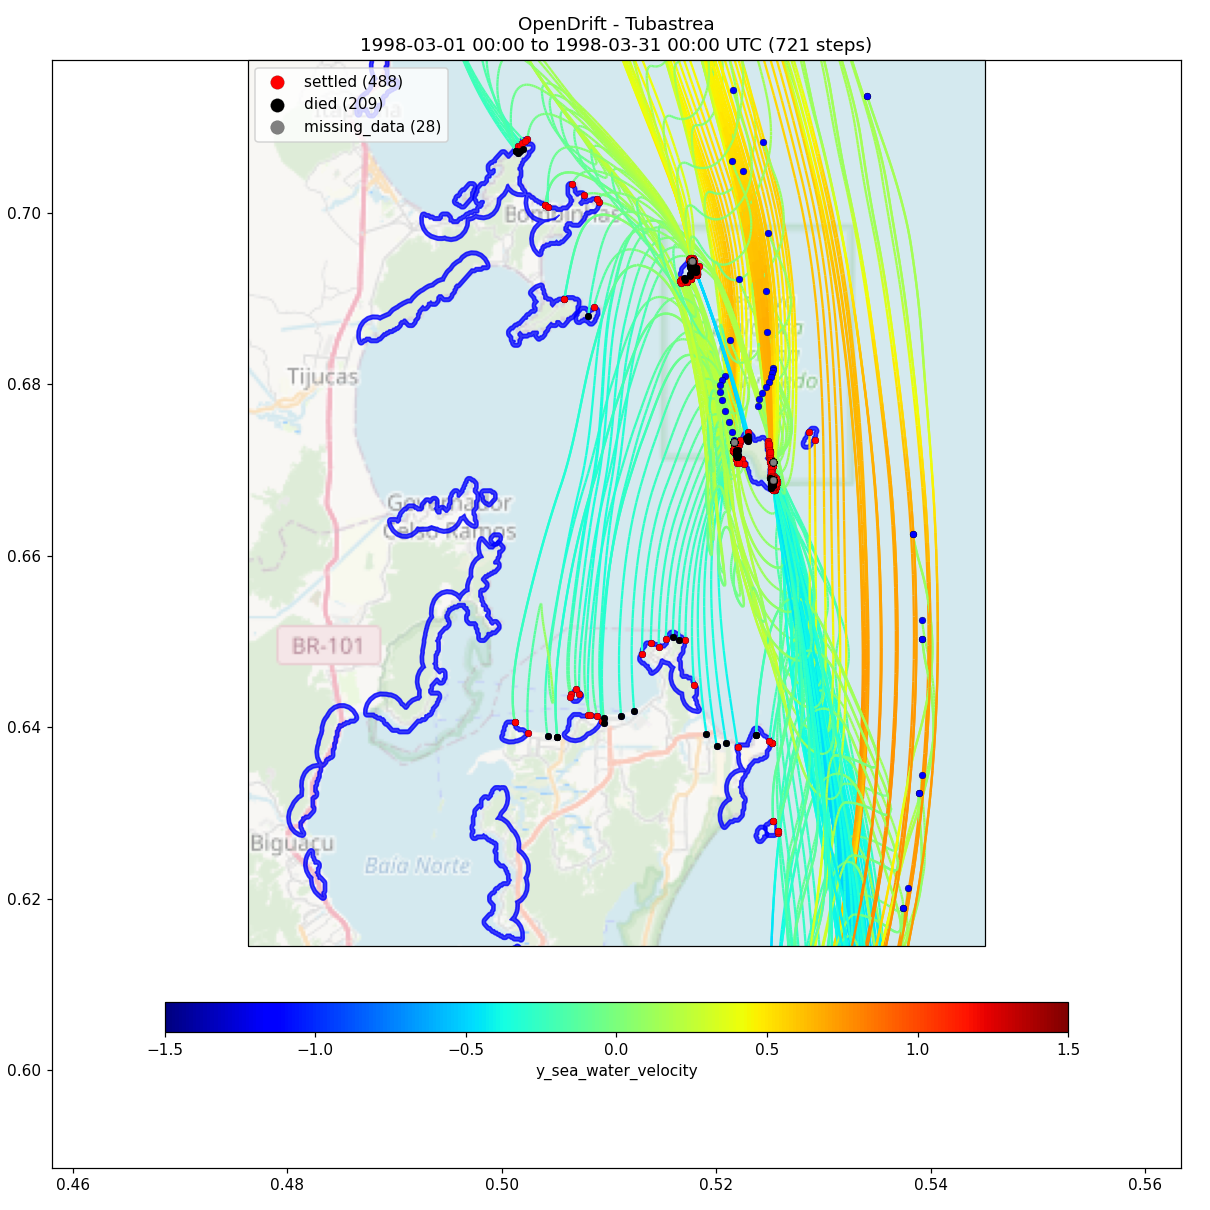

In [45]:
o.plot_costoes(corners=domain, linecolor='y_sea_water_velocity', lvmin=-1.5, lvmax=1.5)

<IPython.core.display.Javascript object>


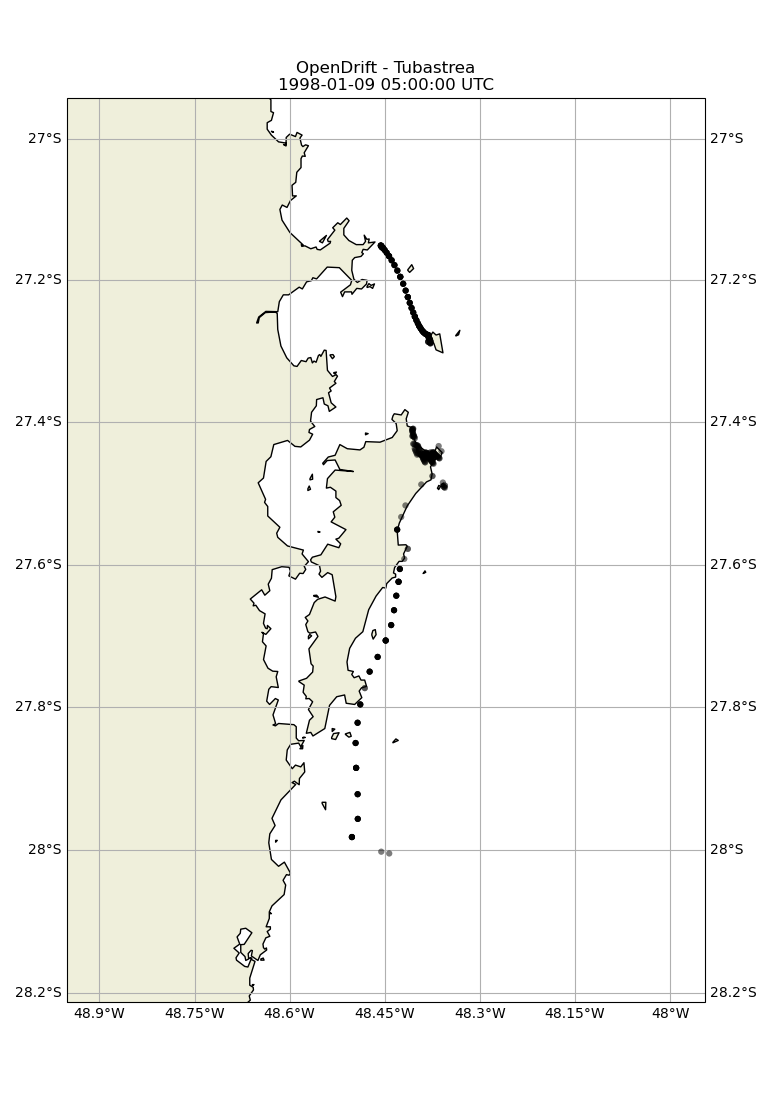

17:55:44 INFO    opendrift.models.basemodel: Saving animation to teste.gif...
17:55:44 INFO    opendrift.models.basemodel: Making animated gif...
MovieWriter stderr:
convert-im6.q16: no images defined `teste.gif' @ error/convert.c/ConvertImageCommand/3258.

17:57:12 INFO    opendrift.models.basemodel: Could not save animation:
17:57:12 INFO    opendrift.models.basemodel: Command '['convert', '-size', '772x1100', '-depth', '8', '-delay', '12.5', '-loop', '0', 'rgba:-', 'teste.gif']' returned non-zero exit status 1.


In [12]:
domain = [-49, -48, -28, -27]
# o.plot(corners=domain, linecolor='y_sea_water_velocity', lvmin=-1.5, lvmax=1.5)
o.animation(filename='teste.gif', linecolor='temp')

In [17]:
from matplotlib.colors import ListedColormap
import cartopy.feature as cfeature
#cmap = ListedColormap(('blue', 'red'))
cmap = ListedColormap((cfeature.COLORS['water'],
                       cfeature.COLORS['land']))

o1 = CoralSol(loglevel=20)
o1.add_reader([data])
o1.seed_elements(lon=seed_rn[0], lat=seed_rn[1], number=100, radius=10, time=[start, start+timedelta(hours=4)])
o1.set_config('general:use_auto_landmask', True)
o1.run(end_time=data.start_time+timedelta(hours=24), time_step=1800, time_step_output=2*3600)

# o2 = CoralSol(loglevel=20)
# o2.add_reader([data, reader_costao])
# o2.seed_elements(lon=seed_rn[0], lat=seed_rn[1], number=100, radius=10, time=[start, start+timedelta(hours=4)])
# o2.set_config('general:use_auto_landmask', False)
# o2.run(duration=timedelta(hours=54))

22:34:31 INFO: OpenDriftSimulation initialised (version 1.4.2)
22:34:31 INFO: Adding a dynamical landmask with max. priority based on assumed maximum speed of 0.5 m/s. Adding a customised landmask may be faster...
22:34:36 INFO: Using existing reader for land_binary_mask
22:34:38 INFO: All points are in ocean
22:34:41 INFO: 1993-01-01 12:00:00 - step 1 of 298080 - 13 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 12:30:00 - step 2 of 298080 - 25 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 13:00:00 - step 3 of 298080 - 38 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 13:30:00 - step 4 of 298080 - 50 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 14:00:00 - step 5 of 298080 - 62 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 14:30:00 - step 6 of 298080 - 75 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 15:00:00 - step 7 of 298080 - 87 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 15:30:00 - step 8 of 29808

22:34:41 INFO: 1993-01-03 06:30:00 - step 86 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 07:00:00 - step 87 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 07:30:00 - step 88 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 08:00:00 - step 89 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 08:30:00 - step 90 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 09:00:00 - step 91 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 09:30:00 - step 92 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 10:00:00 - step 93 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 10:30:00 - step 94 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 11:00:00 - step 95 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 11:30:00 - step 96 of 298080 - 100 active el

22:34:42 INFO: 1993-01-05 02:30:00 - step 174 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 03:00:00 - step 175 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 03:30:00 - step 176 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 04:00:00 - step 177 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 04:30:00 - step 178 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 05:00:00 - step 179 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 05:30:00 - step 180 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 06:00:00 - step 181 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 06:30:00 - step 182 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 07:00:00 - step 183 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 07:30:00 - step 184 of 298080 - 10

22:34:42 INFO: 1993-01-06 22:30:00 - step 262 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-06 23:00:00 - step 263 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-06 23:30:00 - step 264 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 00:00:00 - step 265 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 00:30:00 - step 266 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 01:00:00 - step 267 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 01:30:00 - step 268 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 02:00:00 - step 269 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 02:30:00 - step 270 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 03:00:00 - step 271 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 03:30:00 - step 272 of 298080 - 10

22:34:42 INFO: 1993-01-08 18:30:00 - step 350 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 19:00:00 - step 351 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 19:30:00 - step 352 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 20:00:00 - step 353 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 20:30:00 - step 354 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 21:00:00 - step 355 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 21:30:00 - step 356 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 22:00:00 - step 357 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 22:30:00 - step 358 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 23:00:00 - step 359 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 23:30:00 - step 360 of 298080 - 10

22:34:43 INFO: 1993-01-10 14:30:00 - step 438 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 15:00:00 - step 439 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 15:30:00 - step 440 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 16:00:00 - step 441 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 16:30:00 - step 442 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 17:00:00 - step 443 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 17:30:00 - step 444 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 18:00:00 - step 445 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 18:30:00 - step 446 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 19:00:00 - step 447 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 19:30:00 - step 448 of 298080 - 10

22:34:43 INFO: 1993-01-12 10:30:00 - step 526 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 11:00:00 - step 527 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 11:30:00 - step 528 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 12:00:00 - step 529 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 12:30:00 - step 530 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 13:00:00 - step 531 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 13:30:00 - step 532 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 14:00:00 - step 533 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 14:30:00 - step 534 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 15:00:00 - step 535 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 15:30:00 - step 536 of 298080 - 10

22:34:43 INFO: 1993-01-14 06:30:00 - step 614 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 07:00:00 - step 615 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 07:30:00 - step 616 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 08:00:00 - step 617 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 08:30:00 - step 618 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 09:00:00 - step 619 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 09:30:00 - step 620 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 10:00:00 - step 621 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 10:30:00 - step 622 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 11:00:00 - step 623 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 11:30:00 - step 624 of 298080 - 10

22:34:44 INFO: 1993-01-16 02:30:00 - step 702 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 03:00:00 - step 703 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 03:30:00 - step 704 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 04:00:00 - step 705 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 04:30:00 - step 706 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 05:00:00 - step 707 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 05:30:00 - step 708 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 06:00:00 - step 709 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 06:30:00 - step 710 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 07:00:00 - step 711 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 07:30:00 - step 712 of 298080 - 10

22:34:44 INFO: 1993-01-17 22:30:00 - step 790 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-17 23:00:00 - step 791 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-17 23:30:00 - step 792 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 00:00:00 - step 793 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 00:30:00 - step 794 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 01:00:00 - step 795 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 01:30:00 - step 796 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 02:00:00 - step 797 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 02:30:00 - step 798 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 03:00:00 - step 799 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 03:30:00 - step 800 of 298080 - 10

22:34:44 INFO: 1993-01-19 18:30:00 - step 878 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 19:00:00 - step 879 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 19:30:00 - step 880 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 20:00:00 - step 881 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 20:30:00 - step 882 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 21:00:00 - step 883 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 21:30:00 - step 884 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 22:00:00 - step 885 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 22:30:00 - step 886 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 23:00:00 - step 887 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 23:30:00 - step 888 of 298080 - 10

22:34:45 INFO: 1993-01-21 14:30:00 - step 966 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 15:00:00 - step 967 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 15:30:00 - step 968 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 16:00:00 - step 969 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 16:30:00 - step 970 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 17:00:00 - step 971 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 17:30:00 - step 972 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 18:00:00 - step 973 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 18:30:00 - step 974 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 19:00:00 - step 975 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 19:30:00 - step 976 of 298080 - 10

22:34:45 INFO: 1993-01-23 10:00:00 - step 1053 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 10:30:00 - step 1054 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 11:00:00 - step 1055 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 11:30:00 - step 1056 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 12:00:00 - step 1057 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 12:30:00 - step 1058 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 13:00:00 - step 1059 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 13:30:00 - step 1060 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 14:00:00 - step 1061 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 14:30:00 - step 1062 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 15:00:00 - step 1063 of 

22:34:45 INFO: 1993-01-25 05:30:00 - step 1140 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 06:00:00 - step 1141 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 06:30:00 - step 1142 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 07:00:00 - step 1143 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 07:30:00 - step 1144 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 08:00:00 - step 1145 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 08:30:00 - step 1146 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 09:00:00 - step 1147 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 09:30:00 - step 1148 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 10:00:00 - step 1149 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 10:30:00 - step 1150 of 

22:34:46 INFO: 1993-01-27 01:00:00 - step 1227 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 01:30:00 - step 1228 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 02:00:00 - step 1229 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 02:30:00 - step 1230 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 03:00:00 - step 1231 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 03:30:00 - step 1232 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 04:00:00 - step 1233 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 04:30:00 - step 1234 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 05:00:00 - step 1235 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 05:30:00 - step 1236 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 06:00:00 - step 1237 of 

22:34:46 INFO: 1993-01-28 20:30:00 - step 1314 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-28 21:00:00 - step 1315 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-28 21:30:00 - step 1316 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-28 22:00:00 - step 1317 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-28 22:30:00 - step 1318 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-28 23:00:00 - step 1319 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-28 23:30:00 - step 1320 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-29 00:00:00 - step 1321 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-29 00:30:00 - step 1322 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-29 01:00:00 - step 1323 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-29 01:30:00 - step 1324 of 

22:34:47 INFO: 1993-01-30 16:00:00 - step 1401 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 16:30:00 - step 1402 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 17:00:00 - step 1403 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 17:30:00 - step 1404 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 18:00:00 - step 1405 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 18:30:00 - step 1406 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 19:00:00 - step 1407 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 19:30:00 - step 1408 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 20:00:00 - step 1409 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 20:30:00 - step 1410 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 21:00:00 - step 1411 of 

22:34:47 INFO: 1993-02-01 11:30:00 - step 1488 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 12:00:00 - step 1489 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 12:30:00 - step 1490 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 13:00:00 - step 1491 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 13:30:00 - step 1492 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 14:00:00 - step 1493 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 14:30:00 - step 1494 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 15:00:00 - step 1495 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 15:30:00 - step 1496 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 16:00:00 - step 1497 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 16:30:00 - step 1498 of 

22:34:47 INFO: 1993-02-03 07:00:00 - step 1575 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 07:30:00 - step 1576 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 08:00:00 - step 1577 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 08:30:00 - step 1578 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 09:00:00 - step 1579 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 09:30:00 - step 1580 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 10:00:00 - step 1581 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 10:30:00 - step 1582 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 11:00:00 - step 1583 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 11:30:00 - step 1584 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 12:00:00 - step 1585 of 

22:34:48 INFO: 1993-02-05 02:30:00 - step 1662 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 03:00:00 - step 1663 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 03:30:00 - step 1664 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 04:00:00 - step 1665 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 04:30:00 - step 1666 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 05:00:00 - step 1667 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 05:30:00 - step 1668 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 06:00:00 - step 1669 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 06:30:00 - step 1670 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 07:00:00 - step 1671 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 07:30:00 - step 1672 of 

22:34:48 INFO: 1993-02-06 22:00:00 - step 1749 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-06 22:30:00 - step 1750 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-06 23:00:00 - step 1751 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-06 23:30:00 - step 1752 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 00:00:00 - step 1753 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 00:30:00 - step 1754 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 01:00:00 - step 1755 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 01:30:00 - step 1756 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 02:00:00 - step 1757 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 02:30:00 - step 1758 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 03:00:00 - step 1759 of 

22:34:48 INFO: 1993-02-08 17:30:00 - step 1836 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 18:00:00 - step 1837 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 18:30:00 - step 1838 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 19:00:00 - step 1839 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 19:30:00 - step 1840 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 20:00:00 - step 1841 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 20:30:00 - step 1842 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 21:00:00 - step 1843 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 21:30:00 - step 1844 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 22:00:00 - step 1845 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 22:30:00 - step 1846 of 

22:34:49 INFO: 1993-02-10 13:00:00 - step 1923 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 13:30:00 - step 1924 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 14:00:00 - step 1925 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 14:30:00 - step 1926 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 15:00:00 - step 1927 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 15:30:00 - step 1928 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 16:00:00 - step 1929 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 16:30:00 - step 1930 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 17:00:00 - step 1931 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 17:30:00 - step 1932 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 18:00:00 - step 1933 of 

22:34:49 INFO: 1993-02-12 08:30:00 - step 2010 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 09:00:00 - step 2011 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 09:30:00 - step 2012 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 10:00:00 - step 2013 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 10:30:00 - step 2014 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 11:00:00 - step 2015 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 11:30:00 - step 2016 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 12:00:00 - step 2017 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 12:30:00 - step 2018 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 13:00:00 - step 2019 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 13:30:00 - step 2020 of 

22:34:49 INFO: 1993-02-14 04:00:00 - step 2097 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 04:30:00 - step 2098 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 05:00:00 - step 2099 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 05:30:00 - step 2100 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 06:00:00 - step 2101 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 06:30:00 - step 2102 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 07:00:00 - step 2103 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 07:30:00 - step 2104 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 08:00:00 - step 2105 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 08:30:00 - step 2106 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 09:00:00 - step 2107 of 

22:34:50 INFO: 1993-02-15 23:30:00 - step 2184 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 00:00:00 - step 2185 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 00:30:00 - step 2186 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 01:00:00 - step 2187 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 01:30:00 - step 2188 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 02:00:00 - step 2189 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 02:30:00 - step 2190 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 03:00:00 - step 2191 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 03:30:00 - step 2192 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 04:00:00 - step 2193 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 04:30:00 - step 2194 of 

22:34:50 INFO: 1993-02-17 19:00:00 - step 2271 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 19:30:00 - step 2272 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 20:00:00 - step 2273 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 20:30:00 - step 2274 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 21:00:00 - step 2275 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 21:30:00 - step 2276 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 22:00:00 - step 2277 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 22:30:00 - step 2278 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 23:00:00 - step 2279 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 23:30:00 - step 2280 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-18 00:00:00 - step 2281 of 

22:34:50 INFO: 1993-02-19 14:30:00 - step 2358 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 15:00:00 - step 2359 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 15:30:00 - step 2360 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 16:00:00 - step 2361 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 16:30:00 - step 2362 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 17:00:00 - step 2363 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 17:30:00 - step 2364 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 18:00:00 - step 2365 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 18:30:00 - step 2366 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 19:00:00 - step 2367 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 19:30:00 - step 2368 of 

22:34:51 INFO: 1993-02-21 10:00:00 - step 2445 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 10:30:00 - step 2446 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 11:00:00 - step 2447 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 11:30:00 - step 2448 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 12:00:00 - step 2449 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 12:30:00 - step 2450 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 13:00:00 - step 2451 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 13:30:00 - step 2452 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 14:00:00 - step 2453 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 14:30:00 - step 2454 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 15:00:00 - step 2455 of 

22:34:51 INFO: 1993-02-23 05:30:00 - step 2532 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 06:00:00 - step 2533 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 06:30:00 - step 2534 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 07:00:00 - step 2535 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 07:30:00 - step 2536 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 08:00:00 - step 2537 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 08:30:00 - step 2538 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 09:00:00 - step 2539 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 09:30:00 - step 2540 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 10:00:00 - step 2541 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 10:30:00 - step 2542 of 

22:34:51 INFO: 1993-02-25 01:00:00 - step 2619 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 01:30:00 - step 2620 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 02:00:00 - step 2621 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 02:30:00 - step 2622 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 03:00:00 - step 2623 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 03:30:00 - step 2624 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 04:00:00 - step 2625 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 04:30:00 - step 2626 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 05:00:00 - step 2627 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 05:30:00 - step 2628 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 06:00:00 - step 2629 of 

22:34:52 INFO: 1993-02-26 20:30:00 - step 2706 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-26 21:00:00 - step 2707 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-26 21:30:00 - step 2708 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-26 22:00:00 - step 2709 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-26 22:30:00 - step 2710 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-26 23:00:00 - step 2711 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-26 23:30:00 - step 2712 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-27 00:00:00 - step 2713 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-27 00:30:00 - step 2714 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-27 01:00:00 - step 2715 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-27 01:30:00 - step 2716 of 

22:34:52 INFO: 1993-02-28 16:00:00 - step 2793 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 16:30:00 - step 2794 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 17:00:00 - step 2795 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 17:30:00 - step 2796 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 18:00:00 - step 2797 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 18:30:00 - step 2798 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 19:00:00 - step 2799 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 19:30:00 - step 2800 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 20:00:00 - step 2801 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 20:30:00 - step 2802 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 21:00:00 - step 2803 of 

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


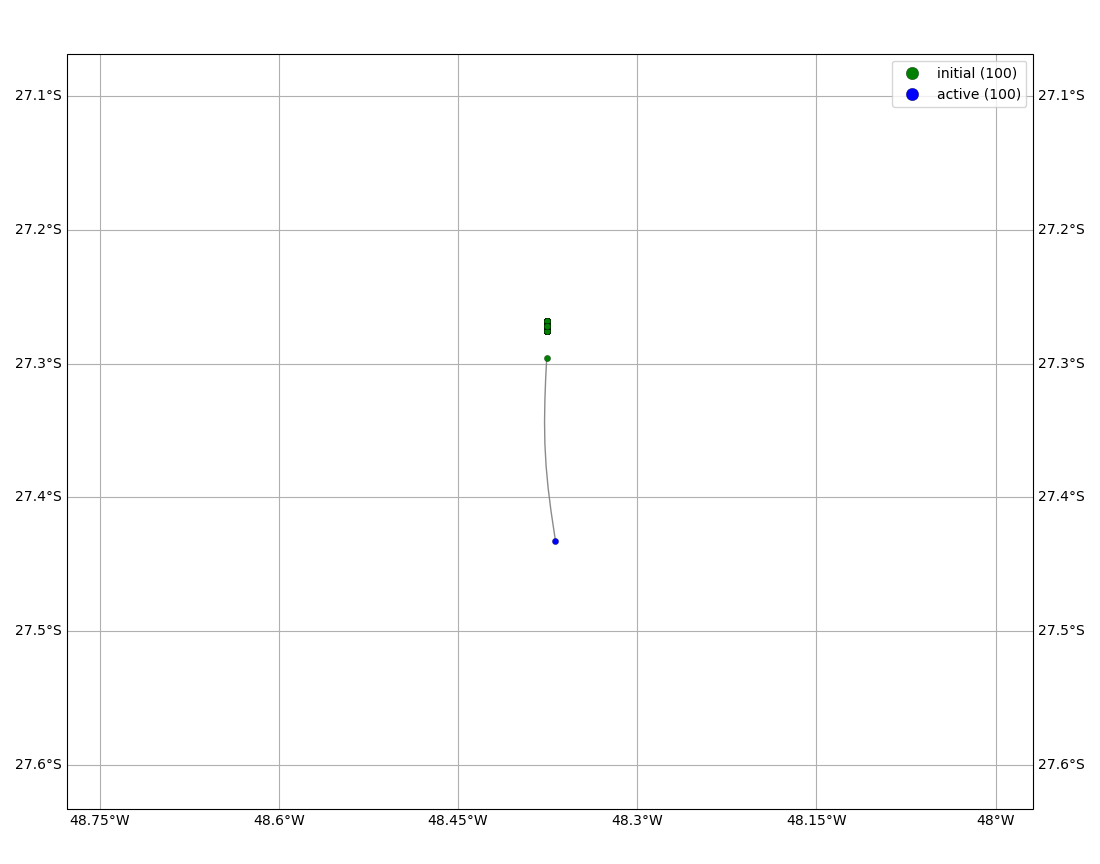

KeyError: 'x'

In [63]:
o1.plot(background='land_binary_mask', hide_landmask=True, cmap=cmap)

<IPython.core.display.Javascript object>


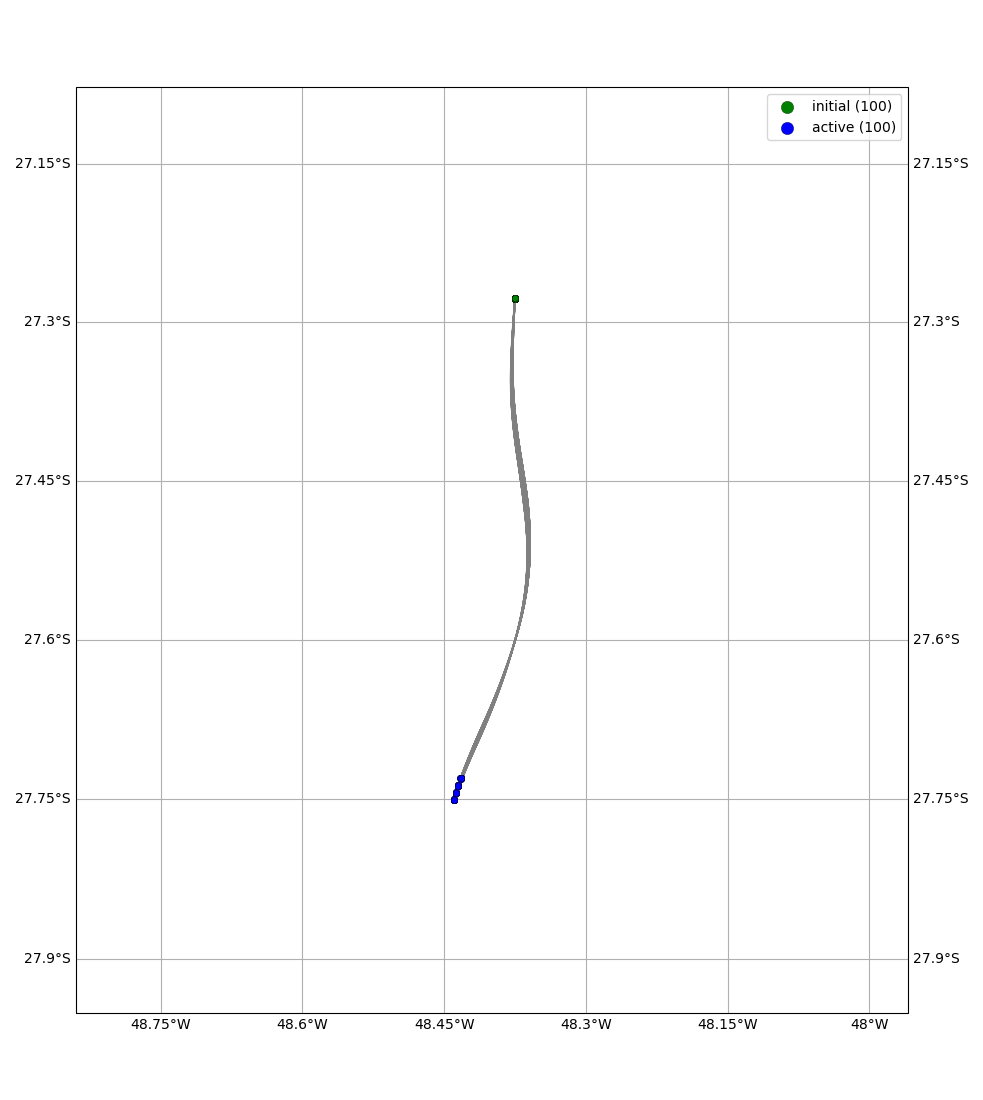

TypeError: '>=' not supported between instances of 'datetime.datetime' and 'NoneType'

In [47]:
o2.plot(background=['land_binary_mask'], hide_landmask=True, cmap=cmap)

In [11]:
jibe_rate = -np.log(1-0.04)/3600
jibe_rate

1.1339442922293102e-05

In [73]:
dir(o.readers['shape'])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__on_land__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_variables',
 'always_valid',
 'buffer',
 'calculate_derived_environment_variables',
 'check_arguments',
 'clip_boundary_pixels',
 'coverage_string',
 'covers_positions',
 'covers_time',
 'crs',
 'derived_variables',
 'domain_grid',
 'end_time',
 'environment_mappers',
 'environment_mappings',
 'from_shpfiles',
 'get_timeseries_at_position',
 'get_variables',
 'get_variables_derived',
 'get_variables_interpolated',
 'global_coverage',
 'index_of_closest_z',
 'indices_min_max_z',
 'interpolation',
 'invert',
 'is_lazy',
 'land',
 'logger',
 'lonlat2xy',
 'name',
 'nearest_time',
 'per

In [21]:
o.get_reader_groups()

([['land_binary_mask'],
  ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']],
 [['global_landmask'],
  ["['/data/global-reanalysis-phy-001-030-daily/03_1km_regrid_joined/grid_1998.nc']"]],
 [])